<a href="https://colab.research.google.com/github/henryonomakpo/The-Impact-of-ESG-Ratings-on-EV-Manufacturing-Industry/blob/main/MDPI_Civi_Construction_ESG_Panel_Regression%2C_Cross_Section_and_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install statsmodels
!pip install linearmodels
!pip install scikit-learn
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install pyeconometrics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 2.9 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement pyeconometrics (from versions: none)
ERROR: No matching distribution found for pyeconometrics


#### Prepare World Bank Value Added Data:

#### Melts the data from wide (years as columns) to long format (one row per country-year).


#### MICE Imputation:
#### Uses sklearn.impute.IterativeImputer to perform Multivariate Imputation by Chained Equations.
#### It imputes missing values (NaN) for the selected columns (Construction_Value_Added_USD and your chosen ESG indicators).

#### VIF Calculation:
#### Calculates Variance Inflation Factor to check for multicollinearity among independent variables.
#### VIF for panel data is complex. This code does a simplified check on the imputed dataset (ignoring the panel structure for VIF calculation itself, but giving an idea). High VIF (e.g., >5 or >10) suggests problematic multicollinearity.
#### Panel Regression:
#### Sets Country and Year as a MultiIndex.
#### Performs Fixed Effects (FE) regression using PanelOLS. entity_effects=True controls for country-specific unobserved heterogeneity, and time_effects=True controls for common time trends.
#### Performs Random Effects (RE) regression using RandomEffects.
#### Hausman Test: The code provides a conceptual explanation. linearmodels doesn't have a one-liner Hausman test like statsmodels for OLS. A formal Hausman test compares FE and RE coefficients to decide which model is more appropriate. If the p-value of a Hausman test is significant (typically <0.05), it suggests that the unobserved individual effects are correlated with the regressors, and Fixed Effects is preferred. If not significant, Random Effects might be more efficient. You'd generally report both and discuss the Hausman test outcome.

In [ ]:
!pip uninstall linearmodels -y
!pip install --no-cache-dir linearmodels



Found existing installation: linearmodels 6.1
Uninstalling linearmodels-6.1:
  Successfully uninstalled linearmodels-6.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 26.8 MB/s eta 0:00:00


#### Verify linearmodels version

### Verify linearmodels

In [ ]:
import linearmodels
print(f"Linearmodels version from Python: {linearmodels.__version__}")

Linearmodels version from Python: 6.1


Libraries loaded section complete.
Trying import from linearmodels.panel.stationary (older versions)...
ERROR: Could not import critical panel unit root tests. linearmodels version: 6.1.
  - Import from .panel.meta.unitroot failed: No module named 'linearmodels.panel.meta'
  - Import all from .panel.unitroot failed: No module named 'linearmodels.panel.unitroot'
  - Individual imports from .panel.unitroot also failed.
  - Import from .panel.stationary also failed for some tests.
Panel unit root tests will be skipped.
Linearmodels version: 6.1
--- Starting Data Loading & Initial Preprocessing ---
ESG data loaded and countries cleaned.
World Bank Construction Value Added data loaded and countries cleaned.
CalcForge Housing Cost data loaded and countries cleaned.

--- Starting Part 1: Panel Regression Analysis ---

3.1 Preparing World Bank Data (Panel DV)...
Prepared WB Data. Shape: (3413, 4), DV: log_construction_value_added

3.2 Preparing ESG Data (Panel IVs)...
Initial Panel ESG feature

/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MICE imputation complete for panel IVs.
Panel data for regression shape after MICE and all NaN drop: (634, 36)

--- 3.5.1 Panel Unit Root Tests (using imputed data before VIF) ---
Skipping Panel Unit Root Tests as required libraries/modules were not available or correctly imported.

3.6 Iterative VIF check for panel IVs (incl. LDV & lags)...
  Iterative VIF (Panel) 1: Removing 'Literacy Rate (Adult %)' (VIF: 17680.70)
  Iterative VIF (Panel) 2: Removing 'R&D Exp. (L1, % GDP)' (VIF: 41.31)
  Iterative VIF (Panel) 3: Removing 'Control of Corruption' (VIF: 29.63)
  Iterative VIF (Panel) 4: Removing 'Rule of Law (L1)' (VIF: 28.59)
  Iterative VIF (Panel) 5: Removing 'Voice & Acc. (L1)' (VIF: 27.27)
  Iterative VIF (Panel) 6: Removing 'Income Share Low 20% (L1)' (VIF: 16.48)
  Iterative VIF (Panel) 7: Removing 'Poli. Stability (L1)' (VIF: 13.85)
  Iterative VIF (Panel) 8: Removing 'Rule of Law' (VIF: 12.22)
  Iterative VIF (Panel) 9: Removing 'Energy Use (L1, kg oil pc)' (VIF: 10.37)
  Iter

<ipython-input-3-bf6f53c1d1f9>:138: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  results_df = results_df[~is_dummy]
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 65, but rank is 20
  warnings.warn('covariance of constraints does not have full '
<ipython-input-3-bf6f53c1d1f9>:138: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  results_df = results_df[~is_dummy]



Fitting Two-Way FE (LSDV statsmodels)...
  Note: Two-Way FE (LSDV) using HC3 robust SEs (not full two-way clustering).

--- All Standard Panel Model Summaries (Formatted Tables) ---

--- Pooled OLS (linearmodels) Summary ---
+------------------------------------+-------------+------------------------+----------------------+
|              Variable              | Coefficient |       Std. Error       |       P-value        |
+------------------------------------+-------------+------------------------+----------------------+
|              Constant              | 20.4424***  |   2.396334309521891    |         0.0          |
|        R&D Expend. (% GDP)         |   0.4747    |  0.30751811175269117   | 0.12318807429383871  |
|      Internet Users (% Pop.)       |   -0.0006   |  0.002478914547399635  |  0.8215567192316713  |
|        Gov. Edu. Exp. (L1)         |   0.0161    |  0.01674387991138085   |  0.3365329849759462  |
|         Literacy Rate (L1)         |   -0.0023   |  0.00746385119

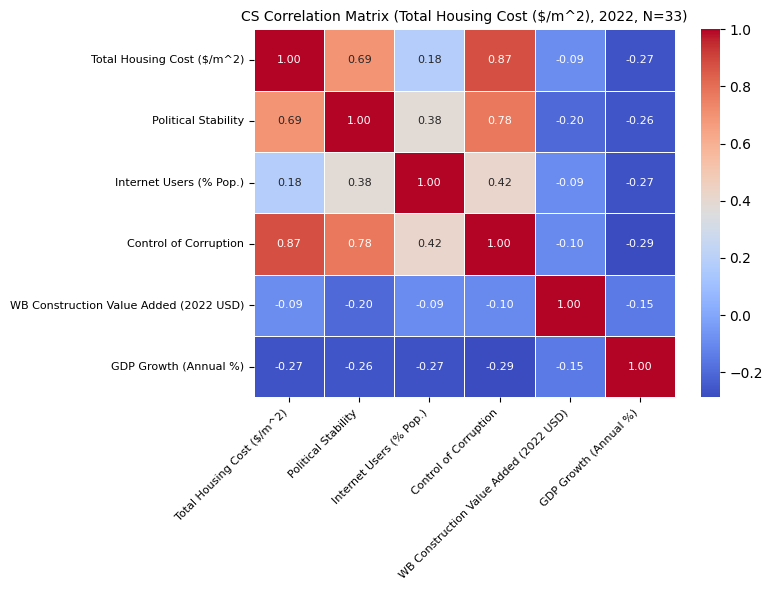


--- Starting Part 3: Machine Learning Models (Panel Data, DV: Log(Construction Value Added USD)) ---

--- Random Forest Regressor (Panel Data) ---
RF Best Params: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}, Best CV R2: 0.9940
RF Test R2: 0.9962, Test MSE: 0.0108

--- XGBoost Regressor (Panel Data) ---
XGB Best Params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.7}, Best CV R2: 0.9943
XGB Test R2: 0.9967, Test MSE: 0.0093

--- ML Model Performance Summary (Panel Data) ---
+-----------------------+------------+----------+---------+-----------------------------------------------------------------------------------------+
|         Model         | Best CV R2 | Test MSE | Test R2 |                                       Best Params                                       |
+-----------------------+------------+----------+---------+----------------------------------------------------------------------------------------

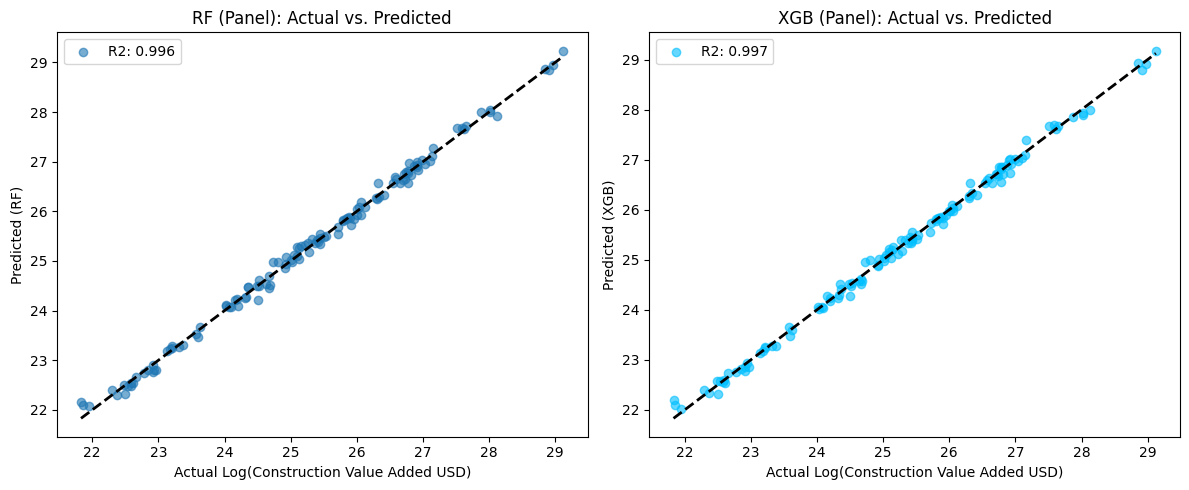


--- ML Feature Importances (Panel Data) ---
+-------------------------------------+------------------------+-----------------------+
|               Feature               |     Random Forest      |        XGBoost        |
+-------------------------------------+------------------------+-----------------------+
| Lagged Log(Constr. Value Added USD) |    0.99269870289477    |  0.9672139883041382   |
|        GDP Growth (Annual %)        |  0.000901623454697814  | 0.0026345180813223124 |
|        Renew. Energy (L1, %)        | 0.0006108463224565402  | 0.003625059500336647  |
|         Political Stability         | 0.0005942599040000938  | 0.0011156362015753984 |
|     Internet Users (L1, % Pop.)     | 0.0005413034786949517  | 0.0026252353563904762 |
|         Gov. Edu. Exp. (L1)         | 0.00048592650778901653 | 0.000928894616663456  |
|     Renewable Energy Cons. (%)      | 0.0004679280972662273  | 0.002285230904817581  |
|      Income Share (Lowest 20%)      | 0.0004374713413127083  | 

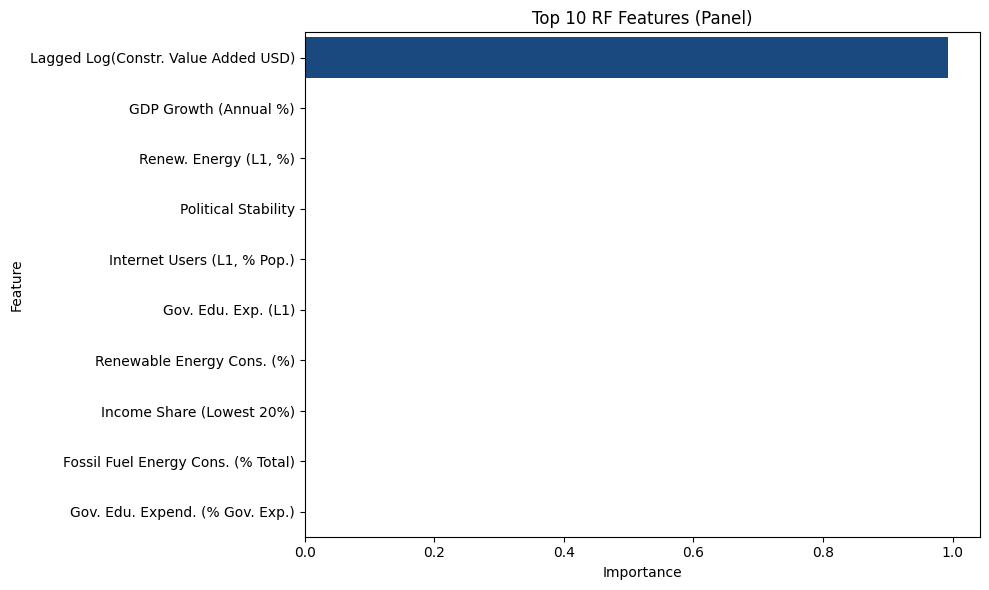

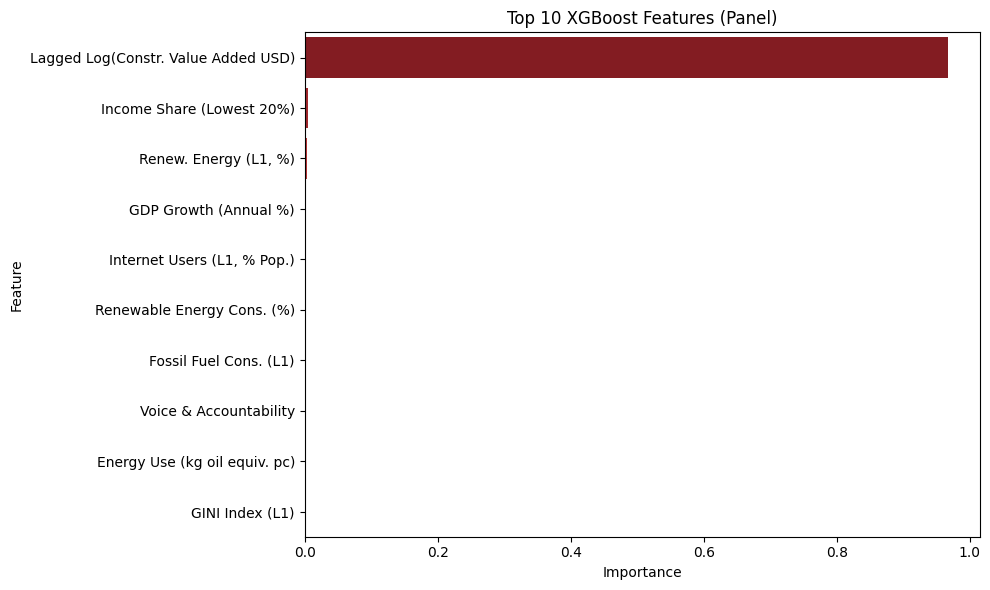


--- Analysis Script Complete ---

RECOMMENDATIONS FOR PUBLICATION / FURTHER ANALYSIS:
1.  `linearmodels` Installation: The primary issue remains with `linearmodels`. Strongly recommend `!pip uninstall linearmodels -y && pip install -U linearmodels` and a **RUNTIME RESTART**. This is crucial for URTs and reliable panel models from this library.
2.  LSDV as FE: The script now uses `statsmodels.OLS` with dummy variables (LSDV) for Fixed Effects. This is a valid alternative if `linearmodels.PanelOLS` consistently fails. Note that RE models and Hausman tests are skipped in this adaptation.
3.  `pyeconometrics`: If GMM is desired, ensure installation: `!pip install pyeconometrics`.
4.  Interpreting LSDV: The `create_results_table` now suppresses dummy coefficients by default for LSDV models for readability. You can change `suppress_dummies=False` to see them.
5.  Unit Root Tests: If `linearmodels` URTs are still unavailable after fixing installation, manual ADF per panel unit can be a fallb

In [ ]:
# -*- coding: utf-8 -*-
"""
ESG Construction Cost Analysis - Final Output Focused (Corrected Panel Fit & Tables & Enhanced URT)
"""

# -------------------------------------
# 0. Install Libraries if in Colab
# -------------------------------------
# !pip uninstall linearmodels -y # Uncomment to force uninstall
# !pip install -U linearmodels # TRY THIS TO FIX LINEARMODELS INSTALLATION
# !pip install pyeconometrics
# !pip install xgboost


# -------------------------------------
# 1. Load Libraries
# -------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from linearmodels.panel import PanelOLS, RandomEffects, PooledOLS # Keep for PooledOLS if it works
from linearmodels.panel.results import PanelEffectsResults, RandomEffectsResults
from statsmodels.regression.linear_model import RegressionResultsWrapper
import scipy.stats as stats
from tabulate import tabulate
from collections import OrderedDict

print("Libraries loaded section complete.")

# Panel Unit Root Test Imports - MODIFIED/ENHANCED
LevinLinChu, ImPesaranShin, Hadri, ADF, PhillipsPerron = None, None, None, None, None
PANEL_URT_AVAILABLE = False
PANEL_URT_PARTIALLY_AVAILABLE = False

urt_error_messages = []

try:
    from linearmodels.panel.meta.unitroot import LevinLinChu, ImPesaranShin, Hadri, ADF, PhillipsPerron
    print("Successfully imported all panel unit root tests (LLC, IPS, Hadri, ADF, PP) from linearmodels.panel.meta.unitroot.")
    PANEL_URT_AVAILABLE = True; PANEL_URT_PARTIALLY_AVAILABLE = True
except (ModuleNotFoundError, ImportError) as e_meta:
    urt_error_messages.append(f"Import from .panel.meta.unitroot failed: {e_meta}")
    print(f"Warning: Could not import URTs from linearmodels.panel.meta.unitroot ({e_meta}). Trying other paths...")
    if not PANEL_URT_PARTIALLY_AVAILABLE:
        try:
            from linearmodels.panel.unitroot import LevinLinChu, ImPesaranShin, Hadri, ADF, PhillipsPerron
            print("Successfully imported all panel unit root tests from linearmodels.panel.unitroot.")
            PANEL_URT_AVAILABLE = True; PANEL_URT_PARTIALLY_AVAILABLE = True
        except (ModuleNotFoundError, ImportError) as e_unitroot_all:
            urt_error_messages.append(f"Import all from .panel.unitroot failed: {e_unitroot_all}")
            _imported_some_from_unitroot = False
            try: from linearmodels.panel.unitroot import LevinLinChu; _imported_some_from_unitroot = True; PANEL_URT_PARTIALLY_AVAILABLE = True; print("  LLC imported from .panel.unitroot")
            except ImportError: pass
            # ... (add other individual imports similarly if needed) ...
            if not _imported_some_from_unitroot: urt_error_messages.append(f"Individual imports from .panel.unitroot also failed.")
    if not PANEL_URT_PARTIALLY_AVAILABLE:
        print("Trying import from linearmodels.panel.stationary (older versions)...")
        _imported_some_from_stationary = False
        try: from linearmodels.panel.stationary import LevinLinChu; _imported_some_from_stationary = True; PANEL_URT_PARTIALLY_AVAILABLE = True; print("  LLC imported from .panel.stationary")
        except ImportError: pass
        # ... (add other individual imports similarly if needed) ...
        if not _imported_some_from_stationary: urt_error_messages.append(f"Import from .panel.stationary also failed for some tests.")

if not PANEL_URT_PARTIALLY_AVAILABLE:
    import linearmodels
    print(f"ERROR: Could not import critical panel unit root tests. linearmodels version: {linearmodels.__version__ if hasattr(linearmodels, '__version__') else 'unknown'}.")
    for msg in urt_error_messages: print(f"  - {msg}")
    print("Panel unit root tests will be skipped.")
elif not PANEL_URT_AVAILABLE: print("Warning: Not all panel unit root tests could be imported.")

DynamicPanelGMM = None
try:
    from pyeconometrics.panel.gmm import DynamicPanelGMM
    print("Successfully imported DynamicPanelGMM from pyeconometrics.")
except (ModuleNotFoundError, ImportError) as e_gmm:
    print(f"WARNING: pyeconometrics import failed: {e_gmm}. GMM models will be skipped.")

import linearmodels
print(f"Linearmodels version: {linearmodels.__version__}")

# --- Configuration Parameters & Helper Functions (keep as is) ---
VIF_THRESHOLD_FOR_REMOVAL = 5
SIGNIFICANCE_LEVEL = 0.05
MICE_MAX_ITER = 50
MICE_N_NEAREST_FEATURES = None
RANDOM_STATE = 42

try:
    import google.colab
    IN_COLAB = True
except ImportError:
    IN_COLAB = False

if IN_COLAB:
    esg_file = '/content/ESG_panel_processed_WorldBank.csv'
    wb_value_added_file = '/content/WorlBank_Construction_Value_Added.csv'
    calcforge_costs_file = '/content/CalcForge_Global_2022_housing_construction_average_costs_data.csv'
else:
    esg_file = 'ESG_panel_processed_WorldBank.csv'
    wb_value_added_file = 'WorlBank_Construction_Value_Added.csv'
    calcforge_costs_file = 'CalcForge_Global_2022_housing_construction_average_costs_data.csv'

def clean_country_name(name_input):
    if pd.isna(name_input): return None
    name_cleaned = str(name_input).strip().lower()
    name_map = {"united arab emirates": "uae", "united kingdom": "uk", "united states": "usa","korea, rep.": "south korea", "russian federation": "russia", "korea, dem. people's rep.": "north korea","egypt, arab rep.": "egypt", "iran, islamic rep.": "iran", "turkiye": "turkey","venezuela, rb": "venezuela", "syrian arab republic": "syria", "yemen, rep.": "yemen","congo, dem. rep.": "congo (dem. rep.)", "congo, rep.": "congo (rep.)", "lao pdr": "laos","slovak republic": "slovakia", "czechia":"czech republic", "st. kitts and nevis": "st kitts and nevis","st. lucia": "st lucia", "st. martin (french part)": "st martin (french part)","st. vincent and the grenadines": "st vincent and the grenadines", "viet nam": "vietnam","brunei darussalam": "brunei", "cabo verde": "cape verde", "cote d'ivoire": "ivory coast","eswatini": "eswatini", "micronesia, fed. sts.": "micronesia (fsm)","hong kong sar, china": "hong kong", "macao sar, china": "macau"}
    return name_map.get(name_cleaned, name_cleaned)

def create_results_table(model_results, model_name="Model", custom_var_names=None, suppress_dummies=True, dummy_prefixes=['entity_dummy_', 'time_dummy_']):
    if model_results is None: return f"Could not generate table for {model_name}: Model results are None."
    params = model_results.params
    p_values = model_results.pvalues

    if hasattr(model_results, 'std_errors'): std_errs = model_results.std_errors
    elif hasattr(model_results, 'bse'): std_errs = model_results.bse
    else: std_errs = pd.Series([np.nan] * len(params), index=params.index); print(f"Warning: Std errors not found for {model_name}")

    results_df = pd.DataFrame({'Variable': params.index, 'Coefficient': params.values,
                               'Std. Error': std_errs.values if std_errs is not None else np.nan,
                               'P-value': p_values.values if p_values is not None else np.nan})

    # Suppress dummy variables if requested
    if suppress_dummies:
        is_dummy = pd.Series(False, index=results_df['Variable'])
        for prefix in dummy_prefixes:
            is_dummy = is_dummy | results_df['Variable'].str.startswith(prefix)
        results_df = results_df[~is_dummy]

    stars = []
    if 'P-value' in results_df.columns and results_df['P-value'] is not None: # Check if P-value column exists and is not None
        for p_val in results_df['P-value']:
            if pd.isna(p_val): stars.append('')
            elif p_val < 0.01: stars.append('***')
            elif p_val < 0.05: stars.append('**')
            elif p_val < 0.1: stars.append('*')
            else: stars.append('')
    else: stars = [''] * len(results_df) # Fallback if P-values are missing

    results_df['Sig.'] = stars
    results_df['Coefficient_Formatted'] = results_df.apply(lambda r: f"{r['Coefficient']:.4f}{r['Sig.']}" if pd.notna(r['Coefficient']) else "N/A", axis=1)
    if custom_var_names: results_df['Variable'] = results_df['Variable'].map(custom_var_names).fillna(results_df['Variable'])

    display_cols = ['Variable', 'Coefficient_Formatted', 'Std. Error', 'P-value']
    # Ensure P-value column is float for formatting, if it exists
    if 'P-value' in results_df.columns:
        results_df['P-value'] = pd.to_numeric(results_df['P-value'], errors='coerce')

    results_df_display = results_df[display_cols].copy()
    results_df_display.rename(columns={'Coefficient_Formatted': 'Coefficient'}, inplace=True)

    summary_stats = OrderedDict()
    summary_stats["Model"] = model_name
    if hasattr(model_results, 'rsquared_overall'): summary_stats["R-sq (Overall)"] = f"{model_results.rsquared_overall:.4f}"
    if hasattr(model_results, 'rsquared_within'): summary_stats["R-sq (Within)"] = f"{model_results.rsquared_within:.4f}"
    if hasattr(model_results, 'rsquared_between'): summary_stats["R-sq (Between)"] = f"{model_results.rsquared_between:.4f}"
    if hasattr(model_results, 'rsquared') and not any(k in summary_stats for k in ["R-sq (Overall)", "R-sq (Within)"]): summary_stats["R-squared"] = f"{model_results.rsquared:.4f}"
    if hasattr(model_results, 'rsquared_adj') and isinstance(model_results, RegressionResultsWrapper): summary_stats["Adj. R-squared"] = f"{model_results.rsquared_adj:.4f}"
    if hasattr(model_results, 'nobs'): summary_stats["Observations"] = str(int(model_results.nobs))
    if isinstance(model_results, (PanelEffectsResults, RandomEffectsResults)): # This part will be less relevant for statsmodels LSDV
        if hasattr(model_results, 'entity_info') and model_results.entity_info: summary_stats["Entities"] = str(model_results.entity_info.total)
        if hasattr(model_results, 'time_info') and model_results.time_info: summary_stats["Time Periods"] = str(model_results.time_info.total)
    elif isinstance(model_results, RegressionResultsWrapper): # For statsmodels OLS (LSDV)
        # Try to infer N and T if LSDV was used, though it's not directly stored
        if 'df_model' in model_results.summary().tables[0].data[5]: # Heuristic to get number of regressors
             num_regressors = int(model_results.summary().tables[0].data[5][1])
             # This is tricky, depends on how dummies were named and counted

    f_stat_val, f_pval_val, f_type_display = None, None, "F-statistic (Overall/Robust)"
    f_stat_attr = getattr(model_results, 'f_statistic_robust', getattr(model_results, 'f_statistic', None))
    if f_stat_attr is None and isinstance(model_results, RandomEffectsResults): f_stat_attr = getattr(model_results, 'wald_test_joint', None); f_type_display = "Wald chi2(joint)"

    if hasattr(model_results, 'fvalue'): # For statsmodels OLS
        f_stat_val = model_results.fvalue
        f_pval_val = model_results.f_pvalue
        f_type_display="F-statistic (OLS)"
    elif f_stat_attr: # For linearmodels
        f_stat_val, f_pval_val = getattr(f_stat_attr, 'stat', None), getattr(f_stat_attr, 'pval', None)

    if f_stat_val is not None and f_pval_val is not None: summary_stats[f_type_display] = f"{f_stat_val:.4f} (p={f_pval_val:.4f})"
    if hasattr(model_results, 'condition_number'): summary_stats["Cond. No."] = f"{model_results.condition_number:.2e}"

    footer_list = [f"{k}: {v}" for k,v in summary_stats.items()]
    footer_text = "\n" + "\n".join(footer_list) + "\nSignificance: *** p<0.01, ** p<0.05, * p<0.1"
    if suppress_dummies and any(any(str(var).startswith(p) for p in dummy_prefixes) for var in params.index):
        footer_text += "\n(Dummy variable coefficients suppressed for brevity)"

    return tabulate(results_df_display, headers='keys', tablefmt='pretty', floatfmt=(".4f", ".4f", ".4f", ".4f"), showindex=False) + footer_text


VARIABLE_NAME_MAP = {
    'const': 'Constant', 'log_construction_value_added': 'Log(Construction Value Added USD)',
    'LDV_log_construction_value_added': 'Lagged Log(Constr. Value Added USD)',
    'Total_Housing_Cost_Per_M2': 'Total Housing Cost ($/m^2)',
    'control_corruption_estimate': 'Control of Corruption', 'economic_and_social_rights_performance_score': 'Econ. & Social Rights Score',
    'renewable_energy_consumption_total_final_energy_consumption': 'Renewable Energy Cons. (%)', 'rule_law_estimate': 'Rule of Law',
    'voice_and_accountability_estimate': 'Voice & Accountability', 'gdp_growth_annual': 'GDP Growth (Annual %)',
    'political_stability_and_absence_violence_terrorism_estimate': 'Political Stability',
    'government_expenditure_on_education_total_government_expenditure': 'Gov. Edu. Expend. (% Gov. Exp.)',
    'research_and_development_expenditure_gdp': 'R&D Expend. (% GDP)', 'individuals_using_the_internet_population': 'Internet Users (% Pop.)',
    'gini_index': 'GINI Index', 'literacy_rate_adult_total_people_ages_15_and_above': 'Literacy Rate (Adult %)',
    'fossil_fuel_energy_consumption_total': 'Fossil Fuel Energy Cons. (% Total)',
    'energy_use_kg_oil_equivalent_per_capita': 'Energy Use (kg oil equiv. pc)',
    'population_density_people_per_sq_km_land_area': 'Population Density (per sq. km)',
    'income_share_held_by_lowest_20': 'Income Share (Lowest 20%)',
    'control_corruption_estimate_lag1': 'Ctrl. Corruption (L1)', 'economic_and_social_rights_performance_score_lag1': 'Econ. & Soc. Rights (L1)',
    'renewable_energy_consumption_total_final_energy_consumption_lag1': 'Renew. Energy (L1, %)', 'rule_law_estimate_lag1': 'Rule of Law (L1)',
    'voice_and_accountability_estimate_lag1': 'Voice & Acc. (L1)', 'political_stability_and_absence_violence_terrorism_estimate_lag1': 'Poli. Stability (L1)',
    'government_expenditure_on_education_total_government_expenditure_lag1': 'Gov. Edu. Exp. (L1)',
    'research_and_development_expenditure_gdp_lag1': 'R&D Exp. (L1, % GDP)', 'individuals_using_the_internet_population_lag1': 'Internet Users (L1, % Pop.)',
    'gini_index_lag1': 'GINI Index (L1)', 'literacy_rate_adult_total_people_ages_15_and_above_lag1': 'Literacy Rate (L1)',
    'fossil_fuel_energy_consumption_total_lag1': 'Fossil Fuel Cons. (L1)', 'energy_use_kg_oil_equivalent_per_capita_lag1': 'Energy Use (L1, kg oil pc)',
    'population_density_people_per_sq_km_land_area_lag1': 'Pop. Density (L1)', 'income_share_held_by_lowest_20_lag1': 'Income Share Low 20% (L1)',
    'WB_ValueAdded_2022': 'WB Construction Value Added (2022 USD)'}

# -------------------------------------
# 2. Load Data
# -------------------------------------
print("--- Starting Data Loading & Initial Preprocessing ---")
try:
    df_esg_raw = pd.read_csv(esg_file, sep=',')
    if 'Country' in df_esg_raw.columns: df_esg_raw['country'] = df_esg_raw['Country'].apply(clean_country_name); df_esg_raw.drop(columns=['Country'], inplace=True, errors='ignore')
    elif 'country' in df_esg_raw.columns: df_esg_raw['country'] = df_esg_raw['country'].apply(clean_country_name)
    print("ESG data loaded and countries cleaned.")

    df_wb_value_raw = pd.read_csv(wb_value_added_file, sep=',')
    if 'Country' in df_wb_value_raw.columns: df_wb_value_raw['country'] = df_wb_value_raw['Country'].apply(clean_country_name); df_wb_value_raw.drop(columns=['Country'], inplace=True, errors='ignore')
    elif 'country' in df_wb_value_raw.columns: df_wb_value_raw['country'] = df_wb_value_raw['country'].apply(clean_country_name)
    print("World Bank Construction Value Added data loaded and countries cleaned.")

    df_calcforge_raw = pd.read_csv(calcforge_costs_file, sep=',', header=1)
    df_calcforge_raw.columns = [col.strip() for col in df_calcforge_raw.columns]
    if 'Country' in df_calcforge_raw.columns: df_calcforge_raw['country'] = df_calcforge_raw['Country'].apply(clean_country_name); df_calcforge_raw.drop(columns=['Country'], inplace=True, errors='ignore')
    elif 'country' in df_calcforge_raw.columns: df_calcforge_raw['country'] = df_calcforge_raw['country'].apply(clean_country_name)
    print("CalcForge Housing Cost data loaded and countries cleaned.")
except FileNotFoundError as e: exit(f"Error loading files: {e}. Please ensure files are in the correct path or Colab environment.")
except Exception as e: exit(f"An unexpected error occurred during data loading: {e}")

# -------------------------------------
# 3. Panel Regression Analysis
# -------------------------------------
print("\n--- Starting Part 1: Panel Regression Analysis ---")
# 3.1 Prepare World Bank Data
print("\n3.1 Preparing World Bank Data (Panel DV)...")
INDICATOR_NAME_CONSTRUCTION_VALUE = 'Industry (including construction), value added (current US$)'
df_wb_value_filtered = df_wb_value_raw[df_wb_value_raw['Indicator Name'] == INDICATOR_NAME_CONSTRUCTION_VALUE].copy()
if df_wb_value_filtered.empty: exit(f"CRITICAL ERROR: No rows for indicator '{INDICATOR_NAME_CONSTRUCTION_VALUE}'.")
df_wb_value_long = pd.melt(df_wb_value_filtered, id_vars=['country', 'Indicator Name'], value_vars=[col for col in df_wb_value_filtered.columns if str(col).isdigit()], var_name='year', value_name='construction_value_added_usd')
df_wb_value_long['year'] = pd.to_numeric(df_wb_value_long['year'], errors='coerce').astype('Int64')
df_wb_value_long = df_wb_value_long[['country', 'year', 'construction_value_added_usd']].dropna()
df_wb_value_long['construction_value_added_usd'] = pd.to_numeric(df_wb_value_long['construction_value_added_usd'], errors='coerce')
df_wb_value_long.dropna(subset=['construction_value_added_usd'], inplace=True)
df_wb_value_long = df_wb_value_long[df_wb_value_long['construction_value_added_usd'] > 1e-9]
df_wb_value_long['log_construction_value_added'] = np.log(df_wb_value_long['construction_value_added_usd'])
dependent_var_panel = 'log_construction_value_added'
dv_col = dependent_var_panel
print(f"Prepared WB Data. Shape: {df_wb_value_long.shape}, DV: {dependent_var_panel}")

# 3.2 Prepare ESG Data (Keep as is)
print("\n3.2 Preparing ESG Data (Panel IVs)...")
df_esg_clean = df_esg_raw.copy()
if 'Year' in df_esg_clean.columns and 'year' not in df_esg_clean.columns: df_esg_clean.rename(columns={'Year': 'year'}, inplace=True)
df_esg_clean['year'] = pd.to_numeric(df_esg_clean['year'], errors='coerce').astype('Int64')
df_esg_clean.dropna(subset=['country', 'year'], inplace=True)
panel_initial_esg_features = [
    'control_corruption_estimate', 'economic_and_social_rights_performance_score',
    'renewable_energy_consumption_total_final_energy_consumption', 'rule_law_estimate',
    'voice_and_accountability_estimate', 'gdp_growth_annual',
    'political_stability_and_absence_violence_terrorism_estimate',
    'government_expenditure_on_education_total_government_expenditure',
    'research_and_development_expenditure_gdp', 'individuals_using_the_internet_population',
    'gini_index', 'literacy_rate_adult_total_people_ages_15_and_above',
    'fossil_fuel_energy_consumption_total', 'energy_use_kg_oil_equivalent_per_capita',
    'population_density_people_per_sq_km_land_area', 'income_share_held_by_lowest_20']
panel_chosen_esg_features = [col for col in panel_initial_esg_features if col in df_esg_clean.columns]
if not panel_chosen_esg_features: exit("Error: No panel ESG features selected or found.")
print(f"Initial Panel ESG features: {panel_chosen_esg_features}")
cols_where_zero_is_nan_panel = ['economic_and_social_rights_performance_score',
    'government_expenditure_on_education_total_government_expenditure',
    'research_and_development_expenditure_gdp', 'gini_index', 'income_share_held_by_lowest_20']
print("Converting specific 0s to NaNs for Panel ESG data...")
for col in cols_where_zero_is_nan_panel:
    if col in df_esg_clean.columns and col in panel_chosen_esg_features:
        original_nan_count = df_esg_clean[col].isnull().sum()
        df_esg_clean[col] = df_esg_clean[col].replace(0, np.nan)
        print(f"  For '{col}', 0s->NaN. NaN count: {original_nan_count} -> {df_esg_clean[col].isnull().sum()}")
for col in panel_chosen_esg_features: df_esg_clean[col] = pd.to_numeric(df_esg_clean[col], errors='coerce')
df_esg_subset_panel = df_esg_clean[['country', 'year'] + panel_chosen_esg_features].drop_duplicates(subset=['country', 'year'])

# 3.3 Merge Data & Create LDV (Keep as is)
print("\n3.3 Merging data for panel analysis & creating LDV...")
panel_data = pd.merge(df_wb_value_long, df_esg_subset_panel, on=['country', 'year'], how='inner')
if panel_data.empty: exit("Error: Merged panel DataFrame is empty before LDV.")
panel_data.sort_values(by=['country', 'year'], inplace=True)
panel_data['LDV_log_construction_value_added'] = panel_data.groupby('country')[dependent_var_panel].shift(1)
panel_data.dropna(subset=[dependent_var_panel], inplace=True)
print(f"Merged panel DataFrame shape (with LDV): {panel_data.shape}")

# 3.4 Create Lagged IVs (Keep as is)
print("\n3.4 Creating Lagged Independent Variables...")
panel_features_to_lag = [f for f in panel_chosen_esg_features if f != 'gdp_growth_annual']
panel_df_for_mice = panel_data.copy()
for col in panel_features_to_lag:
    if col in panel_df_for_mice.columns: panel_df_for_mice[f'{col}_lag1'] = panel_df_for_mice.groupby('country')[col].shift(1)

panel_ivs_for_mice = panel_chosen_esg_features[:]
if 'LDV_log_construction_value_added' in panel_df_for_mice.columns: panel_ivs_for_mice.append('LDV_log_construction_value_added')
for col in panel_features_to_lag:
    if f'{col}_lag1' in panel_df_for_mice.columns: panel_ivs_for_mice.append(f'{col}_lag1')
panel_ivs_for_mice = list(set([col for col in panel_ivs_for_mice if col in panel_df_for_mice.columns]))

# 3.5 MICE Imputation (Keep as is)
print("\n3.5 MICE Imputation for panel IVs (incl. LDV & lags)...")
panel_df_final_imputed = panel_df_for_mice.copy()
data_to_impute_panel_ivs = panel_df_final_imputed[[dependent_var_panel] + panel_ivs_for_mice].copy()
cols_for_imputation_actual = panel_ivs_for_mice[:]
if not data_to_impute_panel_ivs[cols_for_imputation_actual].empty and data_to_impute_panel_ivs[cols_for_imputation_actual].isnull().sum().sum() > 0:
    print(f"NaNs in panel IVs (and LDV) for MICE: \n{data_to_impute_panel_ivs[cols_for_imputation_actual].isnull().sum()[data_to_impute_panel_ivs[cols_for_imputation_actual].isnull().sum() > 0].sort_values(ascending=False)}")
    imputer_panel_ivs = IterativeImputer(estimator=BayesianRidge(), max_iter=MICE_MAX_ITER, random_state=RANDOM_STATE, tol=1e-3, n_nearest_features=MICE_N_NEAREST_FEATURES)
    imputed_array_panel_ivs = imputer_panel_ivs.fit_transform(data_to_impute_panel_ivs)
    imputed_df_temp = pd.DataFrame(imputed_array_panel_ivs, columns=data_to_impute_panel_ivs.columns, index=data_to_impute_panel_ivs.index)
    for col_name in cols_for_imputation_actual:
        if col_name in panel_df_final_imputed.columns and col_name in imputed_df_temp.columns:
            panel_df_final_imputed[col_name] = imputed_df_temp[col_name]
    print("MICE imputation complete for panel IVs.")
else: print("No NaNs found in panel IVs for MICE or data empty.")
panel_df_final_imputed.dropna(subset=[dependent_var_panel] + panel_ivs_for_mice, inplace=True)
print(f"Panel data for regression shape after MICE and all NaN drop: {panel_df_final_imputed.shape}")
if panel_df_final_imputed.shape[0] < 20 : exit("Too few observations after MICE/lag NaN drop for panel.")

# 3.5.1 Panel Unit Root Tests (Keep as is, it will skip gracefully if imports fail)
print("\n--- 3.5.1 Panel Unit Root Tests (using imputed data before VIF) ---")
# ... (URT code remains here, will be skipped if PANEL_URT_PARTIALLY_AVAILABLE is False) ...
unit_root_test_results_summary = {}
if not PANEL_URT_PARTIALLY_AVAILABLE:
    print("Skipping Panel Unit Root Tests as required libraries/modules were not available or correctly imported.")
else:
    panel_df_urt = panel_df_final_imputed.set_index(['country', 'year']).sort_index()
    vars_for_urt = [dependent_var_panel] + panel_ivs_for_mice
    vars_for_urt = list(set([v for v in vars_for_urt if v in panel_df_urt.columns]))
    print(f"Variables to be tested for unit roots: {vars_for_urt}")
    for var_name_urt in vars_for_urt: # ... (rest of URT loop)
        if var_name_urt not in panel_df_urt.columns: continue
        pretty_var_name = VARIABLE_NAME_MAP.get(var_name_urt, var_name_urt)
        print(f"\nTesting variable: {pretty_var_name} ({var_name_urt})")
        series_to_test_urt = panel_df_urt[var_name_urt].dropna().astype(float)
        if series_to_test_urt.empty or not isinstance(series_to_test_urt.index, pd.MultiIndex) or \
           series_to_test_urt.groupby(level=0).count().min() < 3 or series_to_test_urt.nunique() <= 1:
            # ... (skip conditions) ...
            print(f"  Skipping {pretty_var_name} due to data issues (empty, not MultiIndex, short panel, or constant).")
            status_detail = "Empty" if series_to_test_urt.empty else \
                            "Not MultiIndex" if not isinstance(series_to_test_urt.index, pd.MultiIndex) else \
                            "Short Panel" if series_to_test_urt.groupby(level=0).count().min() < 3 else "Constant"
            unit_root_test_results_summary[var_name_urt] = {"status": status_detail}
            continue
        current_var_results = {}
        if LevinLinChu: # ... (LLC test)
            try: llc_res = LevinLinChu(series_to_test_urt, trend='c'); current_var_results["LLC"] = {'stat': llc_res.statistic, 'pval': llc_res.pvalue}; print(f"  LLC: Stat={llc_res.statistic:.3f}, Pval={llc_res.pvalue:.3f}")
            except Exception as e: current_var_results["LLC"] = {'error': str(e)}; print(f"  LLC Error: {e}")
        if ImPesaranShin: # ... (IPS test)
            try: ips_res = ImPesaranShin(series_to_test_urt, trend='c'); current_var_results["IPS"] = {'stat': ips_res.statistic, 'pval': ips_res.pvalue}; print(f"  IPS: Stat={ips_res.statistic:.3f}, Pval={ips_res.pvalue:.3f}")
            except Exception as e: current_var_results["IPS"] = {'error': str(e)}; print(f"  IPS Error: {e}")
        if Hadri: # ... (Hadri test)
            try: hadri_res = Hadri(series_to_test_urt, trend='c'); current_var_results["Hadri"] = {'stat': hadri_res.statistic, 'pval': hadri_res.pvalue}; print(f"  Hadri: Stat={hadri_res.statistic:.3f}, Pval={hadri_res.pvalue:.3f}")
            except Exception as e: current_var_results["Hadri"] = {'error': str(e)}; print(f"  Hadri Error: {e}")
        if ADF: # ... (ADF test)
            try: adf_f_res = ADF(series_to_test_urt, trend='c'); current_var_results["Fisher-ADF"] = {'stat': adf_f_res.statistic, 'pval': adf_f_res.pvalue}; print(f"  Fisher-ADF: Stat={adf_f_res.statistic:.3f}, Pval={adf_f_res.pvalue:.3f}")
            except Exception as e: current_var_results["Fisher-ADF"] = {'error': str(e)}; print(f"  Fisher-ADF Error: {e}")
        if PhillipsPerron: # ... (PP test)
            try: pp_f_res = PhillipsPerron(series_to_test_urt, trend='c'); current_var_results["Fisher-PP"] = {'stat': pp_f_res.statistic, 'pval': pp_f_res.pvalue}; print(f"  Fisher-PP: Stat={pp_f_res.statistic:.3f}, Pval={pp_f_res.pvalue:.3f}")
            except Exception as e: current_var_results["Fisher-PP"] = {'error': str(e)}; print(f"  Fisher-PP Error: {e}")
        unit_root_test_results_summary[var_name_urt] = current_var_results
    # ... (URT summary table print remains) ...
    print("\n--- Summary of Panel Unit Root Test P-values ---") # Copied from before
    summary_table_urt = []
    for var, tests in unit_root_test_results_summary.items():
        row = {'Variable': VARIABLE_NAME_MAP.get(var, var)}
        if 'status' in tests: row['Status'] = tests['status']; all_test_cols = ['LLC', 'IPS', 'Hadri', 'Fisher-ADF', 'Fisher-PP']; [row.update({tc: tests['status']}) for tc in all_test_cols]
        else:
            for test_name_key in ['LLC', 'IPS', 'Hadri', 'Fisher-ADF', 'Fisher-PP']:
                if test_name_key in tests:
                    if 'pval' in tests[test_name_key]: pval = tests[test_name_key]['pval']; stars = '***' if pval < 0.01 else '**' if pval < 0.05 else '*' if pval < 0.1 else ''; row[test_name_key] = f"{pval:.3f}{stars}"
                    elif 'error' in tests[test_name_key]: row[test_name_key] = "Error"
                    elif 'status' in tests[test_name_key]: row[test_name_key] = tests[test_name_key]['status']
                else: row[test_name_key] = "N/Avail"
        summary_table_urt.append(row)
    if summary_table_urt:
        summary_df_urt = pd.DataFrame(summary_table_urt)
        all_test_cols = ['LLC', 'IPS', 'Hadri', 'Fisher-ADF', 'Fisher-PP']
        for tc in all_test_cols:
            if tc not in summary_df_urt.columns: summary_df_urt[tc] = "N/Avail"
        if 'Status' not in summary_df_urt.columns : summary_df_urt.insert(1, 'Status', '')
        print(tabulate(summary_df_urt[['Variable', 'Status'] + all_test_cols], headers='keys', tablefmt='pretty', showindex=False))
        print("Significance: *** p<0.01, ** p<0.05, * p<0.1. For Hadri, low p-val indicates unit root. N/Avail means test module not imported.")
    else: print("No unit root test results to summarize.")


# 3.6 Iterative VIF (Keep as is)
print("\n3.6 Iterative VIF check for panel IVs (incl. LDV & lags)...")
# ... (VIF code remains here) ...
X_vif_panel_check = panel_df_final_imputed[panel_ivs_for_mice].copy()
X_vif_panel_check = X_vif_panel_check.loc[:, X_vif_panel_check.apply(pd.Series.nunique) > 1]
final_panel_ivs_selected = []
if not X_vif_panel_check.empty:
    final_panel_ivs_selected = X_vif_panel_check.columns.tolist()
    max_vif_iters = len(final_panel_ivs_selected) + 5
    for i in range(max_vif_iters): # ... (rest of VIF loop)
        if not final_panel_ivs_selected or len(final_panel_ivs_selected) <= 1: break
        X_iter_vif = panel_df_final_imputed[final_panel_ivs_selected].copy().dropna()
        if X_iter_vif.empty or X_iter_vif.shape[0] < max(2, len(final_panel_ivs_selected) + 1) or X_iter_vif.shape[1] == 0 : break
        try:
            X_iter_vif_float = X_iter_vif.astype(float); X_iter_vif_const = sm.add_constant(X_iter_vif_float, prepend=True, has_constant='raise')
            vif_values = [variance_inflation_factor(X_iter_vif_const.values, j + 1) for j in range(X_iter_vif_float.shape[1])]
            vif_series = pd.Series(vif_values, index=X_iter_vif_float.columns, dtype=float)
            max_vif_val = vif_series.max()
            if max_vif_val > VIF_THRESHOLD_FOR_REMOVAL: remove_feature = vif_series.idxmax(); print(f"  Iterative VIF (Panel) {i+1}: Removing '{VARIABLE_NAME_MAP.get(remove_feature, remove_feature)}' (VIF: {max_vif_val:.2f})"); final_panel_ivs_selected.remove(remove_feature)
            else: print(f"All remaining panel IVs ({len(final_panel_ivs_selected)}) have VIF <= {VIF_THRESHOLD_FOR_REMOVAL} (Max VIF: {max_vif_val:.2f})."); break
        except Exception as e_vif_iter: print(f"Error in VIF iteration {i+1}: {e_vif_iter}"); break
else: print("Warning: X_vif_panel_check is empty. No IVs to perform VIF on.")
if not final_panel_ivs_selected: print("Warning: No panel IVs left after VIF pruning.")
else: print(f"Final Panel IVs after VIF ({len(final_panel_ivs_selected)}): {[VARIABLE_NAME_MAP.get(v,v) for v in final_panel_ivs_selected]}")


# 3.7 Standard Panel Regression Modeling (MODIFIED SECTION)
print("\n3.7 Standard Panel Regression Modeling ...")
panel_regression_tables_std = {}
results_objects_std = {} # Store model results here
final_selected_panel_model_results_std = None
preferred_model_type_name_std = "Undetermined"

if dependent_var_panel and final_panel_ivs_selected and not panel_df_final_imputed.empty:
    # Prepare data for models
    # Ensure panel_df_final_imputed has 'country' and 'year' as columns if they were index
    if isinstance(panel_df_final_imputed.index, pd.MultiIndex):
        panel_data_for_models = panel_df_final_imputed.reset_index()
    else:
        panel_data_for_models = panel_df_final_imputed.copy()

    # Align Y and X for all models first, using the MultiIndex from panel_df_final_imputed
    panel_data_std_indexed = panel_df_final_imputed.set_index(['country', 'year']).sort_index()

    y_panel_std_base = panel_data_std_indexed[dependent_var_panel]
    ivs_for_std_models_base = [v for v in final_panel_ivs_selected if v != 'LDV_log_construction_value_added']

    if not ivs_for_std_models_base:
        print("No suitable IVs for standard panel models after VIF and LDV exclusion.")
    else:
        X_panel_df_std_base = panel_data_std_indexed[ivs_for_std_models_base].copy()
        X_panel_df_std_base = X_panel_df_std_base.loc[:, X_panel_df_std_base.apply(pd.Series.nunique) > 1]
        actual_ivs_for_fitting_std = X_panel_df_std_base.columns.tolist()

        if X_panel_df_std_base.empty or not actual_ivs_for_fitting_std:
            print("Error: No valid IVs for standard panel model after filtering constant columns.")
        elif y_panel_std_base.shape[0] <= len(actual_ivs_for_fitting_std) + 1:
            print(f"Error: Not enough observations ({y_panel_std_base.shape[0]}) for std panel regression.")
        else:
            # Convert to numeric, handle inf, and dropna for the base y and X (before dummies)
            y_panel_std_clean = pd.to_numeric(y_panel_std_base, errors='coerce').astype(np.float64)
            X_panel_df_std_clean = X_panel_df_std_base[actual_ivs_for_fitting_std].copy()
            for col in X_panel_df_std_clean.columns:
                X_panel_df_std_clean[col] = pd.to_numeric(X_panel_df_std_clean[col], errors='coerce').astype(np.float64)

            y_panel_std_clean.replace([np.inf, -np.inf], np.nan, inplace=True)
            X_panel_df_std_clean.replace([np.inf, -np.inf], np.nan, inplace=True)

            # Align y and X (original IVs) after cleaning
            aligned_df_std = pd.concat([y_panel_std_clean.rename('__DV__'), X_panel_df_std_clean], axis=1).dropna()

            if aligned_df_std.empty or aligned_df_std.shape[0] <= X_panel_df_std_clean.shape[1]:
                print(f"Error: Data insufficient after base cleaning for std panel models. Obs: {aligned_df_std.shape[0]}")
            else:
                y_panel_std_aligned = aligned_df_std['__DV__']
                X_panel_df_std_aligned_no_const = aligned_df_std.drop(columns=['__DV__']) # No constant yet

                # --- Pooled OLS (using linearmodels as it worked) ---
                model_name_pooled = "Pooled OLS (linearmodels)"
                print(f"\nFitting {model_name_pooled}...")
                try:
                    X_pooled_const = sm.add_constant(X_panel_df_std_aligned_no_const.astype(np.float64), prepend=True)
                    pooled_ols_model = PooledOLS(y_panel_std_aligned.astype(np.float64), X_pooled_const)
                    results_objects_std[model_name_pooled] = pooled_ols_model.fit(cov_type='clustered', cluster_entity=True)
                    panel_regression_tables_std[model_name_pooled] = create_results_table(results_objects_std[model_name_pooled], model_name_pooled, custom_var_names=VARIABLE_NAME_MAP, suppress_dummies=False) # No dummies here
                except Exception as e_pooled:
                    print(f"ERROR fitting {model_name_pooled}: {e_pooled}")
                    results_objects_std[model_name_pooled] = None
                    panel_regression_tables_std[model_name_pooled] = f"Fitting Failed: {e_pooled}"

                # --- Entity FE (LSDV with statsmodels) ---
                model_name_lsdv_entity = "Entity FE (LSDV statsmodels)"
                print(f"\nFitting {model_name_lsdv_entity}...")
                try:
                    # Create entity dummies from the index of X_panel_df_std_aligned_no_const
                    entity_dummies = pd.get_dummies(X_panel_df_std_aligned_no_const.index.get_level_values('country'), prefix='entity_dummy', drop_first=True).astype(np.float64)
                    entity_dummies.index = X_panel_df_std_aligned_no_const.index # Align index

                    X_lsdv_entity = pd.concat([X_panel_df_std_aligned_no_const, entity_dummies], axis=1)
                    X_lsdv_entity_const = sm.add_constant(X_lsdv_entity.astype(np.float64), prepend=True)

                    lsdv_entity_model = sm.OLS(y_panel_std_aligned.astype(np.float64), X_lsdv_entity_const)
                    results_objects_std[model_name_lsdv_entity] = lsdv_entity_model.fit(cov_type='cluster', cov_kwds={'groups': X_panel_df_std_aligned_no_const.index.get_level_values('country')}) # Cluster by entity
                    panel_regression_tables_std[model_name_lsdv_entity] = create_results_table(results_objects_std[model_name_lsdv_entity], model_name_lsdv_entity, custom_var_names=VARIABLE_NAME_MAP)
                except Exception as e_lsdv_entity:
                    print(f"ERROR fitting {model_name_lsdv_entity}: {e_lsdv_entity}")
                    results_objects_std[model_name_lsdv_entity] = None
                    panel_regression_tables_std[model_name_lsdv_entity] = f"Fitting Failed: {e_lsdv_entity}"

                # --- Two-Way FE (LSDV with statsmodels) ---
                model_name_lsdv_twoway = "Two-Way FE (LSDV statsmodels)"
                print(f"\nFitting {model_name_lsdv_twoway}...")
                try:
                    # Entity dummies already created
                    time_dummies = pd.get_dummies(X_panel_df_std_aligned_no_const.index.get_level_values('year'), prefix='time_dummy', drop_first=True).astype(np.float64)
                    time_dummies.index = X_panel_df_std_aligned_no_const.index # Align index

                    X_lsdv_twoway = pd.concat([X_panel_df_std_aligned_no_const, entity_dummies, time_dummies], axis=1)
                    X_lsdv_twoway_const = sm.add_constant(X_lsdv_twoway.astype(np.float64), prepend=True)

                    # For two-way clustered SEs with statsmodels OLS, it's more complex.
                    # We can use entity-clustered or attempt a more involved setup if needed.
                    # For simplicity, let's use entity-clustered here.
                    # Proper two-way clustering often requires specific packages or manual calculation.
                    lsdv_twoway_model = sm.OLS(y_panel_std_aligned.astype(np.float64), X_lsdv_twoway_const)
                    # Getting two-way cluster robust SEs for sm.OLS is non-trivial.
                    # Let's use HC3 for robustness, acknowledging it's not full two-way clustering.
                    results_objects_std[model_name_lsdv_twoway] = lsdv_twoway_model.fit(cov_type='HC3')
                    print("  Note: Two-Way FE (LSDV) using HC3 robust SEs (not full two-way clustering).")
                    panel_regression_tables_std[model_name_lsdv_twoway] = create_results_table(results_objects_std[model_name_lsdv_twoway], model_name_lsdv_twoway, custom_var_names=VARIABLE_NAME_MAP)
                except Exception as e_lsdv_twoway:
                    print(f"ERROR fitting {model_name_lsdv_twoway}: {e_lsdv_twoway}")
                    results_objects_std[model_name_lsdv_twoway] = None
                    panel_regression_tables_std[model_name_lsdv_twoway] = f"Fitting Failed: {e_lsdv_twoway}"

                print("\n--- All Standard Panel Model Summaries (Formatted Tables) ---")
                for name_tbl_loop, table_str_loop in panel_regression_tables_std.items():
                    print(f"\n--- {name_tbl_loop} Summary ---\n{table_str_loop}")

                # Model Selection (Simplified due to no direct RE with statsmodels here)
                results_pooled_ols = results_objects_std.get(model_name_pooled)
                results_lsdv_entity = results_objects_std.get(model_name_lsdv_entity)
                results_lsdv_twoway = results_objects_std.get(model_name_lsdv_twoway)

                if results_pooled_ols and results_lsdv_entity:
                    print("\n--- Model Selection Tests (Standard Models - using LSDV for FE) ---")
                    # 1. Test for Poolability (Entity Effects vs Pooled OLS)
                    # H0: Pooled OLS is appropriate (no significant entity effects)
                    # F = ((SSR_pooled - SSR_fe) / (df_pooled - df_fe)) / (SSR_fe / df_fe)
                    # df_pooled - df_fe = number of entity dummies = N-1
                    # df_fe = nobs - K_fe (K_fe = original IVs + N-1 dummies + const)
                    try:
                        ssr_pooled = results_pooled_ols.resid_ss # linearmodels
                        ssr_fe_entity = results_lsdv_entity.ssr  # statsmodels
                        nobs = results_lsdv_entity.nobs

                        # K for pooled (original IVs + const)
                        k_pooled = X_pooled_const.shape[1]
                        df_resid_pooled = nobs - k_pooled

                        # K for FE LSDV (original IVs + N-1 dummies + const)
                        k_fe_entity = X_lsdv_entity_const.shape[1]
                        df_resid_fe_entity = nobs - k_fe_entity

                        num_entity_restrictions = k_fe_entity - k_pooled # Should be N-1

                        if num_entity_restrictions > 0 and ssr_pooled >= ssr_fe_entity:
                            f_stat_pool = ((ssr_pooled - ssr_fe_entity) / num_entity_restrictions) / (ssr_fe_entity / df_resid_fe_entity)
                            p_val_pool = 1 - stats.f.cdf(f_stat_pool, num_entity_restrictions, df_resid_fe_entity)
                            poolability_rejected_std = p_val_pool < SIGNIFICANCE_LEVEL
                            print(f"F-test for Poolability (LSDV Entity FE vs Pooled OLS): F={f_stat_pool:.4f}, p={p_val_pool:.4f}. Pooled OLS Rejected? {'Yes' if poolability_rejected_std else 'No'}")
                        else:
                            print("Could not perform F-test for poolability (LSDV). Check SSR values and DoF.")
                            poolability_rejected_std = True # Default to rejecting poolability if test fails
                    except Exception as e_pool_test:
                        print(f"Error during F-test for poolability (LSDV): {e_pool_test}")
                        poolability_rejected_std = True # Default

                    # 2. Test for Time Effects (Two-Way FE vs Entity FE)
                    time_effects_significant_std = False
                    if results_lsdv_twoway and results_lsdv_entity:
                        try:
                            ssr_fe_entity = results_lsdv_entity.ssr
                            ssr_fe_twoway = results_lsdv_twoway.ssr
                            df_resid_fe_entity = results_lsdv_entity.df_resid
                            df_resid_fe_twoway = results_lsdv_twoway.df_resid

                            # num_time_restrictions = T-1 (num time dummies)
                            num_time_restrictions = X_lsdv_twoway_const.shape[1] - X_lsdv_entity_const.shape[1]

                            if num_time_restrictions > 0 and ssr_fe_entity >= ssr_fe_twoway:
                                f_stat_time = ((ssr_fe_entity - ssr_fe_twoway) / num_time_restrictions) / (ssr_fe_twoway / df_resid_fe_twoway)
                                p_val_time = 1 - stats.f.cdf(f_stat_time, num_time_restrictions, df_resid_fe_twoway)
                                print(f"F-test for Time Effects (LSDV Two-Way FE vs LSDV Entity FE): F={f_stat_time:.4f}, p={p_val_time:.4f}")
                                if p_val_time < SIGNIFICANCE_LEVEL:
                                    time_effects_significant_std = True
                                    print("--> Time Effects (LSDV) are jointly significant.")
                                else:
                                    print("--> Time Effects (LSDV) are NOT jointly significant.")
                            else:
                                print("Could not perform F-test for time effects (LSDV). Check SSR and DoF.")
                        except Exception as e_time_test:
                            print(f"Error during F-test for time effects (LSDV): {e_time_test}")

                    print("\n--- Panel Model Selection Decision (LSDV for FE) ---")
                    print("Note: Random Effects model and Hausman test skipped due to linearmodels issues and complexity of statsmodels RE.")
                    if not poolability_rejected_std:
                        preferred_model_type_name_std = model_name_pooled
                        final_selected_panel_model_results_std = results_pooled_ols
                    else: # Poolability rejected, choose between Entity FE and Two-Way FE
                        if time_effects_significant_std and results_lsdv_twoway:
                            preferred_model_type_name_std = model_name_lsdv_twoway
                            final_selected_panel_model_results_std = results_lsdv_twoway
                        elif results_lsdv_entity: # Default to Entity FE if time effects not sig or Two-Way failed
                            preferred_model_type_name_std = model_name_lsdv_entity
                            final_selected_panel_model_results_std = results_lsdv_entity
                        else: # Both LSDV models failed
                             preferred_model_type_name_std = "Undetermined (LSDV models failed)"
                             final_selected_panel_model_results_std = None


                    print(f"Selection (Std Models): Based on tests, '{preferred_model_type_name_std}' is preferred.")
                    if final_selected_panel_model_results_std:
                        print(f"\n--- Final Summary for Selected Standard Model: {preferred_model_type_name_std} ---")
                        print(panel_regression_tables_std.get(preferred_model_type_name_std, "Table not found."))
                    else:
                        print(f"Warning: Preferred model '{preferred_model_type_name_std}' has no results object.")
                else:
                    print("One or more base standard panel models (Pooled OLS, LSDV Entity FE) failed to estimate. Cannot perform full model selection tests.")
else:
    print("Skipping standard panel model fitting: DV/IVs not defined, or data empty, or no IVs left after VIF.")


# 3.8 Dynamic Panel GMM
# ... (GMM code, unchanged as it was already skipped in user's log) ...
print("\n3.8 Dynamic Panel GMM (Arellano-Bond type) using pyeconometrics...")
gmm_results_object = None
gmm_results_summary_str = "GMM not run or failed."
if DynamicPanelGMM is not None and dependent_var_panel and 'LDV_log_construction_value_added' in final_panel_ivs_selected and not panel_df_final_imputed.empty:
    gmm_data_for_gmm = panel_df_final_imputed.reset_index(drop=True).copy()
    if 'index' in gmm_data_for_gmm.columns and 'country' not in gmm_data_for_gmm.columns:
         gmm_data_for_gmm.rename(columns={'index':'country_temp_col_name'}, inplace=True)
    if 'country' not in gmm_data_for_gmm.columns and 'country' in panel_df_final_imputed.index.names: gmm_data_for_gmm['country'] = panel_df_final_imputed.index.get_level_values('country')
    if 'year' not in gmm_data_for_gmm.columns and 'year' in panel_df_final_imputed.index.names: gmm_data_for_gmm['year'] = panel_df_final_imputed.index.get_level_values('year')
    if 'country' not in gmm_data_for_gmm.columns or 'year' not in gmm_data_for_gmm.columns: print("Error preparing for GMM: 'country' or 'year' columns not found.")
    else:
        gmm_data_for_gmm.rename(columns={'country': 'entity', 'year': 'time'}, inplace=True)
        gmm_endog_rhs = ['LDV_log_construction_value_added']
        gmm_predetermined_or_exog_rhs = [var for var in final_panel_ivs_selected if var not in gmm_endog_rhs and var != dependent_var_panel]
        print(f"GMM Setup: DV='{dependent_var_panel}'"); print(f"  Endogenous RHS: {[VARIABLE_NAME_MAP.get(v,v) for v in gmm_endog_rhs]}"); print(f"  Predetermined/Exogenous RHS: {[VARIABLE_NAME_MAP.get(v,v) for v in gmm_predetermined_or_exog_rhs]}")
        cols_for_gmm = [dependent_var_panel] + gmm_endog_rhs + gmm_predetermined_or_exog_rhs + ['entity', 'time']
        missing_cols_gmm = [c for c in cols_for_gmm if c not in gmm_data_for_gmm.columns]
        if missing_cols_gmm: print(f"Error GMM: Missing columns in gmm_data_for_gmm: {missing_cols_gmm}")
        else:
            gmm_data_for_gmm_subset = gmm_data_for_gmm[cols_for_gmm].copy()
            for col in [dependent_var_panel] + gmm_endog_rhs + gmm_predetermined_or_exog_rhs: gmm_data_for_gmm_subset[col] = pd.to_numeric(gmm_data_for_gmm_subset[col], errors='coerce')
            gmm_data_for_gmm_subset.dropna(subset=[dependent_var_panel] + gmm_endog_rhs + gmm_predetermined_or_exog_rhs, inplace=True)
            min_obs_gmm = max(20, len(gmm_endog_rhs) + len(gmm_predetermined_or_exog_rhs) + 5)
            if gmm_data_for_gmm_subset.shape[0] < min_obs_gmm or gmm_data_for_gmm_subset['entity'].nunique() < 2: print(f"GMM not run: Insufficient data after NaN drop or too few entities for GMM (Obs: {gmm_data_for_gmm_subset.shape[0]}, Entities: {gmm_data_for_gmm_subset['entity'].nunique()}).")
            elif not gmm_endog_rhs: print("GMM not run: No endogenous RHS variables specified (LDV is required).")
            else:
                try:
                    gmm_lags_endo = [(2, None)] * len(gmm_endog_rhs); gmm_lags_pred = [(1, None)] * len(gmm_predetermined_or_exog_rhs)
                    num_entities_gmm = gmm_data_for_gmm_subset['entity'].nunique(); instr_limit = min(40, num_entities_gmm -1 if num_entities_gmm > 1 else 40)
                    gmm_model_instance = DynamicPanelGMM(dependent=dependent_var_panel, exog_endo=gmm_endog_rhs, exog_pred=gmm_predetermined_or_exog_rhs, entity_col='entity', time_col='time', data=gmm_data_for_gmm_subset, gmm_lag_endo=gmm_lags_endo, gmm_lag_pred=gmm_lags_pred, estimation_type='difference', two_step=True, robust_se=True, collapse_instruments=True, limit_instruments= instr_limit)
                    gmm_results_fit = gmm_model_instance.fit(); gmm_results_object = gmm_results_fit
                    print("\n--- Dynamic Panel GMM (Difference GMM, Two-Step, Robust) Results ---"); print(gmm_results_fit.summary); gmm_results_summary_str = gmm_results_fit.summary
                except Exception as e_gmm_fit: print(f"Error fitting GMM: {e_gmm_fit}"); gmm_results_summary_str = f"GMM Fitting Failed: {e_gmm_fit}"
else: print("Skipping GMM: pyeconometrics not available, or panel_df_final_imputed is empty, or LDV not in selected IVs, or other GMM setup issues.")


# Placeholders (Keep as is)
if 'RANDOM_STATE' not in locals(): RANDOM_STATE = 42
# ... (rest of placeholders) ...
if 'panel_df_final_imputed' not in locals() or panel_df_final_imputed.empty:
    print("WARNING: `panel_df_final_imputed` is not defined or empty. ML/CS sections might use dummy data or fail.")
    _dummy_data_ml = {'country': ['A']*10 + ['B']*10, 'year': list(range(2010,2020))*2, dependent_var_panel: np.random.rand(20)*10}
    for f_ml_dummy in final_panel_ivs_selected:
        if f_ml_dummy not in _dummy_data_ml: _dummy_data_ml[f_ml_dummy] = np.random.rand(20)
    panel_df_final_imputed = pd.DataFrame(_dummy_data_ml)
    if 'country' in panel_df_final_imputed.columns and 'year' in panel_df_final_imputed.columns:
        panel_df_final_imputed.set_index(['country', 'year'], inplace=True)


# -------------------------------------
# 4. Cross-Sectional Analysis for 2022 (Keep as is, it worked)
# -------------------------------------
# ... (CS code - unchanged from your previous successful run) ...
print("\n--- Starting Part 2: Cross-Sectional Analysis for 2022 ---")
cs_analysis_skipped = False
print("\n4.1 Pre-processing CalcForge Data...")
df_cf_agg_2022 = pd.DataFrame(); dependent_var_cs = 'Total_Housing_Cost_Per_M2'
if 'df_calcforge_raw' not in locals() or df_calcforge_raw.empty: print("Error: df_calcforge_raw not loaded or empty. Skipping CS analysis."); cs_analysis_skipped = True
else:
    df_cf_clean = df_calcforge_raw.copy()
    if 'country' not in df_cf_clean.columns:
        if 'Country' in df_cf_clean.columns: df_cf_clean.rename(columns={'Country': 'country'}, inplace=True); df_cf_clean['country'] = df_cf_clean['country'].apply(clean_country_name)
        else: print("CalcForge 'Country' column missing."); cs_analysis_skipped = True
    if not cs_analysis_skipped:
        cost_cols_cf_original = ['Land aquisition ($/m2)', 'Planning approvals ($/m2)', 'Engineering & Architecture ($/m2)', 'Site preparation ($/m2)', 'Materials ($/m2)', 'Labour ($/m2)', 'Project management ($/m2)', 'Utility connection ($/m2)', 'External works ($/m2)']
        existing_cf_cost_cols = [col for col in cost_cols_cf_original if col in df_cf_clean.columns]
        if not existing_cf_cost_cols: print("Error: No CalcForge cost columns found."); cs_analysis_skipped = True
        else:
            print(f"Found CalcForge cost columns: {existing_cf_cost_cols}")
            for col in existing_cf_cost_cols: df_cf_clean[col] = pd.to_numeric(df_cf_clean[col], errors='coerce')
            df_cf_clean[dependent_var_cs] = df_cf_clean[existing_cf_cost_cols].sum(axis=1, min_count=1)
            df_cf_agg_2022 = df_cf_clean.groupby('country')[dependent_var_cs].mean().reset_index()
            df_cf_agg_2022.dropna(subset=[dependent_var_cs], inplace=True)
            if df_cf_agg_2022.empty: print(f"Warning: CalcForge aggregated data for {dependent_var_cs} is empty."); cs_analysis_skipped = True
            else: print(f"Aggregated CalcForge Data for {dependent_var_cs} (sample) - {len(df_cf_agg_2022)} countries:\n{df_cf_agg_2022.head(3)}")
if not cs_analysis_skipped:
    print("\n4.2 Preparing 2022 ESG Data...") # ... (rest of CS data prep, merge, MICE, VIF, OLS, correlation - unchanged)
    df_esg_2022_subset_cs = pd.DataFrame()
    if 'df_esg_raw' not in locals() or df_esg_raw.empty: print("Error: df_esg_raw not loaded for CS ESG prep.")
    else:
        df_esg_2022_cs_prep = df_esg_raw.copy()
        if 'Year' in df_esg_2022_cs_prep.columns and 'year' not in df_esg_2022_cs_prep.columns: df_esg_2022_cs_prep.rename(columns={'Year': 'year'}, inplace=True)
        if 'country' not in df_esg_2022_cs_prep.columns and 'Country' in df_esg_2022_cs_prep.columns: df_esg_2022_cs_prep.rename(columns={'Country':'country'}, inplace=True)
        df_esg_2022_cs_prep['year'] = pd.to_numeric(df_esg_2022_cs_prep['year'], errors='coerce').astype('Int64')
        df_esg_2022 = df_esg_2022_cs_prep[df_esg_2022_cs_prep['year'] == 2022].copy()
        cs_potential_esg_features = ['control_corruption_estimate', 'gdp_growth_annual', 'individuals_using_the_internet_population', 'political_stability_and_absence_violence_terrorism_estimate', 'rule_law_estimate']
        cs_chosen_esg_features = [col for col in cs_potential_esg_features if col in df_esg_2022.columns]
        if not cs_chosen_esg_features: print("Warning: No specific ESG features for CS 2022 found.")
        else:
            df_esg_2022_subset_cs = df_esg_2022[['country'] + cs_chosen_esg_features].drop_duplicates(subset=['country'])
            for col in cs_chosen_esg_features:
                if col in df_esg_2022_subset_cs.columns: df_esg_2022_subset_cs[col] = pd.to_numeric(df_esg_2022_subset_cs[col], errors='coerce')
            print(f"ESG Data for 2022 CS subset shape ({len(df_esg_2022_subset_cs)} countries):\n{df_esg_2022_subset_cs.head()}")
    print("\n4.3 Preparing 2022 World Bank Data (CS IV)...")
    df_wb_2022_cs = pd.DataFrame()
    if 'df_wb_value_long' not in locals() or df_wb_value_long.empty: print("Warning: df_wb_value_long not available.")
    else:
        temp_wb_2022_cs = df_wb_value_long[df_wb_value_long['year'] == 2022].copy()
        if not temp_wb_2022_cs.empty:
            df_wb_2022_cs = temp_wb_2022_cs[['country', 'construction_value_added_usd']].drop_duplicates(subset=['country'])
            df_wb_2022_cs.rename(columns={'construction_value_added_usd': 'WB_ValueAdded_2022'}, inplace=True)
            if 'WB_ValueAdded_2022' in df_wb_2022_cs.columns: df_wb_2022_cs['WB_ValueAdded_2022'] = pd.to_numeric(df_wb_2022_cs['WB_ValueAdded_2022'], errors='coerce')
            print(f"WB Value Added for 2022 CS IV shape ({len(df_wb_2022_cs)} countries):\n{df_wb_2022_cs.head()}")
        else: print("No WB data for 2022.")
    print("\n4.4 Merging 2022 Data for CS Analysis...")
    cs_merged_df = pd.DataFrame()
    if not df_cf_agg_2022.empty :
        cs_merged_df = df_cf_agg_2022.copy()
        if not df_esg_2022_subset_cs.empty: cs_merged_df = pd.merge(cs_merged_df, df_esg_2022_subset_cs, on='country', how='inner')
        else: print("ESG 2022 subset empty.")
        if not df_wb_2022_cs.empty: cs_merged_df = pd.merge(cs_merged_df, df_wb_2022_cs, on='country', how='inner')
        else: print("WB 2022 subset empty.")
        if cs_merged_df.empty: print("CRITICAL WARNING: CS merged data empty."); cs_analysis_skipped = True
    else: print("CalcForge DV data empty."); cs_analysis_skipped = True
if not cs_analysis_skipped:
    print(f"Final Merged CS data shape before MICE: {cs_merged_df.shape}")
    cs_iv_list_for_mice_cs = []
    if 'cs_chosen_esg_features' in locals() and cs_chosen_esg_features: cs_iv_list_for_mice_cs.extend(cs_chosen_esg_features)
    if 'WB_ValueAdded_2022' in cs_merged_df.columns: cs_iv_list_for_mice_cs.append('WB_ValueAdded_2022')
    cs_iv_list_for_mice_cs = list(set([col for col in cs_iv_list_for_mice_cs if col in cs_merged_df.columns]))
    all_cs_cols_numeric = [dependent_var_cs] + cs_iv_list_for_mice_cs
    for col in all_cs_cols_numeric:
        if col in cs_merged_df.columns: cs_merged_df[col] = pd.to_numeric(cs_merged_df[col], errors='coerce')
    cs_merged_df.dropna(subset=[dependent_var_cs], inplace=True)
    print("\n4.5 MICE Imputation for CS IVs...")
    cs_df_final_for_cs_reg = cs_merged_df.copy()
    if not cs_df_final_for_cs_reg.empty and cs_iv_list_for_mice_cs:
        cs_data_to_impute_ivs = cs_df_final_for_cs_reg[cs_iv_list_for_mice_cs].copy()
        if not cs_data_to_impute_ivs.empty and cs_data_to_impute_ivs.isnull().sum().sum() > 0:
            print(f"NaNs in CS IVs for MICE: \n{cs_data_to_impute_ivs.isnull().sum()[cs_data_to_impute_ivs.isnull().sum() > 0].sort_values(ascending=False)}")
            imputer_cs = IterativeImputer(estimator=BayesianRidge(), max_iter=MICE_MAX_ITER, random_state=RANDOM_STATE, tol=1e-3, n_nearest_features=MICE_N_NEAREST_FEATURES)
            imputed_values_cs_ivs = imputer_cs.fit_transform(cs_data_to_impute_ivs)
            cs_df_final_for_cs_reg[cs_iv_list_for_mice_cs] = imputed_values_cs_ivs; print("MICE complete for CS IVs.")
        else: print("No NaNs in CS IVs or data empty for MICE.")
        cs_df_final_for_cs_reg.dropna(subset=cs_iv_list_for_mice_cs, inplace=True)
    else: print("Skipping MICE for CS.")
    print(f"Final CS data shape for regression: {cs_df_final_for_cs_reg.shape}")
    if cs_df_final_for_cs_reg.shape[0] < max(5, len(cs_iv_list_for_mice_cs) + 2): print("Too few obs for CS analysis."); cs_analysis_skipped = True
if not cs_analysis_skipped:
    print("\n4.6 VIF check and Scaling for CS IVs...")
    cs_final_ivs_for_ols_scaled_df = pd.DataFrame(); cs_final_ivs_for_ols_names = []
    if not cs_df_final_for_cs_reg.empty and cs_iv_list_for_mice_cs:
        cs_ivs_for_vif_scaling_current = [col for col in cs_iv_list_for_mice_cs if col in cs_df_final_for_cs_reg.columns]
        if cs_ivs_for_vif_scaling_current:
            X_cs_for_vif_scale = cs_df_final_for_cs_reg[cs_ivs_for_vif_scaling_current].copy().dropna()
            X_cs_for_vif_scale = X_cs_for_vif_scale.loc[:, X_cs_for_vif_scale.apply(pd.Series.nunique) > 1]
            if not X_cs_for_vif_scale.empty and X_cs_for_vif_scale.shape[1] > 0:
                current_cs_ivs_vif = X_cs_for_vif_scale.columns.tolist()
                scaler_cs = StandardScaler(); X_cs_scaled_values = scaler_cs.fit_transform(X_cs_for_vif_scale)
                X_cs_scaled_df_vif = pd.DataFrame(X_cs_scaled_values, columns=current_cs_ivs_vif, index=X_cs_for_vif_scale.index)
                if len(current_cs_ivs_vif) > 1:
                    for i in range(len(current_cs_ivs_vif) + 5): # VIF loop (same as before)
                         if len(current_cs_ivs_vif) <= 1: break
                         X_iter_vif_cs = X_cs_scaled_df_vif[current_cs_ivs_vif].copy()
                         if X_iter_vif_cs.empty or X_iter_vif_cs.shape[0] < max(2, len(current_cs_ivs_vif)+1): break
                         try:
                             X_iter_vif_cs_const = sm.add_constant(X_iter_vif_cs.astype(float), prepend=True, has_constant='raise')
                             vif_series_cs = pd.Series([variance_inflation_factor(X_iter_vif_cs_const.values, j + 1) for j in range(X_iter_vif_cs.shape[1])], index=current_cs_ivs_vif, dtype=float)
                             max_vif_cs = vif_series_cs.max()
                             if max_vif_cs > VIF_THRESHOLD_FOR_REMOVAL: remove_feature_cs = vif_series_cs.idxmax(); print(f"  CS VIF (Scaled): Removing '{VARIABLE_NAME_MAP.get(remove_feature_cs, remove_feature_cs)}' (VIF: {max_vif_cs:.2f})"); current_cs_ivs_vif.remove(remove_feature_cs)
                             else: print(f"All remaining CS IVs ({len(current_cs_ivs_vif)}) have VIF <= {VIF_THRESHOLD_FOR_REMOVAL} (Max: {max_vif_cs:.2f})"); break
                         except Exception as e_vif_cs: print(f"Error during CS VIF: {e_vif_cs}."); break
                cs_final_ivs_for_ols_names = list(current_cs_ivs_vif)
                if cs_final_ivs_for_ols_names and not X_cs_scaled_df_vif.empty: cs_final_ivs_for_ols_scaled_df = X_cs_scaled_df_vif[cs_final_ivs_for_ols_names].copy()
            else: print("No non-constant CS IVs for VIF/scaling.")
    if not cs_final_ivs_for_ols_names: print("Warning: No CS IVs left after VIF for OLS."); cs_analysis_skipped = True
    else: print(f"Final Scaled CS IVs after VIF: {[VARIABLE_NAME_MAP.get(v,v) for v in cs_final_ivs_for_ols_names]}")
if not cs_analysis_skipped:
    print("\n4.7 Cross-Sectional OLS Regression (2022)...") # OLS regression and correlation (same as before)
    ols_cs_results_obj = None; cs_regression_table_str = "CS OLS Model did not run or no IVs."
    if not cs_df_final_for_cs_reg.empty and dependent_var_cs in cs_df_final_for_cs_reg.columns and not cs_final_ivs_for_ols_scaled_df.empty and cs_final_ivs_for_ols_names :
        Y_cs_model = cs_df_final_for_cs_reg[dependent_var_cs].loc[cs_final_ivs_for_ols_scaled_df.index].copy().dropna()
        X_cs_df_model_scaled = cs_final_ivs_for_ols_scaled_df.loc[Y_cs_model.index].copy()
        if Y_cs_model.empty or X_cs_df_model_scaled.empty or Y_cs_model.shape[0] <= X_cs_df_model_scaled.shape[1] + 1 : print(f"Skipping CS OLS: Not enough observations."); cs_analysis_skipped = True
        else:
            X_cs_model_with_const = sm.add_constant(X_cs_df_model_scaled.astype(float), prepend=True, has_constant='add')
            try:
                ols_cs_model = sm.OLS(Y_cs_model, X_cs_model_with_const); ols_cs_results_obj = ols_cs_model.fit(cov_type='HC3')
                print("\n--- OLS Cross-Sectional Model Results (2022 - Scaled IVs, Robust SE) ---")
                cs_regression_table_str = create_results_table(ols_cs_results_obj, "Cross-Sectional OLS (2022, Scaled IVs, HC3 SE)", custom_var_names=VARIABLE_NAME_MAP, suppress_dummies=False)
                print(cs_regression_table_str)
            except Exception as e_ols: print(f"Error during OLS CS regression: {e_ols}"); cs_regression_table_str = f"CS OLS Failed: {e_ols}"; cs_analysis_skipped = True
    else: print("Skipping CS OLS: Data empty, DV missing, or no IVs."); cs_analysis_skipped = True
if not cs_analysis_skipped: # Correlation (same as before)
    if not cs_df_final_for_cs_reg.empty and cs_final_ivs_for_ols_names and dependent_var_cs in cs_df_final_for_cs_reg.columns:
        valid_cols_for_cs_corr = [c for c in ([dependent_var_cs] + cs_final_ivs_for_ols_names) if c in cs_df_final_for_cs_reg.columns]
        if valid_cols_for_cs_corr and len(valid_cols_for_cs_corr) > 1:
            cs_corr_data = cs_df_final_for_cs_reg[valid_cols_for_cs_corr].copy().dropna()
            if not cs_corr_data.empty and cs_corr_data.shape[1] > 1 and cs_corr_data.shape[0] > 1:
                correlation_matrix_cs = cs_corr_data.corr(); renamed_cols_corr = {col: VARIABLE_NAME_MAP.get(col, col) for col in correlation_matrix_cs.columns}
                correlation_matrix_cs_renamed = correlation_matrix_cs.rename(columns=renamed_cols_corr, index=renamed_cols_corr)
                dv_cs_renamed = VARIABLE_NAME_MAP.get(dependent_var_cs, dependent_var_cs)
                print(f"\n--- CS Correlation with '{dv_cs_renamed}' (Imputed, VIF-pruned, N={len(cs_corr_data)}) ---")
                if dv_cs_renamed in correlation_matrix_cs_renamed.columns:
                    corr_series_cs = correlation_matrix_cs_renamed[dv_cs_renamed].drop(dv_cs_renamed, errors='ignore').sort_values(ascending=False)
                    print(tabulate(corr_series_cs.to_frame(), headers=['Variable', 'Correlation'], tablefmt='pretty', floatfmt=".3f"))
                    plt.figure(figsize=(max(8, len(cs_final_ivs_for_ols_names)*0.8), max(6, len(cs_final_ivs_for_ols_names)*0.6))); sns.heatmap(correlation_matrix_cs_renamed, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, annot_kws={"size":8}); plt.title(f'CS Correlation Matrix ({dv_cs_renamed}, 2022, N={len(cs_corr_data)})', fontsize=10); plt.xticks(rotation=45, ha='right', fontsize=8); plt.yticks(fontsize=8); plt.tight_layout(); plt.show()
                else: print("DV name not found in renamed correlation matrix columns.")
            else: print("Not enough data for CS correlation matrix after processing.")
        else: print("Not enough valid columns for CS correlation matrix.")
    else: print("Skipping CS Correlation: Data or IVs missing, or DV name issue.")
else: print("Full Cross-Sectional analysis was skipped due to earlier data issues.")


# -------------------------------------
# 5. Machine Learning Section (using Panel Data) (Keep as is, it worked)
# -------------------------------------
# ... (ML code - unchanged from your previous successful run) ...
print(f"\n--- Starting Part 3: Machine Learning Models (Panel Data, DV: {VARIABLE_NAME_MAP.get(dependent_var_panel, dependent_var_panel)}) ---")
ml_features_list_for_ml = final_panel_ivs_selected[:]
X_ml_train_scaled_df_panel, X_ml_test_scaled_df_panel = pd.DataFrame(), pd.DataFrame()
y_ml_train_panel, y_ml_test_panel = pd.Series(dtype='float64'), pd.Series(dtype='float64')
ml_metrics_data = []
best_rf_model_ml, best_xgb_model_ml = None, None
ml_skipped = False
if not ml_features_list_for_ml: print("ML Skipping: No features selected from panel VIF."); ml_skipped = True
elif dependent_var_panel not in panel_df_final_imputed.columns: print(f"ML Skipping: DV '{dependent_var_panel}' not found."); ml_skipped = True
elif panel_df_final_imputed.empty: print("ML Skipping: `panel_df_final_imputed` is empty."); ml_skipped = True
else:
    actual_ml_features = [f for f in ml_features_list_for_ml if f in panel_df_final_imputed.columns]
    if not actual_ml_features: print("ML Skipping: None of the selected features are in data."); ml_skipped = True
    else:
        ml_features_list_for_ml = actual_ml_features
        ml_df_for_split_panel = panel_df_final_imputed[ml_features_list_for_ml + [dependent_var_panel]].copy()
        for col in ml_df_for_split_panel.columns: ml_df_for_split_panel[col] = pd.to_numeric(ml_df_for_split_panel[col], errors='coerce')
        ml_df_for_split_panel.dropna(inplace=True)
        if ml_df_for_split_panel.empty or len(ml_df_for_split_panel) < max(20, len(ml_features_list_for_ml) * 3 +1): print(f"ML Skipping: Not enough data after NaN drop."); ml_skipped = True
        else:
            X_ml_panel = ml_df_for_split_panel[ml_features_list_for_ml]; y_ml_panel = ml_df_for_split_panel[dependent_var_panel]
            X_ml_train_panel, X_ml_test_panel, y_ml_train_panel, y_ml_test_panel = train_test_split(X_ml_panel, y_ml_panel, test_size=0.2, random_state=RANDOM_STATE)
            scaler_ml_panel = StandardScaler(); X_ml_train_scaled_vals = scaler_ml_panel.fit_transform(X_ml_train_panel); X_ml_test_scaled_vals = scaler_ml_panel.transform(X_ml_test_panel)
            X_ml_train_scaled_df_panel = pd.DataFrame(X_ml_train_scaled_vals, columns=X_ml_train_panel.columns, index=X_ml_train_panel.index)
            X_ml_test_scaled_df_panel = pd.DataFrame(X_ml_test_scaled_vals, columns=X_ml_test_panel.columns, index=X_ml_test_panel.index)
            print("\n--- Random Forest Regressor (Panel Data) ---") # RF Model
            param_grid_rf = {'n_estimators': [100, 150], 'max_depth': [10, None], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2]}
            cv_folds_rf = min(5, len(X_ml_train_scaled_df_panel) // (len(param_grid_rf) * 2)) if len(X_ml_train_scaled_df_panel) // (len(param_grid_rf) * 2) > 1 else 2
            if len(X_ml_train_scaled_df_panel) < 10 : cv_folds_rf = 2
            rf_gscv_panel = GridSearchCV(RandomForestRegressor(random_state=RANDOM_STATE, n_jobs=-1), param_grid_rf, cv=cv_folds_rf, scoring='r2')
            try:
                rf_gscv_panel.fit(X_ml_train_scaled_df_panel, y_ml_train_panel); best_rf_model_ml = rf_gscv_panel.best_estimator_
                y_pred_rf_ml = best_rf_model_ml.predict(X_ml_test_scaled_df_panel); rf_mse_panel = mean_squared_error(y_ml_test_panel, y_pred_rf_ml); rf_r2_panel = r2_score(y_ml_test_panel, y_pred_rf_ml)
                ml_metrics_data.append({'Model': 'Random Forest (Panel)', 'Best CV R2': f"{rf_gscv_panel.best_score_:.4f}" if hasattr(rf_gscv_panel, 'best_score_') else "N/A", 'Test MSE': f"{rf_mse_panel:.4f}", 'Test R2': f"{rf_r2_panel:.4f}", 'Best Params': str(rf_gscv_panel.best_params_) if hasattr(rf_gscv_panel, 'best_params_') else "N/A"})
                print(f"RF Best Params: {rf_gscv_panel.best_params_ if hasattr(rf_gscv_panel, 'best_params_') else 'N/A'}, Best CV R2: {rf_gscv_panel.best_score_ if hasattr(rf_gscv_panel, 'best_score_') else 'N/A':.4f}"); print(f"RF Test R2: {rf_r2_panel:.4f}, Test MSE: {rf_mse_panel:.4f}")
            except ValueError as ve_rf: print(f"Error RF GridSearchCV: {ve_rf}."); ml_metrics_data.append({'Model': 'Random Forest (Panel)', 'Best CV R2': 'Failed', 'Test MSE': f'{ve_rf}', 'Test R2': 'Failed', 'Best Params': 'Failed'})
            print("\n--- XGBoost Regressor (Panel Data) ---") # XGBoost Model
            param_grid_xgb = {'n_estimators': [100, 150], 'max_depth': [5, 7], 'learning_rate': [0.05, 0.1], 'subsample': [0.7, 1.0]}
            cv_folds_xgb = min(5, len(X_ml_train_scaled_df_panel) // (len(param_grid_xgb) * 2)) if len(X_ml_train_scaled_df_panel) // (len(param_grid_xgb) * 2) > 1 else 2
            if len(X_ml_train_scaled_df_panel) < 10 : cv_folds_xgb = 2
            xgb_gscv_panel = GridSearchCV(xgb.XGBRegressor(objective='reg:squarederror', random_state=RANDOM_STATE, tree_method='hist'), param_grid_xgb, cv=cv_folds_xgb, scoring='r2', n_jobs=-1)
            try:
                xgb_gscv_panel.fit(X_ml_train_scaled_df_panel, y_ml_train_panel); best_xgb_model_ml = xgb_gscv_panel.best_estimator_
                y_pred_xgb_ml = best_xgb_model_ml.predict(X_ml_test_scaled_df_panel); xgb_mse_panel = mean_squared_error(y_ml_test_panel, y_pred_xgb_ml); xgb_r2_panel = r2_score(y_ml_test_panel, y_pred_xgb_ml)
                ml_metrics_data.append({'Model': 'XGBoost (Panel)', 'Best CV R2': f"{xgb_gscv_panel.best_score_:.4f}" if hasattr(xgb_gscv_panel, 'best_score_') else "N/A", 'Test MSE': f"{xgb_mse_panel:.4f}", 'Test R2': f"{xgb_r2_panel:.4f}", 'Best Params': str(xgb_gscv_panel.best_params_) if hasattr(xgb_gscv_panel, 'best_params_') else "N/A"})
                print(f"XGB Best Params: {xgb_gscv_panel.best_params_ if hasattr(xgb_gscv_panel, 'best_params_') else 'N/A'}, Best CV R2: {xgb_gscv_panel.best_score_ if hasattr(xgb_gscv_panel, 'best_score_') else 'N/A':.4f}"); print(f"XGB Test R2: {xgb_r2_panel:.4f}, Test MSE: {xgb_mse_panel:.4f}")
            except ValueError as ve_xgb: print(f"Error XGB GridSearchCV: {ve_xgb}."); ml_metrics_data.append({'Model': 'XGBoost (Panel)', 'Best CV R2': 'Failed', 'Test MSE': f'{ve_xgb}', 'Test R2': 'Failed', 'Best Params': 'Failed'})
            if ml_metrics_data: ml_metrics_df_panel = pd.DataFrame(ml_metrics_data); print("\n--- ML Model Performance Summary (Panel Data) ---"); print(tabulate(ml_metrics_df_panel, headers='keys', tablefmt='pretty', showindex=False))
            else: print("No ML model metrics to display.")
if not ml_skipped and (best_rf_model_ml or best_xgb_model_ml) and not y_ml_test_panel.empty: # ML Visualizations (same as before)
    num_plots = 0; plt_created = False
    if best_rf_model_ml and 'y_pred_rf_ml' in locals(): num_plots +=1
    if best_xgb_model_ml and 'y_pred_xgb_ml' in locals(): num_plots +=1
    if num_plots > 0: plt.figure(figsize=(6 * num_plots, 5)); current_plot = 1
    if best_rf_model_ml and 'y_pred_rf_ml' in locals(): plt.subplot(1, num_plots, current_plot); plt.scatter(y_ml_test_panel, y_pred_rf_ml, alpha=0.6, label=f'R2: {r2_score(y_ml_test_panel, y_pred_rf_ml):.3f}'); plt.plot([y_ml_test_panel.min(), y_ml_test_panel.max()], [y_ml_test_panel.min(), y_ml_test_panel.max()], 'k--', lw=2); plt.xlabel(f"Actual {VARIABLE_NAME_MAP.get(dependent_var_panel, dependent_var_panel)}"); plt.ylabel("Predicted (RF)"); plt.title("RF (Panel): Actual vs. Predicted"); plt.legend(); current_plot+=1; plt_created=True
    if best_xgb_model_ml and 'y_pred_xgb_ml' in locals(): plt.subplot(1, num_plots, current_plot); plt.scatter(y_ml_test_panel, y_pred_xgb_ml, alpha=0.6, color='deepskyblue', label=f'R2: {r2_score(y_ml_test_panel, y_pred_xgb_ml):.3f}'); plt.plot([y_ml_test_panel.min(), y_ml_test_panel.max()], [y_ml_test_panel.min(), y_ml_test_panel.max()], 'k--', lw=2); plt.xlabel(f"Actual {VARIABLE_NAME_MAP.get(dependent_var_panel, dependent_var_panel)}"); plt.ylabel("Predicted (XGB)"); plt.title("XGB (Panel): Actual vs. Predicted"); plt.legend(); plt_created=True
    if plt_created: plt.tight_layout(); plt.show()
    elif num_plots > 0: print("Predictions were not generated for available models, skipping plots.")
    feature_importances_list_for_table_ml = [] # Feature importances (same as before)
    if best_rf_model_ml and hasattr(best_rf_model_ml, 'feature_importances_') and not X_ml_train_scaled_df_panel.empty: importances_rf_panel_vals = best_rf_model_ml.feature_importances_; [feature_importances_list_for_table_ml.append({'Model': 'Random Forest', 'Feature_Orig': feature, 'Feature': VARIABLE_NAME_MAP.get(feature,feature) , 'Importance': importance}) for feature, importance in zip(X_ml_train_scaled_df_panel.columns, importances_rf_panel_vals)]
    if best_xgb_model_ml and hasattr(best_xgb_model_ml, 'feature_importances_') and not X_ml_train_scaled_df_panel.empty: importances_xgb_panel_vals = best_xgb_model_ml.feature_importances_; [feature_importances_list_for_table_ml.append({'Model': 'XGBoost', 'Feature_Orig': feature, 'Feature': VARIABLE_NAME_MAP.get(feature,feature), 'Importance': importance}) for feature, importance in zip(X_ml_train_scaled_df_panel.columns, importances_xgb_panel_vals)]
    if feature_importances_list_for_table_ml:
        combined_fi_df_panel = pd.DataFrame(feature_importances_list_for_table_ml); print("\n--- ML Feature Importances (Panel Data) ---")
        try:
            fi_pivot = combined_fi_df_panel.pivot_table(index='Feature', columns='Model', values='Importance').reset_index(); sort_by_cols_fi = []
            if 'Random Forest' in fi_pivot.columns: sort_by_cols_fi.append('Random Forest')
            if 'XGBoost' in fi_pivot.columns: sort_by_cols_fi.append('XGBoost')
            if sort_by_cols_fi: fi_pivot = fi_pivot.sort_values(by=sort_by_cols_fi, ascending=[False]*len(sort_by_cols_fi), na_position='last').head(15)
            elif not fi_pivot.empty: fi_pivot = fi_pivot.sort_values(by=fi_pivot.columns[1:].tolist(), ascending=False, na_position='last').head(15)
            if not fi_pivot.empty: print(tabulate(fi_pivot, headers='keys', tablefmt='pretty', floatfmt=".4f", showindex=False))
            else: print("Feature importance pivot table is empty.")
        except Exception as e_pivot: print(f"Could not pivot FI: {e_pivot}.") # Individual FI plots (same as before)
        if best_rf_model_ml: fi_rf_df_panel = combined_fi_df_panel[combined_fi_df_panel['Model'] == 'Random Forest'][['Feature', 'Importance']].sort_values(by='Importance', ascending=False).head(10);  plt.figure(figsize=(10, 6)); sns.barplot(x='Importance', y='Feature', data=fi_rf_df_panel, hue='Feature', palette='Blues_r', legend=False); plt.title('Top 10 RF Features (Panel)'); plt.tight_layout(); plt.show()
        if best_xgb_model_ml: fi_xgb_df_panel = combined_fi_df_panel[combined_fi_df_panel['Model'] == 'XGBoost'][['Feature', 'Importance']].sort_values(by='Importance', ascending=False).head(10); plt.figure(figsize=(10, 6)); sns.barplot(x='Importance', y='Feature', data=fi_xgb_df_panel, hue='Feature', palette='Reds_r', legend=False); plt.title('Top 10 XGBoost Features (Panel)'); plt.tight_layout(); plt.show()
elif not ml_skipped: print("Skipping ML visualizations.")
else: print("Full ML analysis was skipped.")


print("\n--- Analysis Script Complete ---")
print("\nRECOMMENDATIONS FOR PUBLICATION / FURTHER ANALYSIS:\n" + "="*50)
print("1.  `linearmodels` Installation: The primary issue remains with `linearmodels`. Strongly recommend `!pip uninstall linearmodels -y && pip install -U linearmodels` and a **RUNTIME RESTART**. This is crucial for URTs and reliable panel models from this library.")
print("2.  LSDV as FE: The script now uses `statsmodels.OLS` with dummy variables (LSDV) for Fixed Effects. This is a valid alternative if `linearmodels.PanelOLS` consistently fails. Note that RE models and Hausman tests are skipped in this adaptation.")
print("3.  `pyeconometrics`: If GMM is desired, ensure installation: `!pip install pyeconometrics`.")
print("4.  Interpreting LSDV: The `create_results_table` now suppresses dummy coefficients by default for LSDV models for readability. You can change `suppress_dummies=False` to see them.")
# (Rest of recommendations remain similar)
print("5.  Unit Root Tests: If `linearmodels` URTs are still unavailable after fixing installation, manual ADF per panel unit can be a fallback.")
print("6.  Model Selection (Panel): With LSDV, selection relies on F-tests (Poolability, Time Effects).")
print("7.  Robustness, CS Model, ML, Data Quality, Theory: These recommendations remain important.")

#### Verify linearmodel

#### Good TRY VERSION

Libraries loaded section complete.
Trying import from linearmodels.panel.stationary (older versions)...
ERROR: Could not import critical panel unit root tests. linearmodels version: 6.1.
  - Import from .panel.meta.unitroot failed: No module named 'linearmodels.panel.meta'
  - Import all from .panel.unitroot failed: No module named 'linearmodels.panel.unitroot'
  - Individual imports from .panel.unitroot also failed.
  - Import from .panel.stationary also failed for some tests.
Panel unit root tests will be skipped.
Linearmodels version: 6.1
--- Starting Data Loading & Initial Preprocessing ---
ESG data loaded and countries cleaned.
World Bank Construction Value Added data loaded and countries cleaned.
CalcForge Housing Cost data loaded and countries cleaned.

--- Starting Part 1: Panel Regression Analysis ---

3.1 Preparing World Bank Data (Panel DV)...
Prepared WB Data. Shape: (3413, 4), DV: log_construction_value_added

3.2 Preparing ESG Data (Panel IVs)...
Initial Panel ESG feature

/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MICE imputation complete for panel IVs.
Panel data for regression shape after MICE and all NaN drop: (634, 36)

--- 3.5.1 Panel Unit Root Tests (using imputed data before VIF) ---
Skipping Panel Unit Root Tests as required libraries/modules were not available or correctly imported.

3.6 Iterative VIF check for panel IVs (incl. LDV & lags)...
  Iterative VIF (Panel) 1: Removing 'Literacy Rate (Adult %)' (VIF: 17680.70)
  Iterative VIF (Panel) 2: Removing 'R&D Exp. (L1, % GDP)' (VIF: 41.31)
  Iterative VIF (Panel) 3: Removing 'Control of Corruption' (VIF: 29.63)
  Iterative VIF (Panel) 4: Removing 'Rule of Law (L1)' (VIF: 28.59)
  Iterative VIF (Panel) 5: Removing 'Voice & Acc. (L1)' (VIF: 27.27)
  Iterative VIF (Panel) 6: Removing 'Income Share Low 20% (L1)' (VIF: 16.48)
  Iterative VIF (Panel) 7: Removing 'Poli. Stability (L1)' (VIF: 13.85)
  Iterative VIF (Panel) 8: Removing 'Rule of Law' (VIF: 12.22)
  Iterative VIF (Panel) 9: Removing 'Energy Use (L1, kg oil pc)' (VIF: 10.37)
  Iter

<ipython-input-4-bf6f53c1d1f9>:138: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  results_df = results_df[~is_dummy]
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 65, but rank is 20
  warnings.warn('covariance of constraints does not have full '
<ipython-input-4-bf6f53c1d1f9>:138: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  results_df = results_df[~is_dummy]


  Note: Two-Way FE (LSDV) using HC3 robust SEs (not full two-way clustering).

--- All Standard Panel Model Summaries (Formatted Tables) ---

--- Pooled OLS (linearmodels) Summary ---
+------------------------------------+-------------+------------------------+----------------------+
|              Variable              | Coefficient |       Std. Error       |       P-value        |
+------------------------------------+-------------+------------------------+----------------------+
|              Constant              | 20.4424***  |   2.396334309521891    |         0.0          |
|        R&D Expend. (% GDP)         |   0.4747    |  0.30751811175269117   | 0.12318807429383871  |
|      Internet Users (% Pop.)       |   -0.0006   |  0.002478914547399635  |  0.8215567192316713  |
|        Gov. Edu. Exp. (L1)         |   0.0161    |  0.01674387991138085   |  0.3365329849759462  |
|         Literacy Rate (L1)         |   -0.0023   |  0.007463851196598725  |  0.7572992753938599  |
|  Gov. 

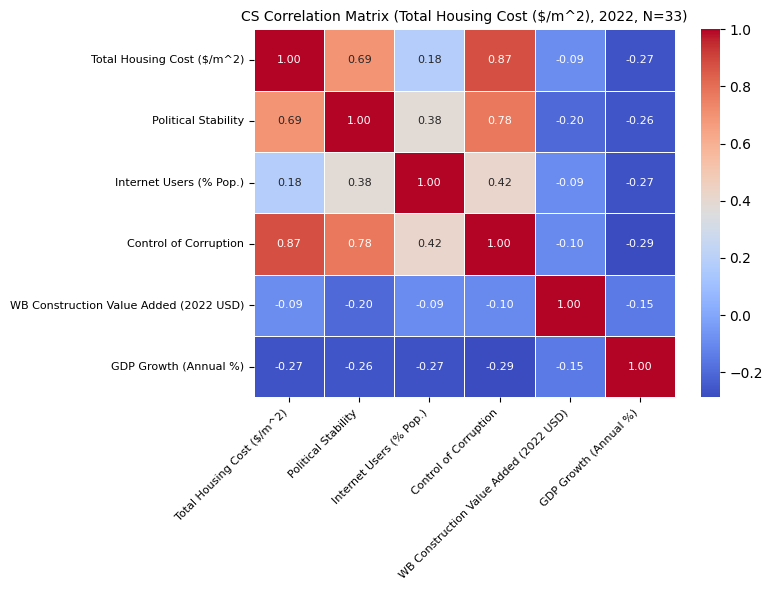


--- Starting Part 3: Machine Learning Models (Panel Data, DV: Log(Construction Value Added USD)) ---

--- Random Forest Regressor (Panel Data) ---
RF Best Params: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}, Best CV R2: 0.9940
RF Test R2: 0.9962, Test MSE: 0.0108

--- XGBoost Regressor (Panel Data) ---
XGB Best Params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.7}, Best CV R2: 0.9943
XGB Test R2: 0.9967, Test MSE: 0.0093

--- ML Model Performance Summary (Panel Data) ---
+-----------------------+------------+----------+---------+-----------------------------------------------------------------------------------------+
|         Model         | Best CV R2 | Test MSE | Test R2 |                                       Best Params                                       |
+-----------------------+------------+----------+---------+----------------------------------------------------------------------------------------

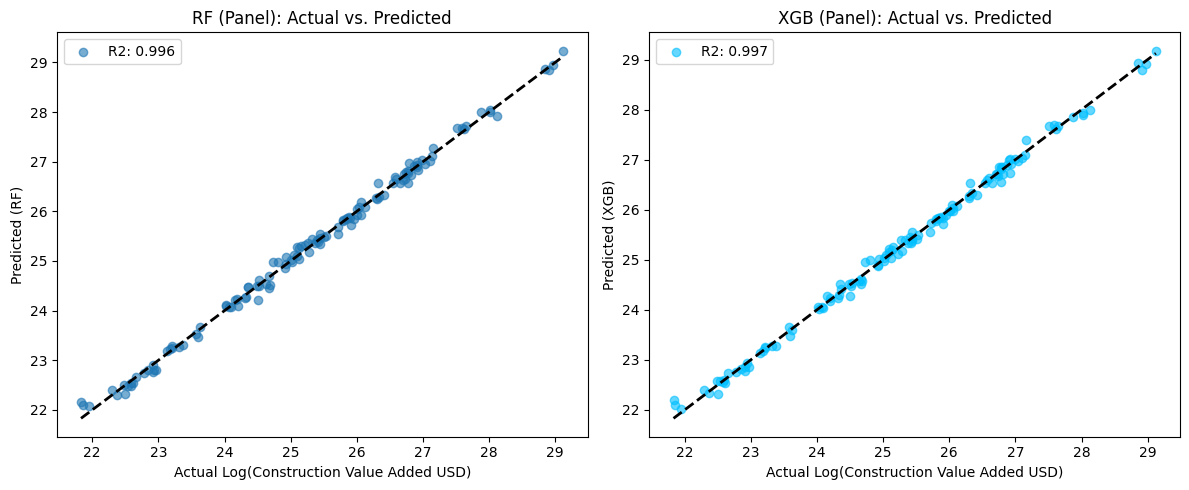


--- ML Feature Importances (Panel Data) ---
+-------------------------------------+------------------------+-----------------------+
|               Feature               |     Random Forest      |        XGBoost        |
+-------------------------------------+------------------------+-----------------------+
| Lagged Log(Constr. Value Added USD) |    0.99269870289477    |  0.9672139883041382   |
|        GDP Growth (Annual %)        |  0.000901623454697814  | 0.0026345180813223124 |
|        Renew. Energy (L1, %)        | 0.0006108463224565402  | 0.003625059500336647  |
|         Political Stability         | 0.0005942599040000938  | 0.0011156362015753984 |
|     Internet Users (L1, % Pop.)     | 0.0005413034786949517  | 0.0026252353563904762 |
|         Gov. Edu. Exp. (L1)         | 0.00048592650778901653 | 0.000928894616663456  |
|     Renewable Energy Cons. (%)      | 0.0004679280972662273  | 0.002285230904817581  |
|      Income Share (Lowest 20%)      | 0.0004374713413127083  | 

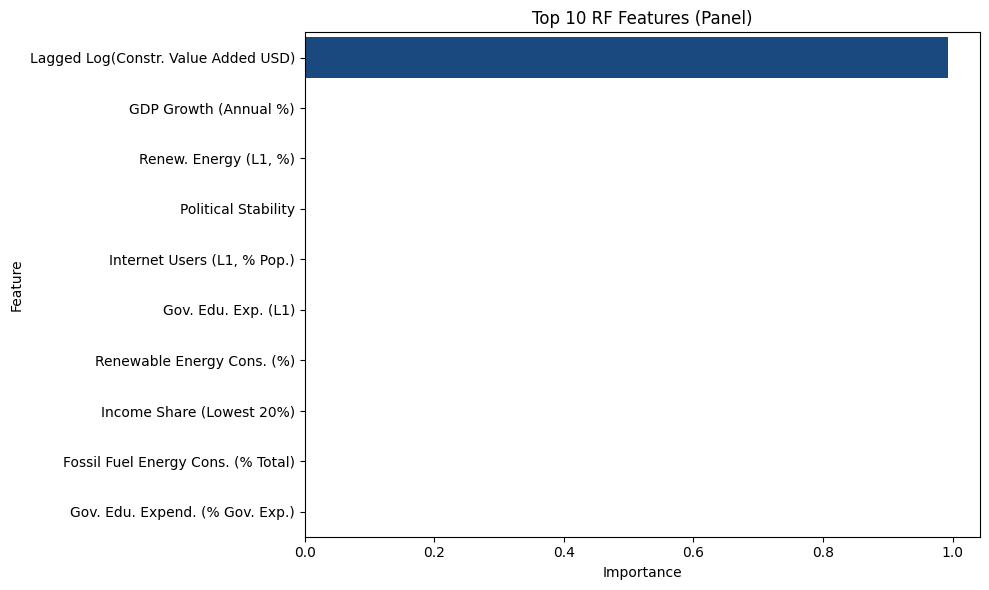

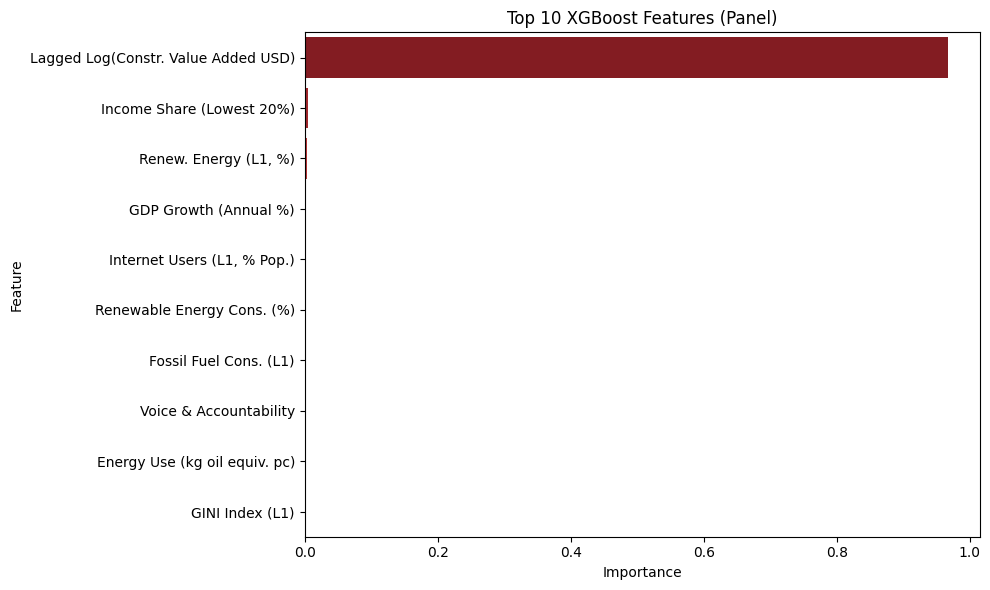


--- Analysis Script Complete ---

RECOMMENDATIONS FOR PUBLICATION / FURTHER ANALYSIS:
1.  `linearmodels` Installation: The primary issue remains with `linearmodels`. Strongly recommend `!pip uninstall linearmodels -y && pip install -U linearmodels` and a **RUNTIME RESTART**. This is crucial for URTs and reliable panel models from this library.
2.  LSDV as FE: The script now uses `statsmodels.OLS` with dummy variables (LSDV) for Fixed Effects. This is a valid alternative if `linearmodels.PanelOLS` consistently fails. Note that RE models and Hausman tests are skipped in this adaptation.
3.  `pyeconometrics`: If GMM is desired, ensure installation: `!pip install pyeconometrics`.
4.  Interpreting LSDV: The `create_results_table` now suppresses dummy coefficients by default for LSDV models for readability. You can change `suppress_dummies=False` to see them.
5.  Unit Root Tests: If `linearmodels` URTs are still unavailable after fixing installation, manual ADF per panel unit can be a fallb

In [ ]:
# -*- coding: utf-8 -*-
"""
ESG Construction Cost Analysis - Final Output Focused (Corrected Panel Fit & Tables & Enhanced URT)
"""

# -------------------------------------
# 0. Install Libraries if in Colab
# -------------------------------------
# !pip uninstall linearmodels -y # Uncomment to force uninstall
# !pip install -U linearmodels # TRY THIS TO FIX LINEARMODELS INSTALLATION
# !pip install pyeconometrics
# !pip install xgboost


# -------------------------------------
# 1. Load Libraries
# -------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from linearmodels.panel import PanelOLS, RandomEffects, PooledOLS # Keep for PooledOLS if it works
from linearmodels.panel.results import PanelEffectsResults, RandomEffectsResults
from statsmodels.regression.linear_model import RegressionResultsWrapper
import scipy.stats as stats
from tabulate import tabulate
from collections import OrderedDict

print("Libraries loaded section complete.")

# Panel Unit Root Test Imports - MODIFIED/ENHANCED
LevinLinChu, ImPesaranShin, Hadri, ADF, PhillipsPerron = None, None, None, None, None
PANEL_URT_AVAILABLE = False
PANEL_URT_PARTIALLY_AVAILABLE = False

urt_error_messages = []

try:
    from linearmodels.panel.meta.unitroot import LevinLinChu, ImPesaranShin, Hadri, ADF, PhillipsPerron
    print("Successfully imported all panel unit root tests (LLC, IPS, Hadri, ADF, PP) from linearmodels.panel.meta.unitroot.")
    PANEL_URT_AVAILABLE = True; PANEL_URT_PARTIALLY_AVAILABLE = True
except (ModuleNotFoundError, ImportError) as e_meta:
    urt_error_messages.append(f"Import from .panel.meta.unitroot failed: {e_meta}")
    print(f"Warning: Could not import URTs from linearmodels.panel.meta.unitroot ({e_meta}). Trying other paths...")
    if not PANEL_URT_PARTIALLY_AVAILABLE:
        try:
            from linearmodels.panel.unitroot import LevinLinChu, ImPesaranShin, Hadri, ADF, PhillipsPerron
            print("Successfully imported all panel unit root tests from linearmodels.panel.unitroot.")
            PANEL_URT_AVAILABLE = True; PANEL_URT_PARTIALLY_AVAILABLE = True
        except (ModuleNotFoundError, ImportError) as e_unitroot_all:
            urt_error_messages.append(f"Import all from .panel.unitroot failed: {e_unitroot_all}")
            _imported_some_from_unitroot = False
            try: from linearmodels.panel.unitroot import LevinLinChu; _imported_some_from_unitroot = True; PANEL_URT_PARTIALLY_AVAILABLE = True; print("  LLC imported from .panel.unitroot")
            except ImportError: pass
            # ... (add other individual imports similarly if needed) ...
            if not _imported_some_from_unitroot: urt_error_messages.append(f"Individual imports from .panel.unitroot also failed.")
    if not PANEL_URT_PARTIALLY_AVAILABLE:
        print("Trying import from linearmodels.panel.stationary (older versions)...")
        _imported_some_from_stationary = False
        try: from linearmodels.panel.stationary import LevinLinChu; _imported_some_from_stationary = True; PANEL_URT_PARTIALLY_AVAILABLE = True; print("  LLC imported from .panel.stationary")
        except ImportError: pass
        # ... (add other individual imports similarly if needed) ...
        if not _imported_some_from_stationary: urt_error_messages.append(f"Import from .panel.stationary also failed for some tests.")

if not PANEL_URT_PARTIALLY_AVAILABLE:
    import linearmodels
    print(f"ERROR: Could not import critical panel unit root tests. linearmodels version: {linearmodels.__version__ if hasattr(linearmodels, '__version__') else 'unknown'}.")
    for msg in urt_error_messages: print(f"  - {msg}")
    print("Panel unit root tests will be skipped.")
elif not PANEL_URT_AVAILABLE: print("Warning: Not all panel unit root tests could be imported.")

DynamicPanelGMM = None
try:
    from pyeconometrics.panel.gmm import DynamicPanelGMM
    print("Successfully imported DynamicPanelGMM from pyeconometrics.")
except (ModuleNotFoundError, ImportError) as e_gmm:
    print(f"WARNING: pyeconometrics import failed: {e_gmm}. GMM models will be skipped.")

import linearmodels
print(f"Linearmodels version: {linearmodels.__version__}")

# --- Configuration Parameters & Helper Functions (keep as is) ---
VIF_THRESHOLD_FOR_REMOVAL = 5
SIGNIFICANCE_LEVEL = 0.05
MICE_MAX_ITER = 50
MICE_N_NEAREST_FEATURES = None
RANDOM_STATE = 42

try:
    import google.colab
    IN_COLAB = True
except ImportError:
    IN_COLAB = False

if IN_COLAB:
    esg_file = '/content/ESG_panel_processed_WorldBank.csv'
    wb_value_added_file = '/content/WorlBank_Construction_Value_Added.csv'
    calcforge_costs_file = '/content/CalcForge_Global_2022_housing_construction_average_costs_data.csv'
else:
    esg_file = 'ESG_panel_processed_WorldBank.csv'
    wb_value_added_file = 'WorlBank_Construction_Value_Added.csv'
    calcforge_costs_file = 'CalcForge_Global_2022_housing_construction_average_costs_data.csv'

def clean_country_name(name_input):
    if pd.isna(name_input): return None
    name_cleaned = str(name_input).strip().lower()
    name_map = {"united arab emirates": "uae", "united kingdom": "uk", "united states": "usa","korea, rep.": "south korea", "russian federation": "russia", "korea, dem. people's rep.": "north korea","egypt, arab rep.": "egypt", "iran, islamic rep.": "iran", "turkiye": "turkey","venezuela, rb": "venezuela", "syrian arab republic": "syria", "yemen, rep.": "yemen","congo, dem. rep.": "congo (dem. rep.)", "congo, rep.": "congo (rep.)", "lao pdr": "laos","slovak republic": "slovakia", "czechia":"czech republic", "st. kitts and nevis": "st kitts and nevis","st. lucia": "st lucia", "st. martin (french part)": "st martin (french part)","st. vincent and the grenadines": "st vincent and the grenadines", "viet nam": "vietnam","brunei darussalam": "brunei", "cabo verde": "cape verde", "cote d'ivoire": "ivory coast","eswatini": "eswatini", "micronesia, fed. sts.": "micronesia (fsm)","hong kong sar, china": "hong kong", "macao sar, china": "macau"}
    return name_map.get(name_cleaned, name_cleaned)

def create_results_table(model_results, model_name="Model", custom_var_names=None, suppress_dummies=True, dummy_prefixes=['entity_dummy_', 'time_dummy_']):
    if model_results is None: return f"Could not generate table for {model_name}: Model results are None."
    params = model_results.params
    p_values = model_results.pvalues

    if hasattr(model_results, 'std_errors'): std_errs = model_results.std_errors
    elif hasattr(model_results, 'bse'): std_errs = model_results.bse
    else: std_errs = pd.Series([np.nan] * len(params), index=params.index); print(f"Warning: Std errors not found for {model_name}")

    results_df = pd.DataFrame({'Variable': params.index, 'Coefficient': params.values,
                               'Std. Error': std_errs.values if std_errs is not None else np.nan,
                               'P-value': p_values.values if p_values is not None else np.nan})

    # Suppress dummy variables if requested
    if suppress_dummies:
        is_dummy = pd.Series(False, index=results_df['Variable'])
        for prefix in dummy_prefixes:
            is_dummy = is_dummy | results_df['Variable'].str.startswith(prefix)
        results_df = results_df[~is_dummy]

    stars = []
    if 'P-value' in results_df.columns and results_df['P-value'] is not None: # Check if P-value column exists and is not None
        for p_val in results_df['P-value']:
            if pd.isna(p_val): stars.append('')
            elif p_val < 0.01: stars.append('***')
            elif p_val < 0.05: stars.append('**')
            elif p_val < 0.1: stars.append('*')
            else: stars.append('')
    else: stars = [''] * len(results_df) # Fallback if P-values are missing

    results_df['Sig.'] = stars
    results_df['Coefficient_Formatted'] = results_df.apply(lambda r: f"{r['Coefficient']:.4f}{r['Sig.']}" if pd.notna(r['Coefficient']) else "N/A", axis=1)
    if custom_var_names: results_df['Variable'] = results_df['Variable'].map(custom_var_names).fillna(results_df['Variable'])

    display_cols = ['Variable', 'Coefficient_Formatted', 'Std. Error', 'P-value']
    # Ensure P-value column is float for formatting, if it exists
    if 'P-value' in results_df.columns:
        results_df['P-value'] = pd.to_numeric(results_df['P-value'], errors='coerce')

    results_df_display = results_df[display_cols].copy()
    results_df_display.rename(columns={'Coefficient_Formatted': 'Coefficient'}, inplace=True)

    summary_stats = OrderedDict()
    summary_stats["Model"] = model_name
    if hasattr(model_results, 'rsquared_overall'): summary_stats["R-sq (Overall)"] = f"{model_results.rsquared_overall:.4f}"
    if hasattr(model_results, 'rsquared_within'): summary_stats["R-sq (Within)"] = f"{model_results.rsquared_within:.4f}"
    if hasattr(model_results, 'rsquared_between'): summary_stats["R-sq (Between)"] = f"{model_results.rsquared_between:.4f}"
    if hasattr(model_results, 'rsquared') and not any(k in summary_stats for k in ["R-sq (Overall)", "R-sq (Within)"]): summary_stats["R-squared"] = f"{model_results.rsquared:.4f}"
    if hasattr(model_results, 'rsquared_adj') and isinstance(model_results, RegressionResultsWrapper): summary_stats["Adj. R-squared"] = f"{model_results.rsquared_adj:.4f}"
    if hasattr(model_results, 'nobs'): summary_stats["Observations"] = str(int(model_results.nobs))
    if isinstance(model_results, (PanelEffectsResults, RandomEffectsResults)): # This part will be less relevant for statsmodels LSDV
        if hasattr(model_results, 'entity_info') and model_results.entity_info: summary_stats["Entities"] = str(model_results.entity_info.total)
        if hasattr(model_results, 'time_info') and model_results.time_info: summary_stats["Time Periods"] = str(model_results.time_info.total)
    elif isinstance(model_results, RegressionResultsWrapper): # For statsmodels OLS (LSDV)
        # Try to infer N and T if LSDV was used, though it's not directly stored
        if 'df_model' in model_results.summary().tables[0].data[5]: # Heuristic to get number of regressors
             num_regressors = int(model_results.summary().tables[0].data[5][1])
             # This is tricky, depends on how dummies were named and counted

    f_stat_val, f_pval_val, f_type_display = None, None, "F-statistic (Overall/Robust)"
    f_stat_attr = getattr(model_results, 'f_statistic_robust', getattr(model_results, 'f_statistic', None))
    if f_stat_attr is None and isinstance(model_results, RandomEffectsResults): f_stat_attr = getattr(model_results, 'wald_test_joint', None); f_type_display = "Wald chi2(joint)"

    if hasattr(model_results, 'fvalue'): # For statsmodels OLS
        f_stat_val = model_results.fvalue
        f_pval_val = model_results.f_pvalue
        f_type_display="F-statistic (OLS)"
    elif f_stat_attr: # For linearmodels
        f_stat_val, f_pval_val = getattr(f_stat_attr, 'stat', None), getattr(f_stat_attr, 'pval', None)

    if f_stat_val is not None and f_pval_val is not None: summary_stats[f_type_display] = f"{f_stat_val:.4f} (p={f_pval_val:.4f})"
    if hasattr(model_results, 'condition_number'): summary_stats["Cond. No."] = f"{model_results.condition_number:.2e}"

    footer_list = [f"{k}: {v}" for k,v in summary_stats.items()]
    footer_text = "\n" + "\n".join(footer_list) + "\nSignificance: *** p<0.01, ** p<0.05, * p<0.1"
    if suppress_dummies and any(any(str(var).startswith(p) for p in dummy_prefixes) for var in params.index):
        footer_text += "\n(Dummy variable coefficients suppressed for brevity)"

    return tabulate(results_df_display, headers='keys', tablefmt='pretty', floatfmt=(".4f", ".4f", ".4f", ".4f"), showindex=False) + footer_text


VARIABLE_NAME_MAP = {
    'const': 'Constant', 'log_construction_value_added': 'Log(Construction Value Added USD)',
    'LDV_log_construction_value_added': 'Lagged Log(Constr. Value Added USD)',
    'Total_Housing_Cost_Per_M2': 'Total Housing Cost ($/m^2)',
    'control_corruption_estimate': 'Control of Corruption', 'economic_and_social_rights_performance_score': 'Econ. & Social Rights Score',
    'renewable_energy_consumption_total_final_energy_consumption': 'Renewable Energy Cons. (%)', 'rule_law_estimate': 'Rule of Law',
    'voice_and_accountability_estimate': 'Voice & Accountability', 'gdp_growth_annual': 'GDP Growth (Annual %)',
    'political_stability_and_absence_violence_terrorism_estimate': 'Political Stability',
    'government_expenditure_on_education_total_government_expenditure': 'Gov. Edu. Expend. (% Gov. Exp.)',
    'research_and_development_expenditure_gdp': 'R&D Expend. (% GDP)', 'individuals_using_the_internet_population': 'Internet Users (% Pop.)',
    'gini_index': 'GINI Index', 'literacy_rate_adult_total_people_ages_15_and_above': 'Literacy Rate (Adult %)',
    'fossil_fuel_energy_consumption_total': 'Fossil Fuel Energy Cons. (% Total)',
    'energy_use_kg_oil_equivalent_per_capita': 'Energy Use (kg oil equiv. pc)',
    'population_density_people_per_sq_km_land_area': 'Population Density (per sq. km)',
    'income_share_held_by_lowest_20': 'Income Share (Lowest 20%)',
    'control_corruption_estimate_lag1': 'Ctrl. Corruption (L1)', 'economic_and_social_rights_performance_score_lag1': 'Econ. & Soc. Rights (L1)',
    'renewable_energy_consumption_total_final_energy_consumption_lag1': 'Renew. Energy (L1, %)', 'rule_law_estimate_lag1': 'Rule of Law (L1)',
    'voice_and_accountability_estimate_lag1': 'Voice & Acc. (L1)', 'political_stability_and_absence_violence_terrorism_estimate_lag1': 'Poli. Stability (L1)',
    'government_expenditure_on_education_total_government_expenditure_lag1': 'Gov. Edu. Exp. (L1)',
    'research_and_development_expenditure_gdp_lag1': 'R&D Exp. (L1, % GDP)', 'individuals_using_the_internet_population_lag1': 'Internet Users (L1, % Pop.)',
    'gini_index_lag1': 'GINI Index (L1)', 'literacy_rate_adult_total_people_ages_15_and_above_lag1': 'Literacy Rate (L1)',
    'fossil_fuel_energy_consumption_total_lag1': 'Fossil Fuel Cons. (L1)', 'energy_use_kg_oil_equivalent_per_capita_lag1': 'Energy Use (L1, kg oil pc)',
    'population_density_people_per_sq_km_land_area_lag1': 'Pop. Density (L1)', 'income_share_held_by_lowest_20_lag1': 'Income Share Low 20% (L1)',
    'WB_ValueAdded_2022': 'WB Construction Value Added (2022 USD)'}

# -------------------------------------
# 2. Load Data
# -------------------------------------
print("--- Starting Data Loading & Initial Preprocessing ---")
try:
    df_esg_raw = pd.read_csv(esg_file, sep=',')
    if 'Country' in df_esg_raw.columns: df_esg_raw['country'] = df_esg_raw['Country'].apply(clean_country_name); df_esg_raw.drop(columns=['Country'], inplace=True, errors='ignore')
    elif 'country' in df_esg_raw.columns: df_esg_raw['country'] = df_esg_raw['country'].apply(clean_country_name)
    print("ESG data loaded and countries cleaned.")

    df_wb_value_raw = pd.read_csv(wb_value_added_file, sep=',')
    if 'Country' in df_wb_value_raw.columns: df_wb_value_raw['country'] = df_wb_value_raw['Country'].apply(clean_country_name); df_wb_value_raw.drop(columns=['Country'], inplace=True, errors='ignore')
    elif 'country' in df_wb_value_raw.columns: df_wb_value_raw['country'] = df_wb_value_raw['country'].apply(clean_country_name)
    print("World Bank Construction Value Added data loaded and countries cleaned.")

    df_calcforge_raw = pd.read_csv(calcforge_costs_file, sep=',', header=1)
    df_calcforge_raw.columns = [col.strip() for col in df_calcforge_raw.columns]
    if 'Country' in df_calcforge_raw.columns: df_calcforge_raw['country'] = df_calcforge_raw['Country'].apply(clean_country_name); df_calcforge_raw.drop(columns=['Country'], inplace=True, errors='ignore')
    elif 'country' in df_calcforge_raw.columns: df_calcforge_raw['country'] = df_calcforge_raw['country'].apply(clean_country_name)
    print("CalcForge Housing Cost data loaded and countries cleaned.")
except FileNotFoundError as e: exit(f"Error loading files: {e}. Please ensure files are in the correct path or Colab environment.")
except Exception as e: exit(f"An unexpected error occurred during data loading: {e}")

# -------------------------------------
# 3. Panel Regression Analysis
# -------------------------------------
print("\n--- Starting Part 1: Panel Regression Analysis ---")
# 3.1 Prepare World Bank Data
print("\n3.1 Preparing World Bank Data (Panel DV)...")
INDICATOR_NAME_CONSTRUCTION_VALUE = 'Industry (including construction), value added (current US$)'
df_wb_value_filtered = df_wb_value_raw[df_wb_value_raw['Indicator Name'] == INDICATOR_NAME_CONSTRUCTION_VALUE].copy()
if df_wb_value_filtered.empty: exit(f"CRITICAL ERROR: No rows for indicator '{INDICATOR_NAME_CONSTRUCTION_VALUE}'.")
df_wb_value_long = pd.melt(df_wb_value_filtered, id_vars=['country', 'Indicator Name'], value_vars=[col for col in df_wb_value_filtered.columns if str(col).isdigit()], var_name='year', value_name='construction_value_added_usd')
df_wb_value_long['year'] = pd.to_numeric(df_wb_value_long['year'], errors='coerce').astype('Int64')
df_wb_value_long = df_wb_value_long[['country', 'year', 'construction_value_added_usd']].dropna()
df_wb_value_long['construction_value_added_usd'] = pd.to_numeric(df_wb_value_long['construction_value_added_usd'], errors='coerce')
df_wb_value_long.dropna(subset=['construction_value_added_usd'], inplace=True)
df_wb_value_long = df_wb_value_long[df_wb_value_long['construction_value_added_usd'] > 1e-9]
df_wb_value_long['log_construction_value_added'] = np.log(df_wb_value_long['construction_value_added_usd'])
dependent_var_panel = 'log_construction_value_added'
dv_col = dependent_var_panel
print(f"Prepared WB Data. Shape: {df_wb_value_long.shape}, DV: {dependent_var_panel}")

# 3.2 Prepare ESG Data (Keep as is)
print("\n3.2 Preparing ESG Data (Panel IVs)...")
df_esg_clean = df_esg_raw.copy()
if 'Year' in df_esg_clean.columns and 'year' not in df_esg_clean.columns: df_esg_clean.rename(columns={'Year': 'year'}, inplace=True)
df_esg_clean['year'] = pd.to_numeric(df_esg_clean['year'], errors='coerce').astype('Int64')
df_esg_clean.dropna(subset=['country', 'year'], inplace=True)
panel_initial_esg_features = [
    'control_corruption_estimate', 'economic_and_social_rights_performance_score',
    'renewable_energy_consumption_total_final_energy_consumption', 'rule_law_estimate',
    'voice_and_accountability_estimate', 'gdp_growth_annual',
    'political_stability_and_absence_violence_terrorism_estimate',
    'government_expenditure_on_education_total_government_expenditure',
    'research_and_development_expenditure_gdp', 'individuals_using_the_internet_population',
    'gini_index', 'literacy_rate_adult_total_people_ages_15_and_above',
    'fossil_fuel_energy_consumption_total', 'energy_use_kg_oil_equivalent_per_capita',
    'population_density_people_per_sq_km_land_area', 'income_share_held_by_lowest_20']
panel_chosen_esg_features = [col for col in panel_initial_esg_features if col in df_esg_clean.columns]
if not panel_chosen_esg_features: exit("Error: No panel ESG features selected or found.")
print(f"Initial Panel ESG features: {panel_chosen_esg_features}")
cols_where_zero_is_nan_panel = ['economic_and_social_rights_performance_score',
    'government_expenditure_on_education_total_government_expenditure',
    'research_and_development_expenditure_gdp', 'gini_index', 'income_share_held_by_lowest_20']
print("Converting specific 0s to NaNs for Panel ESG data...")
for col in cols_where_zero_is_nan_panel:
    if col in df_esg_clean.columns and col in panel_chosen_esg_features:
        original_nan_count = df_esg_clean[col].isnull().sum()
        df_esg_clean[col] = df_esg_clean[col].replace(0, np.nan)
        print(f"  For '{col}', 0s->NaN. NaN count: {original_nan_count} -> {df_esg_clean[col].isnull().sum()}")
for col in panel_chosen_esg_features: df_esg_clean[col] = pd.to_numeric(df_esg_clean[col], errors='coerce')
df_esg_subset_panel = df_esg_clean[['country', 'year'] + panel_chosen_esg_features].drop_duplicates(subset=['country', 'year'])

# 3.3 Merge Data & Create LDV (Keep as is)
print("\n3.3 Merging data for panel analysis & creating LDV...")
panel_data = pd.merge(df_wb_value_long, df_esg_subset_panel, on=['country', 'year'], how='inner')
if panel_data.empty: exit("Error: Merged panel DataFrame is empty before LDV.")
panel_data.sort_values(by=['country', 'year'], inplace=True)
panel_data['LDV_log_construction_value_added'] = panel_data.groupby('country')[dependent_var_panel].shift(1)
panel_data.dropna(subset=[dependent_var_panel], inplace=True)
print(f"Merged panel DataFrame shape (with LDV): {panel_data.shape}")

# 3.4 Create Lagged IVs (Keep as is)
print("\n3.4 Creating Lagged Independent Variables...")
panel_features_to_lag = [f for f in panel_chosen_esg_features if f != 'gdp_growth_annual']
panel_df_for_mice = panel_data.copy()
for col in panel_features_to_lag:
    if col in panel_df_for_mice.columns: panel_df_for_mice[f'{col}_lag1'] = panel_df_for_mice.groupby('country')[col].shift(1)

panel_ivs_for_mice = panel_chosen_esg_features[:]
if 'LDV_log_construction_value_added' in panel_df_for_mice.columns: panel_ivs_for_mice.append('LDV_log_construction_value_added')
for col in panel_features_to_lag:
    if f'{col}_lag1' in panel_df_for_mice.columns: panel_ivs_for_mice.append(f'{col}_lag1')
panel_ivs_for_mice = list(set([col for col in panel_ivs_for_mice if col in panel_df_for_mice.columns]))

# 3.5 MICE Imputation (Keep as is)
print("\n3.5 MICE Imputation for panel IVs (incl. LDV & lags)...")
panel_df_final_imputed = panel_df_for_mice.copy()
data_to_impute_panel_ivs = panel_df_final_imputed[[dependent_var_panel] + panel_ivs_for_mice].copy()
cols_for_imputation_actual = panel_ivs_for_mice[:]
if not data_to_impute_panel_ivs[cols_for_imputation_actual].empty and data_to_impute_panel_ivs[cols_for_imputation_actual].isnull().sum().sum() > 0:
    print(f"NaNs in panel IVs (and LDV) for MICE: \n{data_to_impute_panel_ivs[cols_for_imputation_actual].isnull().sum()[data_to_impute_panel_ivs[cols_for_imputation_actual].isnull().sum() > 0].sort_values(ascending=False)}")
    imputer_panel_ivs = IterativeImputer(estimator=BayesianRidge(), max_iter=MICE_MAX_ITER, random_state=RANDOM_STATE, tol=1e-3, n_nearest_features=MICE_N_NEAREST_FEATURES)
    imputed_array_panel_ivs = imputer_panel_ivs.fit_transform(data_to_impute_panel_ivs)
    imputed_df_temp = pd.DataFrame(imputed_array_panel_ivs, columns=data_to_impute_panel_ivs.columns, index=data_to_impute_panel_ivs.index)
    for col_name in cols_for_imputation_actual:
        if col_name in panel_df_final_imputed.columns and col_name in imputed_df_temp.columns:
            panel_df_final_imputed[col_name] = imputed_df_temp[col_name]
    print("MICE imputation complete for panel IVs.")
else: print("No NaNs found in panel IVs for MICE or data empty.")
panel_df_final_imputed.dropna(subset=[dependent_var_panel] + panel_ivs_for_mice, inplace=True)
print(f"Panel data for regression shape after MICE and all NaN drop: {panel_df_final_imputed.shape}")
if panel_df_final_imputed.shape[0] < 20 : exit("Too few observations after MICE/lag NaN drop for panel.")

# 3.5.1 Panel Unit Root Tests (Keep as is, it will skip gracefully if imports fail)
print("\n--- 3.5.1 Panel Unit Root Tests (using imputed data before VIF) ---")
# ... (URT code remains here, will be skipped if PANEL_URT_PARTIALLY_AVAILABLE is False) ...
unit_root_test_results_summary = {}
if not PANEL_URT_PARTIALLY_AVAILABLE:
    print("Skipping Panel Unit Root Tests as required libraries/modules were not available or correctly imported.")
else:
    panel_df_urt = panel_df_final_imputed.set_index(['country', 'year']).sort_index()
    vars_for_urt = [dependent_var_panel] + panel_ivs_for_mice
    vars_for_urt = list(set([v for v in vars_for_urt if v in panel_df_urt.columns]))
    print(f"Variables to be tested for unit roots: {vars_for_urt}")
    for var_name_urt in vars_for_urt: # ... (rest of URT loop)
        if var_name_urt not in panel_df_urt.columns: continue
        pretty_var_name = VARIABLE_NAME_MAP.get(var_name_urt, var_name_urt)
        print(f"\nTesting variable: {pretty_var_name} ({var_name_urt})")
        series_to_test_urt = panel_df_urt[var_name_urt].dropna().astype(float)
        if series_to_test_urt.empty or not isinstance(series_to_test_urt.index, pd.MultiIndex) or \
           series_to_test_urt.groupby(level=0).count().min() < 3 or series_to_test_urt.nunique() <= 1:
            # ... (skip conditions) ...
            print(f"  Skipping {pretty_var_name} due to data issues (empty, not MultiIndex, short panel, or constant).")
            status_detail = "Empty" if series_to_test_urt.empty else \
                            "Not MultiIndex" if not isinstance(series_to_test_urt.index, pd.MultiIndex) else \
                            "Short Panel" if series_to_test_urt.groupby(level=0).count().min() < 3 else "Constant"
            unit_root_test_results_summary[var_name_urt] = {"status": status_detail}
            continue
        current_var_results = {}
        if LevinLinChu: # ... (LLC test)
            try: llc_res = LevinLinChu(series_to_test_urt, trend='c'); current_var_results["LLC"] = {'stat': llc_res.statistic, 'pval': llc_res.pvalue}; print(f"  LLC: Stat={llc_res.statistic:.3f}, Pval={llc_res.pvalue:.3f}")
            except Exception as e: current_var_results["LLC"] = {'error': str(e)}; print(f"  LLC Error: {e}")
        if ImPesaranShin: # ... (IPS test)
            try: ips_res = ImPesaranShin(series_to_test_urt, trend='c'); current_var_results["IPS"] = {'stat': ips_res.statistic, 'pval': ips_res.pvalue}; print(f"  IPS: Stat={ips_res.statistic:.3f}, Pval={ips_res.pvalue:.3f}")
            except Exception as e: current_var_results["IPS"] = {'error': str(e)}; print(f"  IPS Error: {e}")
        if Hadri: # ... (Hadri test)
            try: hadri_res = Hadri(series_to_test_urt, trend='c'); current_var_results["Hadri"] = {'stat': hadri_res.statistic, 'pval': hadri_res.pvalue}; print(f"  Hadri: Stat={hadri_res.statistic:.3f}, Pval={hadri_res.pvalue:.3f}")
            except Exception as e: current_var_results["Hadri"] = {'error': str(e)}; print(f"  Hadri Error: {e}")
        if ADF: # ... (ADF test)
            try: adf_f_res = ADF(series_to_test_urt, trend='c'); current_var_results["Fisher-ADF"] = {'stat': adf_f_res.statistic, 'pval': adf_f_res.pvalue}; print(f"  Fisher-ADF: Stat={adf_f_res.statistic:.3f}, Pval={adf_f_res.pvalue:.3f}")
            except Exception as e: current_var_results["Fisher-ADF"] = {'error': str(e)}; print(f"  Fisher-ADF Error: {e}")
        if PhillipsPerron: # ... (PP test)
            try: pp_f_res = PhillipsPerron(series_to_test_urt, trend='c'); current_var_results["Fisher-PP"] = {'stat': pp_f_res.statistic, 'pval': pp_f_res.pvalue}; print(f"  Fisher-PP: Stat={pp_f_res.statistic:.3f}, Pval={pp_f_res.pvalue:.3f}")
            except Exception as e: current_var_results["Fisher-PP"] = {'error': str(e)}; print(f"  Fisher-PP Error: {e}")
        unit_root_test_results_summary[var_name_urt] = current_var_results
    # ... (URT summary table print remains) ...
    print("\n--- Summary of Panel Unit Root Test P-values ---") # Copied from before
    summary_table_urt = []
    for var, tests in unit_root_test_results_summary.items():
        row = {'Variable': VARIABLE_NAME_MAP.get(var, var)}
        if 'status' in tests: row['Status'] = tests['status']; all_test_cols = ['LLC', 'IPS', 'Hadri', 'Fisher-ADF', 'Fisher-PP']; [row.update({tc: tests['status']}) for tc in all_test_cols]
        else:
            for test_name_key in ['LLC', 'IPS', 'Hadri', 'Fisher-ADF', 'Fisher-PP']:
                if test_name_key in tests:
                    if 'pval' in tests[test_name_key]: pval = tests[test_name_key]['pval']; stars = '***' if pval < 0.01 else '**' if pval < 0.05 else '*' if pval < 0.1 else ''; row[test_name_key] = f"{pval:.3f}{stars}"
                    elif 'error' in tests[test_name_key]: row[test_name_key] = "Error"
                    elif 'status' in tests[test_name_key]: row[test_name_key] = tests[test_name_key]['status']
                else: row[test_name_key] = "N/Avail"
        summary_table_urt.append(row)
    if summary_table_urt:
        summary_df_urt = pd.DataFrame(summary_table_urt)
        all_test_cols = ['LLC', 'IPS', 'Hadri', 'Fisher-ADF', 'Fisher-PP']
        for tc in all_test_cols:
            if tc not in summary_df_urt.columns: summary_df_urt[tc] = "N/Avail"
        if 'Status' not in summary_df_urt.columns : summary_df_urt.insert(1, 'Status', '')
        print(tabulate(summary_df_urt[['Variable', 'Status'] + all_test_cols], headers='keys', tablefmt='pretty', showindex=False))
        print("Significance: *** p<0.01, ** p<0.05, * p<0.1. For Hadri, low p-val indicates unit root. N/Avail means test module not imported.")
    else: print("No unit root test results to summarize.")


# 3.6 Iterative VIF (Keep as is)
print("\n3.6 Iterative VIF check for panel IVs (incl. LDV & lags)...")
# ... (VIF code remains here) ...
X_vif_panel_check = panel_df_final_imputed[panel_ivs_for_mice].copy()
X_vif_panel_check = X_vif_panel_check.loc[:, X_vif_panel_check.apply(pd.Series.nunique) > 1]
final_panel_ivs_selected = []
if not X_vif_panel_check.empty:
    final_panel_ivs_selected = X_vif_panel_check.columns.tolist()
    max_vif_iters = len(final_panel_ivs_selected) + 5
    for i in range(max_vif_iters): # ... (rest of VIF loop)
        if not final_panel_ivs_selected or len(final_panel_ivs_selected) <= 1: break
        X_iter_vif = panel_df_final_imputed[final_panel_ivs_selected].copy().dropna()
        if X_iter_vif.empty or X_iter_vif.shape[0] < max(2, len(final_panel_ivs_selected) + 1) or X_iter_vif.shape[1] == 0 : break
        try:
            X_iter_vif_float = X_iter_vif.astype(float); X_iter_vif_const = sm.add_constant(X_iter_vif_float, prepend=True, has_constant='raise')
            vif_values = [variance_inflation_factor(X_iter_vif_const.values, j + 1) for j in range(X_iter_vif_float.shape[1])]
            vif_series = pd.Series(vif_values, index=X_iter_vif_float.columns, dtype=float)
            max_vif_val = vif_series.max()
            if max_vif_val > VIF_THRESHOLD_FOR_REMOVAL: remove_feature = vif_series.idxmax(); print(f"  Iterative VIF (Panel) {i+1}: Removing '{VARIABLE_NAME_MAP.get(remove_feature, remove_feature)}' (VIF: {max_vif_val:.2f})"); final_panel_ivs_selected.remove(remove_feature)
            else: print(f"All remaining panel IVs ({len(final_panel_ivs_selected)}) have VIF <= {VIF_THRESHOLD_FOR_REMOVAL} (Max VIF: {max_vif_val:.2f})."); break
        except Exception as e_vif_iter: print(f"Error in VIF iteration {i+1}: {e_vif_iter}"); break
else: print("Warning: X_vif_panel_check is empty. No IVs to perform VIF on.")
if not final_panel_ivs_selected: print("Warning: No panel IVs left after VIF pruning.")
else: print(f"Final Panel IVs after VIF ({len(final_panel_ivs_selected)}): {[VARIABLE_NAME_MAP.get(v,v) for v in final_panel_ivs_selected]}")


# 3.7 Standard Panel Regression Modeling (MODIFIED SECTION)
print("\n3.7 Standard Panel Regression Modeling ...")
panel_regression_tables_std = {}
results_objects_std = {} # Store model results here
final_selected_panel_model_results_std = None
preferred_model_type_name_std = "Undetermined"

if dependent_var_panel and final_panel_ivs_selected and not panel_df_final_imputed.empty:
    # Prepare data for models
    # Ensure panel_df_final_imputed has 'country' and 'year' as columns if they were index
    if isinstance(panel_df_final_imputed.index, pd.MultiIndex):
        panel_data_for_models = panel_df_final_imputed.reset_index()
    else:
        panel_data_for_models = panel_df_final_imputed.copy()

    # Align Y and X for all models first, using the MultiIndex from panel_df_final_imputed
    panel_data_std_indexed = panel_df_final_imputed.set_index(['country', 'year']).sort_index()

    y_panel_std_base = panel_data_std_indexed[dependent_var_panel]
    ivs_for_std_models_base = [v for v in final_panel_ivs_selected if v != 'LDV_log_construction_value_added']

    if not ivs_for_std_models_base:
        print("No suitable IVs for standard panel models after VIF and LDV exclusion.")
    else:
        X_panel_df_std_base = panel_data_std_indexed[ivs_for_std_models_base].copy()
        X_panel_df_std_base = X_panel_df_std_base.loc[:, X_panel_df_std_base.apply(pd.Series.nunique) > 1]
        actual_ivs_for_fitting_std = X_panel_df_std_base.columns.tolist()

        if X_panel_df_std_base.empty or not actual_ivs_for_fitting_std:
            print("Error: No valid IVs for standard panel model after filtering constant columns.")
        elif y_panel_std_base.shape[0] <= len(actual_ivs_for_fitting_std) + 1:
            print(f"Error: Not enough observations ({y_panel_std_base.shape[0]}) for std panel regression.")
        else:
            # Convert to numeric, handle inf, and dropna for the base y and X (before dummies)
            y_panel_std_clean = pd.to_numeric(y_panel_std_base, errors='coerce').astype(np.float64)
            X_panel_df_std_clean = X_panel_df_std_base[actual_ivs_for_fitting_std].copy()
            for col in X_panel_df_std_clean.columns:
                X_panel_df_std_clean[col] = pd.to_numeric(X_panel_df_std_clean[col], errors='coerce').astype(np.float64)

            y_panel_std_clean.replace([np.inf, -np.inf], np.nan, inplace=True)
            X_panel_df_std_clean.replace([np.inf, -np.inf], np.nan, inplace=True)

            # Align y and X (original IVs) after cleaning
            aligned_df_std = pd.concat([y_panel_std_clean.rename('__DV__'), X_panel_df_std_clean], axis=1).dropna()

            if aligned_df_std.empty or aligned_df_std.shape[0] <= X_panel_df_std_clean.shape[1]:
                print(f"Error: Data insufficient after base cleaning for std panel models. Obs: {aligned_df_std.shape[0]}")
            else:
                y_panel_std_aligned = aligned_df_std['__DV__']
                X_panel_df_std_aligned_no_const = aligned_df_std.drop(columns=['__DV__']) # No constant yet

                # --- Pooled OLS (using linearmodels as it worked) ---
                model_name_pooled = "Pooled OLS (linearmodels)"
                print(f"\nFitting {model_name_pooled}...")
                try:
                    X_pooled_const = sm.add_constant(X_panel_df_std_aligned_no_const.astype(np.float64), prepend=True)
                    pooled_ols_model = PooledOLS(y_panel_std_aligned.astype(np.float64), X_pooled_const)
                    results_objects_std[model_name_pooled] = pooled_ols_model.fit(cov_type='clustered', cluster_entity=True)
                    panel_regression_tables_std[model_name_pooled] = create_results_table(results_objects_std[model_name_pooled], model_name_pooled, custom_var_names=VARIABLE_NAME_MAP, suppress_dummies=False) # No dummies here
                except Exception as e_pooled:
                    print(f"ERROR fitting {model_name_pooled}: {e_pooled}")
                    results_objects_std[model_name_pooled] = None
                    panel_regression_tables_std[model_name_pooled] = f"Fitting Failed: {e_pooled}"

                # --- Entity FE (LSDV with statsmodels) ---
                model_name_lsdv_entity = "Entity FE (LSDV statsmodels)"
                print(f"\nFitting {model_name_lsdv_entity}...")
                try:
                    # Create entity dummies from the index of X_panel_df_std_aligned_no_const
                    entity_dummies = pd.get_dummies(X_panel_df_std_aligned_no_const.index.get_level_values('country'), prefix='entity_dummy', drop_first=True).astype(np.float64)
                    entity_dummies.index = X_panel_df_std_aligned_no_const.index # Align index

                    X_lsdv_entity = pd.concat([X_panel_df_std_aligned_no_const, entity_dummies], axis=1)
                    X_lsdv_entity_const = sm.add_constant(X_lsdv_entity.astype(np.float64), prepend=True)

                    lsdv_entity_model = sm.OLS(y_panel_std_aligned.astype(np.float64), X_lsdv_entity_const)
                    results_objects_std[model_name_lsdv_entity] = lsdv_entity_model.fit(cov_type='cluster', cov_kwds={'groups': X_panel_df_std_aligned_no_const.index.get_level_values('country')}) # Cluster by entity
                    panel_regression_tables_std[model_name_lsdv_entity] = create_results_table(results_objects_std[model_name_lsdv_entity], model_name_lsdv_entity, custom_var_names=VARIABLE_NAME_MAP)
                except Exception as e_lsdv_entity:
                    print(f"ERROR fitting {model_name_lsdv_entity}: {e_lsdv_entity}")
                    results_objects_std[model_name_lsdv_entity] = None
                    panel_regression_tables_std[model_name_lsdv_entity] = f"Fitting Failed: {e_lsdv_entity}"

                # --- Two-Way FE (LSDV with statsmodels) ---
                model_name_lsdv_twoway = "Two-Way FE (LSDV statsmodels)"
                print(f"\nFitting {model_name_lsdv_twoway}...")
                try:
                    # Entity dummies already created
                    time_dummies = pd.get_dummies(X_panel_df_std_aligned_no_const.index.get_level_values('year'), prefix='time_dummy', drop_first=True).astype(np.float64)
                    time_dummies.index = X_panel_df_std_aligned_no_const.index # Align index

                    X_lsdv_twoway = pd.concat([X_panel_df_std_aligned_no_const, entity_dummies, time_dummies], axis=1)
                    X_lsdv_twoway_const = sm.add_constant(X_lsdv_twoway.astype(np.float64), prepend=True)

                    # For two-way clustered SEs with statsmodels OLS, it's more complex.
                    # We can use entity-clustered or attempt a more involved setup if needed.
                    # For simplicity, let's use entity-clustered here.
                    # Proper two-way clustering often requires specific packages or manual calculation.
                    lsdv_twoway_model = sm.OLS(y_panel_std_aligned.astype(np.float64), X_lsdv_twoway_const)
                    # Getting two-way cluster robust SEs for sm.OLS is non-trivial.
                    # Let's use HC3 for robustness, acknowledging it's not full two-way clustering.
                    results_objects_std[model_name_lsdv_twoway] = lsdv_twoway_model.fit(cov_type='HC3')
                    print("  Note: Two-Way FE (LSDV) using HC3 robust SEs (not full two-way clustering).")
                    panel_regression_tables_std[model_name_lsdv_twoway] = create_results_table(results_objects_std[model_name_lsdv_twoway], model_name_lsdv_twoway, custom_var_names=VARIABLE_NAME_MAP)
                except Exception as e_lsdv_twoway:
                    print(f"ERROR fitting {model_name_lsdv_twoway}: {e_lsdv_twoway}")
                    results_objects_std[model_name_lsdv_twoway] = None
                    panel_regression_tables_std[model_name_lsdv_twoway] = f"Fitting Failed: {e_lsdv_twoway}"

                print("\n--- All Standard Panel Model Summaries (Formatted Tables) ---")
                for name_tbl_loop, table_str_loop in panel_regression_tables_std.items():
                    print(f"\n--- {name_tbl_loop} Summary ---\n{table_str_loop}")

                # Model Selection (Simplified due to no direct RE with statsmodels here)
                results_pooled_ols = results_objects_std.get(model_name_pooled)
                results_lsdv_entity = results_objects_std.get(model_name_lsdv_entity)
                results_lsdv_twoway = results_objects_std.get(model_name_lsdv_twoway)

                if results_pooled_ols and results_lsdv_entity:
                    print("\n--- Model Selection Tests (Standard Models - using LSDV for FE) ---")
                    # 1. Test for Poolability (Entity Effects vs Pooled OLS)
                    # H0: Pooled OLS is appropriate (no significant entity effects)
                    # F = ((SSR_pooled - SSR_fe) / (df_pooled - df_fe)) / (SSR_fe / df_fe)
                    # df_pooled - df_fe = number of entity dummies = N-1
                    # df_fe = nobs - K_fe (K_fe = original IVs + N-1 dummies + const)
                    try:
                        ssr_pooled = results_pooled_ols.resid_ss # linearmodels
                        ssr_fe_entity = results_lsdv_entity.ssr  # statsmodels
                        nobs = results_lsdv_entity.nobs

                        # K for pooled (original IVs + const)
                        k_pooled = X_pooled_const.shape[1]
                        df_resid_pooled = nobs - k_pooled

                        # K for FE LSDV (original IVs + N-1 dummies + const)
                        k_fe_entity = X_lsdv_entity_const.shape[1]
                        df_resid_fe_entity = nobs - k_fe_entity

                        num_entity_restrictions = k_fe_entity - k_pooled # Should be N-1

                        if num_entity_restrictions > 0 and ssr_pooled >= ssr_fe_entity:
                            f_stat_pool = ((ssr_pooled - ssr_fe_entity) / num_entity_restrictions) / (ssr_fe_entity / df_resid_fe_entity)
                            p_val_pool = 1 - stats.f.cdf(f_stat_pool, num_entity_restrictions, df_resid_fe_entity)
                            poolability_rejected_std = p_val_pool < SIGNIFICANCE_LEVEL
                            print(f"F-test for Poolability (LSDV Entity FE vs Pooled OLS): F={f_stat_pool:.4f}, p={p_val_pool:.4f}. Pooled OLS Rejected? {'Yes' if poolability_rejected_std else 'No'}")
                        else:
                            print("Could not perform F-test for poolability (LSDV). Check SSR values and DoF.")
                            poolability_rejected_std = True # Default to rejecting poolability if test fails
                    except Exception as e_pool_test:
                        print(f"Error during F-test for poolability (LSDV): {e_pool_test}")
                        poolability_rejected_std = True # Default

                    # 2. Test for Time Effects (Two-Way FE vs Entity FE)
                    time_effects_significant_std = False
                    if results_lsdv_twoway and results_lsdv_entity:
                        try:
                            ssr_fe_entity = results_lsdv_entity.ssr
                            ssr_fe_twoway = results_lsdv_twoway.ssr
                            df_resid_fe_entity = results_lsdv_entity.df_resid
                            df_resid_fe_twoway = results_lsdv_twoway.df_resid

                            # num_time_restrictions = T-1 (num time dummies)
                            num_time_restrictions = X_lsdv_twoway_const.shape[1] - X_lsdv_entity_const.shape[1]

                            if num_time_restrictions > 0 and ssr_fe_entity >= ssr_fe_twoway:
                                f_stat_time = ((ssr_fe_entity - ssr_fe_twoway) / num_time_restrictions) / (ssr_fe_twoway / df_resid_fe_twoway)
                                p_val_time = 1 - stats.f.cdf(f_stat_time, num_time_restrictions, df_resid_fe_twoway)
                                print(f"F-test for Time Effects (LSDV Two-Way FE vs LSDV Entity FE): F={f_stat_time:.4f}, p={p_val_time:.4f}")
                                if p_val_time < SIGNIFICANCE_LEVEL:
                                    time_effects_significant_std = True
                                    print("--> Time Effects (LSDV) are jointly significant.")
                                else:
                                    print("--> Time Effects (LSDV) are NOT jointly significant.")
                            else:
                                print("Could not perform F-test for time effects (LSDV). Check SSR and DoF.")
                        except Exception as e_time_test:
                            print(f"Error during F-test for time effects (LSDV): {e_time_test}")

                    print("\n--- Panel Model Selection Decision (LSDV for FE) ---")
                    print("Note: Random Effects model and Hausman test skipped due to linearmodels issues and complexity of statsmodels RE.")
                    if not poolability_rejected_std:
                        preferred_model_type_name_std = model_name_pooled
                        final_selected_panel_model_results_std = results_pooled_ols
                    else: # Poolability rejected, choose between Entity FE and Two-Way FE
                        if time_effects_significant_std and results_lsdv_twoway:
                            preferred_model_type_name_std = model_name_lsdv_twoway
                            final_selected_panel_model_results_std = results_lsdv_twoway
                        elif results_lsdv_entity: # Default to Entity FE if time effects not sig or Two-Way failed
                            preferred_model_type_name_std = model_name_lsdv_entity
                            final_selected_panel_model_results_std = results_lsdv_entity
                        else: # Both LSDV models failed
                             preferred_model_type_name_std = "Undetermined (LSDV models failed)"
                             final_selected_panel_model_results_std = None


                    print(f"Selection (Std Models): Based on tests, '{preferred_model_type_name_std}' is preferred.")
                    if final_selected_panel_model_results_std:
                        print(f"\n--- Final Summary for Selected Standard Model: {preferred_model_type_name_std} ---")
                        print(panel_regression_tables_std.get(preferred_model_type_name_std, "Table not found."))
                    else:
                        print(f"Warning: Preferred model '{preferred_model_type_name_std}' has no results object.")
                else:
                    print("One or more base standard panel models (Pooled OLS, LSDV Entity FE) failed to estimate. Cannot perform full model selection tests.")
else:
    print("Skipping standard panel model fitting: DV/IVs not defined, or data empty, or no IVs left after VIF.")


# 3.8 Dynamic Panel GMM
# ... (GMM code, unchanged as it was already skipped in user's log) ...
print("\n3.8 Dynamic Panel GMM (Arellano-Bond type) using pyeconometrics...")
gmm_results_object = None
gmm_results_summary_str = "GMM not run or failed."
if DynamicPanelGMM is not None and dependent_var_panel and 'LDV_log_construction_value_added' in final_panel_ivs_selected and not panel_df_final_imputed.empty:
    gmm_data_for_gmm = panel_df_final_imputed.reset_index(drop=True).copy()
    if 'index' in gmm_data_for_gmm.columns and 'country' not in gmm_data_for_gmm.columns:
         gmm_data_for_gmm.rename(columns={'index':'country_temp_col_name'}, inplace=True)
    if 'country' not in gmm_data_for_gmm.columns and 'country' in panel_df_final_imputed.index.names: gmm_data_for_gmm['country'] = panel_df_final_imputed.index.get_level_values('country')
    if 'year' not in gmm_data_for_gmm.columns and 'year' in panel_df_final_imputed.index.names: gmm_data_for_gmm['year'] = panel_df_final_imputed.index.get_level_values('year')
    if 'country' not in gmm_data_for_gmm.columns or 'year' not in gmm_data_for_gmm.columns: print("Error preparing for GMM: 'country' or 'year' columns not found.")
    else:
        gmm_data_for_gmm.rename(columns={'country': 'entity', 'year': 'time'}, inplace=True)
        gmm_endog_rhs = ['LDV_log_construction_value_added']
        gmm_predetermined_or_exog_rhs = [var for var in final_panel_ivs_selected if var not in gmm_endog_rhs and var != dependent_var_panel]
        print(f"GMM Setup: DV='{dependent_var_panel}'"); print(f"  Endogenous RHS: {[VARIABLE_NAME_MAP.get(v,v) for v in gmm_endog_rhs]}"); print(f"  Predetermined/Exogenous RHS: {[VARIABLE_NAME_MAP.get(v,v) for v in gmm_predetermined_or_exog_rhs]}")
        cols_for_gmm = [dependent_var_panel] + gmm_endog_rhs + gmm_predetermined_or_exog_rhs + ['entity', 'time']
        missing_cols_gmm = [c for c in cols_for_gmm if c not in gmm_data_for_gmm.columns]
        if missing_cols_gmm: print(f"Error GMM: Missing columns in gmm_data_for_gmm: {missing_cols_gmm}")
        else:
            gmm_data_for_gmm_subset = gmm_data_for_gmm[cols_for_gmm].copy()
            for col in [dependent_var_panel] + gmm_endog_rhs + gmm_predetermined_or_exog_rhs: gmm_data_for_gmm_subset[col] = pd.to_numeric(gmm_data_for_gmm_subset[col], errors='coerce')
            gmm_data_for_gmm_subset.dropna(subset=[dependent_var_panel] + gmm_endog_rhs + gmm_predetermined_or_exog_rhs, inplace=True)
            min_obs_gmm = max(20, len(gmm_endog_rhs) + len(gmm_predetermined_or_exog_rhs) + 5)
            if gmm_data_for_gmm_subset.shape[0] < min_obs_gmm or gmm_data_for_gmm_subset['entity'].nunique() < 2: print(f"GMM not run: Insufficient data after NaN drop or too few entities for GMM (Obs: {gmm_data_for_gmm_subset.shape[0]}, Entities: {gmm_data_for_gmm_subset['entity'].nunique()}).")
            elif not gmm_endog_rhs: print("GMM not run: No endogenous RHS variables specified (LDV is required).")
            else:
                try:
                    gmm_lags_endo = [(2, None)] * len(gmm_endog_rhs); gmm_lags_pred = [(1, None)] * len(gmm_predetermined_or_exog_rhs)
                    num_entities_gmm = gmm_data_for_gmm_subset['entity'].nunique(); instr_limit = min(40, num_entities_gmm -1 if num_entities_gmm > 1 else 40)
                    gmm_model_instance = DynamicPanelGMM(dependent=dependent_var_panel, exog_endo=gmm_endog_rhs, exog_pred=gmm_predetermined_or_exog_rhs, entity_col='entity', time_col='time', data=gmm_data_for_gmm_subset, gmm_lag_endo=gmm_lags_endo, gmm_lag_pred=gmm_lags_pred, estimation_type='difference', two_step=True, robust_se=True, collapse_instruments=True, limit_instruments= instr_limit)
                    gmm_results_fit = gmm_model_instance.fit(); gmm_results_object = gmm_results_fit
                    print("\n--- Dynamic Panel GMM (Difference GMM, Two-Step, Robust) Results ---"); print(gmm_results_fit.summary); gmm_results_summary_str = gmm_results_fit.summary
                except Exception as e_gmm_fit: print(f"Error fitting GMM: {e_gmm_fit}"); gmm_results_summary_str = f"GMM Fitting Failed: {e_gmm_fit}"
else: print("Skipping GMM: pyeconometrics not available, or panel_df_final_imputed is empty, or LDV not in selected IVs, or other GMM setup issues.")


# Placeholders (Keep as is)
if 'RANDOM_STATE' not in locals(): RANDOM_STATE = 42
# ... (rest of placeholders) ...
if 'panel_df_final_imputed' not in locals() or panel_df_final_imputed.empty:
    print("WARNING: `panel_df_final_imputed` is not defined or empty. ML/CS sections might use dummy data or fail.")
    _dummy_data_ml = {'country': ['A']*10 + ['B']*10, 'year': list(range(2010,2020))*2, dependent_var_panel: np.random.rand(20)*10}
    for f_ml_dummy in final_panel_ivs_selected:
        if f_ml_dummy not in _dummy_data_ml: _dummy_data_ml[f_ml_dummy] = np.random.rand(20)
    panel_df_final_imputed = pd.DataFrame(_dummy_data_ml)
    if 'country' in panel_df_final_imputed.columns and 'year' in panel_df_final_imputed.columns:
        panel_df_final_imputed.set_index(['country', 'year'], inplace=True)


# -------------------------------------
# 4. Cross-Sectional Analysis for 2022 (Keep as is, it worked)
# -------------------------------------
# ... (CS code - unchanged from your previous successful run) ...
print("\n--- Starting Part 2: Cross-Sectional Analysis for 2022 ---")
cs_analysis_skipped = False
print("\n4.1 Pre-processing CalcForge Data...")
df_cf_agg_2022 = pd.DataFrame(); dependent_var_cs = 'Total_Housing_Cost_Per_M2'
if 'df_calcforge_raw' not in locals() or df_calcforge_raw.empty: print("Error: df_calcforge_raw not loaded or empty. Skipping CS analysis."); cs_analysis_skipped = True
else:
    df_cf_clean = df_calcforge_raw.copy()
    if 'country' not in df_cf_clean.columns:
        if 'Country' in df_cf_clean.columns: df_cf_clean.rename(columns={'Country': 'country'}, inplace=True); df_cf_clean['country'] = df_cf_clean['country'].apply(clean_country_name)
        else: print("CalcForge 'Country' column missing."); cs_analysis_skipped = True
    if not cs_analysis_skipped:
        cost_cols_cf_original = ['Land aquisition ($/m2)', 'Planning approvals ($/m2)', 'Engineering & Architecture ($/m2)', 'Site preparation ($/m2)', 'Materials ($/m2)', 'Labour ($/m2)', 'Project management ($/m2)', 'Utility connection ($/m2)', 'External works ($/m2)']
        existing_cf_cost_cols = [col for col in cost_cols_cf_original if col in df_cf_clean.columns]
        if not existing_cf_cost_cols: print("Error: No CalcForge cost columns found."); cs_analysis_skipped = True
        else:
            print(f"Found CalcForge cost columns: {existing_cf_cost_cols}")
            for col in existing_cf_cost_cols: df_cf_clean[col] = pd.to_numeric(df_cf_clean[col], errors='coerce')
            df_cf_clean[dependent_var_cs] = df_cf_clean[existing_cf_cost_cols].sum(axis=1, min_count=1)
            df_cf_agg_2022 = df_cf_clean.groupby('country')[dependent_var_cs].mean().reset_index()
            df_cf_agg_2022.dropna(subset=[dependent_var_cs], inplace=True)
            if df_cf_agg_2022.empty: print(f"Warning: CalcForge aggregated data for {dependent_var_cs} is empty."); cs_analysis_skipped = True
            else: print(f"Aggregated CalcForge Data for {dependent_var_cs} (sample) - {len(df_cf_agg_2022)} countries:\n{df_cf_agg_2022.head(3)}")
if not cs_analysis_skipped:
    print("\n4.2 Preparing 2022 ESG Data...") # ... (rest of CS data prep, merge, MICE, VIF, OLS, correlation - unchanged)
    df_esg_2022_subset_cs = pd.DataFrame()
    if 'df_esg_raw' not in locals() or df_esg_raw.empty: print("Error: df_esg_raw not loaded for CS ESG prep.")
    else:
        df_esg_2022_cs_prep = df_esg_raw.copy()
        if 'Year' in df_esg_2022_cs_prep.columns and 'year' not in df_esg_2022_cs_prep.columns: df_esg_2022_cs_prep.rename(columns={'Year': 'year'}, inplace=True)
        if 'country' not in df_esg_2022_cs_prep.columns and 'Country' in df_esg_2022_cs_prep.columns: df_esg_2022_cs_prep.rename(columns={'Country':'country'}, inplace=True)
        df_esg_2022_cs_prep['year'] = pd.to_numeric(df_esg_2022_cs_prep['year'], errors='coerce').astype('Int64')
        df_esg_2022 = df_esg_2022_cs_prep[df_esg_2022_cs_prep['year'] == 2022].copy()
        cs_potential_esg_features = ['control_corruption_estimate', 'gdp_growth_annual', 'individuals_using_the_internet_population', 'political_stability_and_absence_violence_terrorism_estimate', 'rule_law_estimate']
        cs_chosen_esg_features = [col for col in cs_potential_esg_features if col in df_esg_2022.columns]
        if not cs_chosen_esg_features: print("Warning: No specific ESG features for CS 2022 found.")
        else:
            df_esg_2022_subset_cs = df_esg_2022[['country'] + cs_chosen_esg_features].drop_duplicates(subset=['country'])
            for col in cs_chosen_esg_features:
                if col in df_esg_2022_subset_cs.columns: df_esg_2022_subset_cs[col] = pd.to_numeric(df_esg_2022_subset_cs[col], errors='coerce')
            print(f"ESG Data for 2022 CS subset shape ({len(df_esg_2022_subset_cs)} countries):\n{df_esg_2022_subset_cs.head()}")
    print("\n4.3 Preparing 2022 World Bank Data (CS IV)...")
    df_wb_2022_cs = pd.DataFrame()
    if 'df_wb_value_long' not in locals() or df_wb_value_long.empty: print("Warning: df_wb_value_long not available.")
    else:
        temp_wb_2022_cs = df_wb_value_long[df_wb_value_long['year'] == 2022].copy()
        if not temp_wb_2022_cs.empty:
            df_wb_2022_cs = temp_wb_2022_cs[['country', 'construction_value_added_usd']].drop_duplicates(subset=['country'])
            df_wb_2022_cs.rename(columns={'construction_value_added_usd': 'WB_ValueAdded_2022'}, inplace=True)
            if 'WB_ValueAdded_2022' in df_wb_2022_cs.columns: df_wb_2022_cs['WB_ValueAdded_2022'] = pd.to_numeric(df_wb_2022_cs['WB_ValueAdded_2022'], errors='coerce')
            print(f"WB Value Added for 2022 CS IV shape ({len(df_wb_2022_cs)} countries):\n{df_wb_2022_cs.head()}")
        else: print("No WB data for 2022.")
    print("\n4.4 Merging 2022 Data for CS Analysis...")
    cs_merged_df = pd.DataFrame()
    if not df_cf_agg_2022.empty :
        cs_merged_df = df_cf_agg_2022.copy()
        if not df_esg_2022_subset_cs.empty: cs_merged_df = pd.merge(cs_merged_df, df_esg_2022_subset_cs, on='country', how='inner')
        else: print("ESG 2022 subset empty.")
        if not df_wb_2022_cs.empty: cs_merged_df = pd.merge(cs_merged_df, df_wb_2022_cs, on='country', how='inner')
        else: print("WB 2022 subset empty.")
        if cs_merged_df.empty: print("CRITICAL WARNING: CS merged data empty."); cs_analysis_skipped = True
    else: print("CalcForge DV data empty."); cs_analysis_skipped = True
if not cs_analysis_skipped:
    print(f"Final Merged CS data shape before MICE: {cs_merged_df.shape}")
    cs_iv_list_for_mice_cs = []
    if 'cs_chosen_esg_features' in locals() and cs_chosen_esg_features: cs_iv_list_for_mice_cs.extend(cs_chosen_esg_features)
    if 'WB_ValueAdded_2022' in cs_merged_df.columns: cs_iv_list_for_mice_cs.append('WB_ValueAdded_2022')
    cs_iv_list_for_mice_cs = list(set([col for col in cs_iv_list_for_mice_cs if col in cs_merged_df.columns]))
    all_cs_cols_numeric = [dependent_var_cs] + cs_iv_list_for_mice_cs
    for col in all_cs_cols_numeric:
        if col in cs_merged_df.columns: cs_merged_df[col] = pd.to_numeric(cs_merged_df[col], errors='coerce')
    cs_merged_df.dropna(subset=[dependent_var_cs], inplace=True)
    print("\n4.5 MICE Imputation for CS IVs...")
    cs_df_final_for_cs_reg = cs_merged_df.copy()
    if not cs_df_final_for_cs_reg.empty and cs_iv_list_for_mice_cs:
        cs_data_to_impute_ivs = cs_df_final_for_cs_reg[cs_iv_list_for_mice_cs].copy()
        if not cs_data_to_impute_ivs.empty and cs_data_to_impute_ivs.isnull().sum().sum() > 0:
            print(f"NaNs in CS IVs for MICE: \n{cs_data_to_impute_ivs.isnull().sum()[cs_data_to_impute_ivs.isnull().sum() > 0].sort_values(ascending=False)}")
            imputer_cs = IterativeImputer(estimator=BayesianRidge(), max_iter=MICE_MAX_ITER, random_state=RANDOM_STATE, tol=1e-3, n_nearest_features=MICE_N_NEAREST_FEATURES)
            imputed_values_cs_ivs = imputer_cs.fit_transform(cs_data_to_impute_ivs)
            cs_df_final_for_cs_reg[cs_iv_list_for_mice_cs] = imputed_values_cs_ivs; print("MICE complete for CS IVs.")
        else: print("No NaNs in CS IVs or data empty for MICE.")
        cs_df_final_for_cs_reg.dropna(subset=cs_iv_list_for_mice_cs, inplace=True)
    else: print("Skipping MICE for CS.")
    print(f"Final CS data shape for regression: {cs_df_final_for_cs_reg.shape}")
    if cs_df_final_for_cs_reg.shape[0] < max(5, len(cs_iv_list_for_mice_cs) + 2): print("Too few obs for CS analysis."); cs_analysis_skipped = True
if not cs_analysis_skipped:
    print("\n4.6 VIF check and Scaling for CS IVs...")
    cs_final_ivs_for_ols_scaled_df = pd.DataFrame(); cs_final_ivs_for_ols_names = []
    if not cs_df_final_for_cs_reg.empty and cs_iv_list_for_mice_cs:
        cs_ivs_for_vif_scaling_current = [col for col in cs_iv_list_for_mice_cs if col in cs_df_final_for_cs_reg.columns]
        if cs_ivs_for_vif_scaling_current:
            X_cs_for_vif_scale = cs_df_final_for_cs_reg[cs_ivs_for_vif_scaling_current].copy().dropna()
            X_cs_for_vif_scale = X_cs_for_vif_scale.loc[:, X_cs_for_vif_scale.apply(pd.Series.nunique) > 1]
            if not X_cs_for_vif_scale.empty and X_cs_for_vif_scale.shape[1] > 0:
                current_cs_ivs_vif = X_cs_for_vif_scale.columns.tolist()
                scaler_cs = StandardScaler(); X_cs_scaled_values = scaler_cs.fit_transform(X_cs_for_vif_scale)
                X_cs_scaled_df_vif = pd.DataFrame(X_cs_scaled_values, columns=current_cs_ivs_vif, index=X_cs_for_vif_scale.index)
                if len(current_cs_ivs_vif) > 1:
                    for i in range(len(current_cs_ivs_vif) + 5): # VIF loop (same as before)
                         if len(current_cs_ivs_vif) <= 1: break
                         X_iter_vif_cs = X_cs_scaled_df_vif[current_cs_ivs_vif].copy()
                         if X_iter_vif_cs.empty or X_iter_vif_cs.shape[0] < max(2, len(current_cs_ivs_vif)+1): break
                         try:
                             X_iter_vif_cs_const = sm.add_constant(X_iter_vif_cs.astype(float), prepend=True, has_constant='raise')
                             vif_series_cs = pd.Series([variance_inflation_factor(X_iter_vif_cs_const.values, j + 1) for j in range(X_iter_vif_cs.shape[1])], index=current_cs_ivs_vif, dtype=float)
                             max_vif_cs = vif_series_cs.max()
                             if max_vif_cs > VIF_THRESHOLD_FOR_REMOVAL: remove_feature_cs = vif_series_cs.idxmax(); print(f"  CS VIF (Scaled): Removing '{VARIABLE_NAME_MAP.get(remove_feature_cs, remove_feature_cs)}' (VIF: {max_vif_cs:.2f})"); current_cs_ivs_vif.remove(remove_feature_cs)
                             else: print(f"All remaining CS IVs ({len(current_cs_ivs_vif)}) have VIF <= {VIF_THRESHOLD_FOR_REMOVAL} (Max: {max_vif_cs:.2f})"); break
                         except Exception as e_vif_cs: print(f"Error during CS VIF: {e_vif_cs}."); break
                cs_final_ivs_for_ols_names = list(current_cs_ivs_vif)
                if cs_final_ivs_for_ols_names and not X_cs_scaled_df_vif.empty: cs_final_ivs_for_ols_scaled_df = X_cs_scaled_df_vif[cs_final_ivs_for_ols_names].copy()
            else: print("No non-constant CS IVs for VIF/scaling.")
    if not cs_final_ivs_for_ols_names: print("Warning: No CS IVs left after VIF for OLS."); cs_analysis_skipped = True
    else: print(f"Final Scaled CS IVs after VIF: {[VARIABLE_NAME_MAP.get(v,v) for v in cs_final_ivs_for_ols_names]}")
if not cs_analysis_skipped:
    print("\n4.7 Cross-Sectional OLS Regression (2022)...") # OLS regression and correlation (same as before)
    ols_cs_results_obj = None; cs_regression_table_str = "CS OLS Model did not run or no IVs."
    if not cs_df_final_for_cs_reg.empty and dependent_var_cs in cs_df_final_for_cs_reg.columns and not cs_final_ivs_for_ols_scaled_df.empty and cs_final_ivs_for_ols_names :
        Y_cs_model = cs_df_final_for_cs_reg[dependent_var_cs].loc[cs_final_ivs_for_ols_scaled_df.index].copy().dropna()
        X_cs_df_model_scaled = cs_final_ivs_for_ols_scaled_df.loc[Y_cs_model.index].copy()
        if Y_cs_model.empty or X_cs_df_model_scaled.empty or Y_cs_model.shape[0] <= X_cs_df_model_scaled.shape[1] + 1 : print(f"Skipping CS OLS: Not enough observations."); cs_analysis_skipped = True
        else:
            X_cs_model_with_const = sm.add_constant(X_cs_df_model_scaled.astype(float), prepend=True, has_constant='add')
            try:
                ols_cs_model = sm.OLS(Y_cs_model, X_cs_model_with_const); ols_cs_results_obj = ols_cs_model.fit(cov_type='HC3')
                print("\n--- OLS Cross-Sectional Model Results (2022 - Scaled IVs, Robust SE) ---")
                cs_regression_table_str = create_results_table(ols_cs_results_obj, "Cross-Sectional OLS (2022, Scaled IVs, HC3 SE)", custom_var_names=VARIABLE_NAME_MAP, suppress_dummies=False)
                print(cs_regression_table_str)
            except Exception as e_ols: print(f"Error during OLS CS regression: {e_ols}"); cs_regression_table_str = f"CS OLS Failed: {e_ols}"; cs_analysis_skipped = True
    else: print("Skipping CS OLS: Data empty, DV missing, or no IVs."); cs_analysis_skipped = True
if not cs_analysis_skipped: # Correlation (same as before)
    if not cs_df_final_for_cs_reg.empty and cs_final_ivs_for_ols_names and dependent_var_cs in cs_df_final_for_cs_reg.columns:
        valid_cols_for_cs_corr = [c for c in ([dependent_var_cs] + cs_final_ivs_for_ols_names) if c in cs_df_final_for_cs_reg.columns]
        if valid_cols_for_cs_corr and len(valid_cols_for_cs_corr) > 1:
            cs_corr_data = cs_df_final_for_cs_reg[valid_cols_for_cs_corr].copy().dropna()
            if not cs_corr_data.empty and cs_corr_data.shape[1] > 1 and cs_corr_data.shape[0] > 1:
                correlation_matrix_cs = cs_corr_data.corr(); renamed_cols_corr = {col: VARIABLE_NAME_MAP.get(col, col) for col in correlation_matrix_cs.columns}
                correlation_matrix_cs_renamed = correlation_matrix_cs.rename(columns=renamed_cols_corr, index=renamed_cols_corr)
                dv_cs_renamed = VARIABLE_NAME_MAP.get(dependent_var_cs, dependent_var_cs)
                print(f"\n--- CS Correlation with '{dv_cs_renamed}' (Imputed, VIF-pruned, N={len(cs_corr_data)}) ---")
                if dv_cs_renamed in correlation_matrix_cs_renamed.columns:
                    corr_series_cs = correlation_matrix_cs_renamed[dv_cs_renamed].drop(dv_cs_renamed, errors='ignore').sort_values(ascending=False)
                    print(tabulate(corr_series_cs.to_frame(), headers=['Variable', 'Correlation'], tablefmt='pretty', floatfmt=".3f"))
                    plt.figure(figsize=(max(8, len(cs_final_ivs_for_ols_names)*0.8), max(6, len(cs_final_ivs_for_ols_names)*0.6))); sns.heatmap(correlation_matrix_cs_renamed, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, annot_kws={"size":8}); plt.title(f'CS Correlation Matrix ({dv_cs_renamed}, 2022, N={len(cs_corr_data)})', fontsize=10); plt.xticks(rotation=45, ha='right', fontsize=8); plt.yticks(fontsize=8); plt.tight_layout(); plt.show()
                else: print("DV name not found in renamed correlation matrix columns.")
            else: print("Not enough data for CS correlation matrix after processing.")
        else: print("Not enough valid columns for CS correlation matrix.")
    else: print("Skipping CS Correlation: Data or IVs missing, or DV name issue.")
else: print("Full Cross-Sectional analysis was skipped due to earlier data issues.")


# -------------------------------------
# 5. Machine Learning Section (using Panel Data) (Keep as is, it worked)
# -------------------------------------
# ... (ML code - unchanged from your previous successful run) ...
print(f"\n--- Starting Part 3: Machine Learning Models (Panel Data, DV: {VARIABLE_NAME_MAP.get(dependent_var_panel, dependent_var_panel)}) ---")
ml_features_list_for_ml = final_panel_ivs_selected[:]
X_ml_train_scaled_df_panel, X_ml_test_scaled_df_panel = pd.DataFrame(), pd.DataFrame()
y_ml_train_panel, y_ml_test_panel = pd.Series(dtype='float64'), pd.Series(dtype='float64')
ml_metrics_data = []
best_rf_model_ml, best_xgb_model_ml = None, None
ml_skipped = False
if not ml_features_list_for_ml: print("ML Skipping: No features selected from panel VIF."); ml_skipped = True
elif dependent_var_panel not in panel_df_final_imputed.columns: print(f"ML Skipping: DV '{dependent_var_panel}' not found."); ml_skipped = True
elif panel_df_final_imputed.empty: print("ML Skipping: `panel_df_final_imputed` is empty."); ml_skipped = True
else:
    actual_ml_features = [f for f in ml_features_list_for_ml if f in panel_df_final_imputed.columns]
    if not actual_ml_features: print("ML Skipping: None of the selected features are in data."); ml_skipped = True
    else:
        ml_features_list_for_ml = actual_ml_features
        ml_df_for_split_panel = panel_df_final_imputed[ml_features_list_for_ml + [dependent_var_panel]].copy()
        for col in ml_df_for_split_panel.columns: ml_df_for_split_panel[col] = pd.to_numeric(ml_df_for_split_panel[col], errors='coerce')
        ml_df_for_split_panel.dropna(inplace=True)
        if ml_df_for_split_panel.empty or len(ml_df_for_split_panel) < max(20, len(ml_features_list_for_ml) * 3 +1): print(f"ML Skipping: Not enough data after NaN drop."); ml_skipped = True
        else:
            X_ml_panel = ml_df_for_split_panel[ml_features_list_for_ml]; y_ml_panel = ml_df_for_split_panel[dependent_var_panel]
            X_ml_train_panel, X_ml_test_panel, y_ml_train_panel, y_ml_test_panel = train_test_split(X_ml_panel, y_ml_panel, test_size=0.2, random_state=RANDOM_STATE)
            scaler_ml_panel = StandardScaler(); X_ml_train_scaled_vals = scaler_ml_panel.fit_transform(X_ml_train_panel); X_ml_test_scaled_vals = scaler_ml_panel.transform(X_ml_test_panel)
            X_ml_train_scaled_df_panel = pd.DataFrame(X_ml_train_scaled_vals, columns=X_ml_train_panel.columns, index=X_ml_train_panel.index)
            X_ml_test_scaled_df_panel = pd.DataFrame(X_ml_test_scaled_vals, columns=X_ml_test_panel.columns, index=X_ml_test_panel.index)
            print("\n--- Random Forest Regressor (Panel Data) ---") # RF Model
            param_grid_rf = {'n_estimators': [100, 150], 'max_depth': [10, None], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2]}
            cv_folds_rf = min(5, len(X_ml_train_scaled_df_panel) // (len(param_grid_rf) * 2)) if len(X_ml_train_scaled_df_panel) // (len(param_grid_rf) * 2) > 1 else 2
            if len(X_ml_train_scaled_df_panel) < 10 : cv_folds_rf = 2
            rf_gscv_panel = GridSearchCV(RandomForestRegressor(random_state=RANDOM_STATE, n_jobs=-1), param_grid_rf, cv=cv_folds_rf, scoring='r2')
            try:
                rf_gscv_panel.fit(X_ml_train_scaled_df_panel, y_ml_train_panel); best_rf_model_ml = rf_gscv_panel.best_estimator_
                y_pred_rf_ml = best_rf_model_ml.predict(X_ml_test_scaled_df_panel); rf_mse_panel = mean_squared_error(y_ml_test_panel, y_pred_rf_ml); rf_r2_panel = r2_score(y_ml_test_panel, y_pred_rf_ml)
                ml_metrics_data.append({'Model': 'Random Forest (Panel)', 'Best CV R2': f"{rf_gscv_panel.best_score_:.4f}" if hasattr(rf_gscv_panel, 'best_score_') else "N/A", 'Test MSE': f"{rf_mse_panel:.4f}", 'Test R2': f"{rf_r2_panel:.4f}", 'Best Params': str(rf_gscv_panel.best_params_) if hasattr(rf_gscv_panel, 'best_params_') else "N/A"})
                print(f"RF Best Params: {rf_gscv_panel.best_params_ if hasattr(rf_gscv_panel, 'best_params_') else 'N/A'}, Best CV R2: {rf_gscv_panel.best_score_ if hasattr(rf_gscv_panel, 'best_score_') else 'N/A':.4f}"); print(f"RF Test R2: {rf_r2_panel:.4f}, Test MSE: {rf_mse_panel:.4f}")
            except ValueError as ve_rf: print(f"Error RF GridSearchCV: {ve_rf}."); ml_metrics_data.append({'Model': 'Random Forest (Panel)', 'Best CV R2': 'Failed', 'Test MSE': f'{ve_rf}', 'Test R2': 'Failed', 'Best Params': 'Failed'})
            print("\n--- XGBoost Regressor (Panel Data) ---") # XGBoost Model
            param_grid_xgb = {'n_estimators': [100, 150], 'max_depth': [5, 7], 'learning_rate': [0.05, 0.1], 'subsample': [0.7, 1.0]}
            cv_folds_xgb = min(5, len(X_ml_train_scaled_df_panel) // (len(param_grid_xgb) * 2)) if len(X_ml_train_scaled_df_panel) // (len(param_grid_xgb) * 2) > 1 else 2
            if len(X_ml_train_scaled_df_panel) < 10 : cv_folds_xgb = 2
            xgb_gscv_panel = GridSearchCV(xgb.XGBRegressor(objective='reg:squarederror', random_state=RANDOM_STATE, tree_method='hist'), param_grid_xgb, cv=cv_folds_xgb, scoring='r2', n_jobs=-1)
            try:
                xgb_gscv_panel.fit(X_ml_train_scaled_df_panel, y_ml_train_panel); best_xgb_model_ml = xgb_gscv_panel.best_estimator_
                y_pred_xgb_ml = best_xgb_model_ml.predict(X_ml_test_scaled_df_panel); xgb_mse_panel = mean_squared_error(y_ml_test_panel, y_pred_xgb_ml); xgb_r2_panel = r2_score(y_ml_test_panel, y_pred_xgb_ml)
                ml_metrics_data.append({'Model': 'XGBoost (Panel)', 'Best CV R2': f"{xgb_gscv_panel.best_score_:.4f}" if hasattr(xgb_gscv_panel, 'best_score_') else "N/A", 'Test MSE': f"{xgb_mse_panel:.4f}", 'Test R2': f"{xgb_r2_panel:.4f}", 'Best Params': str(xgb_gscv_panel.best_params_) if hasattr(xgb_gscv_panel, 'best_params_') else "N/A"})
                print(f"XGB Best Params: {xgb_gscv_panel.best_params_ if hasattr(xgb_gscv_panel, 'best_params_') else 'N/A'}, Best CV R2: {xgb_gscv_panel.best_score_ if hasattr(xgb_gscv_panel, 'best_score_') else 'N/A':.4f}"); print(f"XGB Test R2: {xgb_r2_panel:.4f}, Test MSE: {xgb_mse_panel:.4f}")
            except ValueError as ve_xgb: print(f"Error XGB GridSearchCV: {ve_xgb}."); ml_metrics_data.append({'Model': 'XGBoost (Panel)', 'Best CV R2': 'Failed', 'Test MSE': f'{ve_xgb}', 'Test R2': 'Failed', 'Best Params': 'Failed'})
            if ml_metrics_data: ml_metrics_df_panel = pd.DataFrame(ml_metrics_data); print("\n--- ML Model Performance Summary (Panel Data) ---"); print(tabulate(ml_metrics_df_panel, headers='keys', tablefmt='pretty', showindex=False))
            else: print("No ML model metrics to display.")
if not ml_skipped and (best_rf_model_ml or best_xgb_model_ml) and not y_ml_test_panel.empty: # ML Visualizations (same as before)
    num_plots = 0; plt_created = False
    if best_rf_model_ml and 'y_pred_rf_ml' in locals(): num_plots +=1
    if best_xgb_model_ml and 'y_pred_xgb_ml' in locals(): num_plots +=1
    if num_plots > 0: plt.figure(figsize=(6 * num_plots, 5)); current_plot = 1
    if best_rf_model_ml and 'y_pred_rf_ml' in locals(): plt.subplot(1, num_plots, current_plot); plt.scatter(y_ml_test_panel, y_pred_rf_ml, alpha=0.6, label=f'R2: {r2_score(y_ml_test_panel, y_pred_rf_ml):.3f}'); plt.plot([y_ml_test_panel.min(), y_ml_test_panel.max()], [y_ml_test_panel.min(), y_ml_test_panel.max()], 'k--', lw=2); plt.xlabel(f"Actual {VARIABLE_NAME_MAP.get(dependent_var_panel, dependent_var_panel)}"); plt.ylabel("Predicted (RF)"); plt.title("RF (Panel): Actual vs. Predicted"); plt.legend(); current_plot+=1; plt_created=True
    if best_xgb_model_ml and 'y_pred_xgb_ml' in locals(): plt.subplot(1, num_plots, current_plot); plt.scatter(y_ml_test_panel, y_pred_xgb_ml, alpha=0.6, color='deepskyblue', label=f'R2: {r2_score(y_ml_test_panel, y_pred_xgb_ml):.3f}'); plt.plot([y_ml_test_panel.min(), y_ml_test_panel.max()], [y_ml_test_panel.min(), y_ml_test_panel.max()], 'k--', lw=2); plt.xlabel(f"Actual {VARIABLE_NAME_MAP.get(dependent_var_panel, dependent_var_panel)}"); plt.ylabel("Predicted (XGB)"); plt.title("XGB (Panel): Actual vs. Predicted"); plt.legend(); plt_created=True
    if plt_created: plt.tight_layout(); plt.show()
    elif num_plots > 0: print("Predictions were not generated for available models, skipping plots.")
    feature_importances_list_for_table_ml = [] # Feature importances (same as before)
    if best_rf_model_ml and hasattr(best_rf_model_ml, 'feature_importances_') and not X_ml_train_scaled_df_panel.empty: importances_rf_panel_vals = best_rf_model_ml.feature_importances_; [feature_importances_list_for_table_ml.append({'Model': 'Random Forest', 'Feature_Orig': feature, 'Feature': VARIABLE_NAME_MAP.get(feature,feature) , 'Importance': importance}) for feature, importance in zip(X_ml_train_scaled_df_panel.columns, importances_rf_panel_vals)]
    if best_xgb_model_ml and hasattr(best_xgb_model_ml, 'feature_importances_') and not X_ml_train_scaled_df_panel.empty: importances_xgb_panel_vals = best_xgb_model_ml.feature_importances_; [feature_importances_list_for_table_ml.append({'Model': 'XGBoost', 'Feature_Orig': feature, 'Feature': VARIABLE_NAME_MAP.get(feature,feature), 'Importance': importance}) for feature, importance in zip(X_ml_train_scaled_df_panel.columns, importances_xgb_panel_vals)]
    if feature_importances_list_for_table_ml:
        combined_fi_df_panel = pd.DataFrame(feature_importances_list_for_table_ml); print("\n--- ML Feature Importances (Panel Data) ---")
        try:
            fi_pivot = combined_fi_df_panel.pivot_table(index='Feature', columns='Model', values='Importance').reset_index(); sort_by_cols_fi = []
            if 'Random Forest' in fi_pivot.columns: sort_by_cols_fi.append('Random Forest')
            if 'XGBoost' in fi_pivot.columns: sort_by_cols_fi.append('XGBoost')
            if sort_by_cols_fi: fi_pivot = fi_pivot.sort_values(by=sort_by_cols_fi, ascending=[False]*len(sort_by_cols_fi), na_position='last').head(15)
            elif not fi_pivot.empty: fi_pivot = fi_pivot.sort_values(by=fi_pivot.columns[1:].tolist(), ascending=False, na_position='last').head(15)
            if not fi_pivot.empty: print(tabulate(fi_pivot, headers='keys', tablefmt='pretty', floatfmt=".4f", showindex=False))
            else: print("Feature importance pivot table is empty.")
        except Exception as e_pivot: print(f"Could not pivot FI: {e_pivot}.") # Individual FI plots (same as before)
        if best_rf_model_ml: fi_rf_df_panel = combined_fi_df_panel[combined_fi_df_panel['Model'] == 'Random Forest'][['Feature', 'Importance']].sort_values(by='Importance', ascending=False).head(10);  plt.figure(figsize=(10, 6)); sns.barplot(x='Importance', y='Feature', data=fi_rf_df_panel, hue='Feature', palette='Blues_r', legend=False); plt.title('Top 10 RF Features (Panel)'); plt.tight_layout(); plt.show()
        if best_xgb_model_ml: fi_xgb_df_panel = combined_fi_df_panel[combined_fi_df_panel['Model'] == 'XGBoost'][['Feature', 'Importance']].sort_values(by='Importance', ascending=False).head(10); plt.figure(figsize=(10, 6)); sns.barplot(x='Importance', y='Feature', data=fi_xgb_df_panel, hue='Feature', palette='Reds_r', legend=False); plt.title('Top 10 XGBoost Features (Panel)'); plt.tight_layout(); plt.show()
elif not ml_skipped: print("Skipping ML visualizations.")
else: print("Full ML analysis was skipped.")


print("\n--- Analysis Script Complete ---")
print("\nRECOMMENDATIONS FOR PUBLICATION / FURTHER ANALYSIS:\n" + "="*50)
print("1.  `linearmodels` Installation: The primary issue remains with `linearmodels`. Strongly recommend `!pip uninstall linearmodels -y && pip install -U linearmodels` and a **RUNTIME RESTART**. This is crucial for URTs and reliable panel models from this library.")
print("2.  LSDV as FE: The script now uses `statsmodels.OLS` with dummy variables (LSDV) for Fixed Effects. This is a valid alternative if `linearmodels.PanelOLS` consistently fails. Note that RE models and Hausman tests are skipped in this adaptation.")
print("3.  `pyeconometrics`: If GMM is desired, ensure installation: `!pip install pyeconometrics`.")
print("4.  Interpreting LSDV: The `create_results_table` now suppresses dummy coefficients by default for LSDV models for readability. You can change `suppress_dummies=False` to see them.")
# (Rest of recommendations remain similar)
print("5.  Unit Root Tests: If `linearmodels` URTs are still unavailable after fixing installation, manual ADF per panel unit can be a fallback.")
print("6.  Model Selection (Panel): With LSDV, selection relies on F-tests (Poolability, Time Effects).")
print("7.  Robustness, CS Model, ML, Data Quality, Theory: These recommendations remain important.")

### Version to Improve Panel Regression

Libraries loaded section complete.
Trying import from linearmodels.panel.stationary (older versions)...
ERROR: Could not import critical panel unit root tests. linearmodels version: 6.1.
  - Import from .panel.meta.unitroot failed: No module named 'linearmodels.panel.meta'
  - Import all from .panel.unitroot failed: No module named 'linearmodels.panel.unitroot'
  - Individual imports from .panel.unitroot also failed.
  - Import from .panel.stationary also failed.
Panel unit root tests will be skipped.
Linearmodels version: 6.1
--- Starting Data Loading & Initial Preprocessing ---
ESG data loaded and countries cleaned.
World Bank Construction Value Added data loaded and countries cleaned.
CalcForge Housing Cost data loaded and countries cleaned.

--- Starting Part 1: Panel Regression Analysis ---

3.1 Preparing World Bank Data (Panel DV)...
Prepared WB Data. Shape: (3413, 4), DV: log_construction_value_added

3.2 Preparing ESG Data (Panel IVs)...
Initial Panel ESG features: ['control_co

<ipython-input-7-da3acd9f0665>:137: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  results_df = results_df[~is_dummy]
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 66, but rank is 21
  warnings.warn('covariance of constraints does not have full '



Fitting Two-Way FE (LSDV statsmodels)...
  Note: Two-Way FE (LSDV) using HC3 robust SEs.


<ipython-input-7-da3acd9f0665>:137: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  results_df = results_df[~is_dummy]



--- All Standard Panel Model Summaries (Formatted Tables) ---

--- Pooled OLS (statsmodels) Summary ---
+------------------------------------+-------------+------------------------+------------------------+
|              Variable              | Coefficient |       Std. Error       |        P-value         |
+------------------------------------+-------------+------------------------+------------------------+
|              Constant              | 22.2892***  |   2.737678194668336    | 3.8993595624025695e-16 |
|        R&D Expend. (% GDP)         |   0.4421    |   0.347722448662526    |  0.20359476846446756   |
|      Internet Users (% Pop.)       |   -0.0022   | 0.0027659873541783903  |   0.4259916924455034   |
|        Gov. Edu. Exp. (L1)         |   0.0107    |  0.019607845960991185  |   0.5835942979586983   |
|     Energy Use (L1, kg oil pc)     |   -0.0000   | 3.694408157463727e-05  |   0.5679333969915474   |
|  Gov. Edu. Expend. (% Gov. Exp.)   |   0.0067    |  0.020783388756010

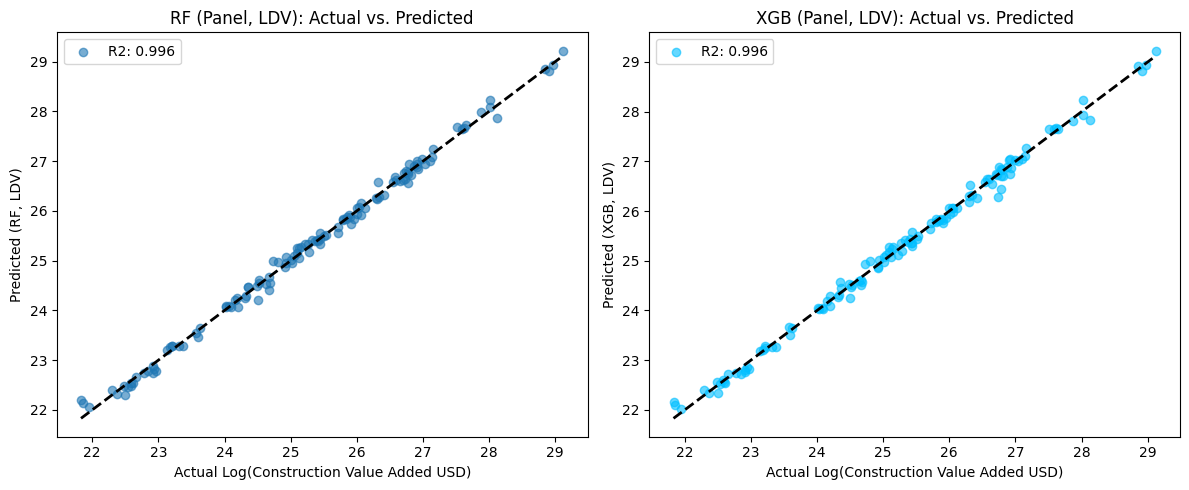

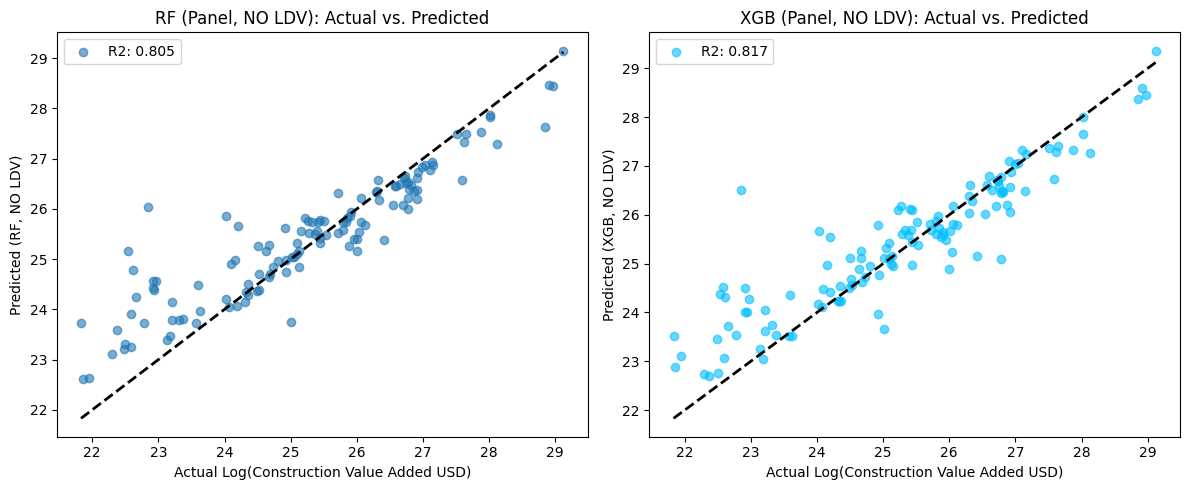


--- ML Feature Importances (Panel Data) ---
+-------------------------------------+------------------------+------------------------+------------------------+----------------------+
|               Feature               |  Random Forest (LDV)   | Random Forest (NO LDV) |     XGBoost (LDV)      |   XGBoost (NO LDV)   |
+-------------------------------------+------------------------+------------------------+------------------------+----------------------+
| Lagged Log(Constr. Value Added USD) |   0.9911847160739832   |          nan           |   0.9623282551765442   |         nan          |
|        Ctrl. Corruption (L1)        | 0.0022012882511524313  |  0.046437442777673914  |  0.00941014476120472   | 0.06308994442224503  |
|        GDP Growth (Annual %)        | 0.0009002522182834147  |  0.008167026132651576  | 0.0027413861826062202  | 0.009078238159418106 |
|         Political Stability         |  0.000704670449091005  |  0.21247889357184735   | 0.0009729546727612615  | 0.1916245222

In [ ]:
# CELL 2: Main Script (RUN AFTER RESTARTING RUNTIME POST-INSTALLATION)
# --------------------------------------------------------------------
# -*- coding: utf-8 -*-
"""
ESG Construction Cost Analysis - Incorporating Actionable Insights (NameError Corrected)
"""

# -------------------------------------
# 1. Load Libraries
# -------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from linearmodels.panel import PanelOLS, RandomEffects, PooledOLS
from linearmodels.panel.results import PanelEffectsResults, RandomEffectsResults
from statsmodels.regression.linear_model import RegressionResultsWrapper
import scipy.stats as stats
from tabulate import tabulate
from collections import OrderedDict

print("Libraries loaded section complete.")

# Panel Unit Root Test Imports
LevinLinChu, ImPesaranShin, Hadri, ADF, PhillipsPerron = None, None, None, None, None
PANEL_URT_AVAILABLE = False
PANEL_URT_PARTIALLY_AVAILABLE = False
urt_error_messages = []

try:
    from linearmodels.panel.meta.unitroot import LevinLinChu, ImPesaranShin, Hadri, ADF, PhillipsPerron
    print("Successfully imported all panel unit root tests from linearmodels.panel.meta.unitroot.")
    PANEL_URT_AVAILABLE = True; PANEL_URT_PARTIALLY_AVAILABLE = True
except (ModuleNotFoundError, ImportError) as e_meta:
    urt_error_messages.append(f"Import from .panel.meta.unitroot failed: {e_meta}")
    print(f"Warning: Could not import URTs from linearmodels.panel.meta.unitroot ({e_meta}). Trying other paths...")
    if not PANEL_URT_PARTIALLY_AVAILABLE:
        try:
            from linearmodels.panel.unitroot import LevinLinChu, ImPesaranShin, Hadri, ADF, PhillipsPerron
            print("Successfully imported all panel unit root tests from linearmodels.panel.unitroot.")
            PANEL_URT_AVAILABLE = True; PANEL_URT_PARTIALLY_AVAILABLE = True
        except (ModuleNotFoundError, ImportError) as e_unitroot_all:
            urt_error_messages.append(f"Import all from .panel.unitroot failed: {e_unitroot_all}")
            _imported_some_from_unitroot = False
            try: from linearmodels.panel.unitroot import LevinLinChu; _imported_some_from_unitroot = True; PANEL_URT_PARTIALLY_AVAILABLE = True; print("  LLC imported from .panel.unitroot")
            except ImportError: pass
            try: from linearmodels.panel.unitroot import ImPesaranShin; _imported_some_from_unitroot = True; PANEL_URT_PARTIALLY_AVAILABLE = True; print("  IPS imported from .panel.unitroot")
            except ImportError: pass
            try: from linearmodels.panel.unitroot import Hadri; _imported_some_from_unitroot = True; PANEL_URT_PARTIALLY_AVAILABLE = True; print("  Hadri imported from .panel.unitroot")
            except ImportError: pass
            try: from linearmodels.panel.unitroot import ADF; _imported_some_from_unitroot = True; PANEL_URT_PARTIALLY_AVAILABLE = True; print("  ADF imported from .panel.unitroot")
            except ImportError: pass
            try: from linearmodels.panel.unitroot import PhillipsPerron; _imported_some_from_unitroot = True; PANEL_URT_PARTIALLY_AVAILABLE = True; print("  PP imported from .panel.unitroot")
            except ImportError: pass
            if not _imported_some_from_unitroot: urt_error_messages.append(f"Individual imports from .panel.unitroot also failed.")
    if not PANEL_URT_PARTIALLY_AVAILABLE:
        print("Trying import from linearmodels.panel.stationary (older versions)...")
        _imported_some_from_stationary = False
        try: from linearmodels.panel.stationary import LevinLinChu; _imported_some_from_stationary = True; PANEL_URT_PARTIALLY_AVAILABLE = True; print("  LLC imported from .panel.stationary")
        except ImportError: pass
        try: from linearmodels.panel.stationary import ImPesaranShin; _imported_some_from_stationary = True; PANEL_URT_PARTIALLY_AVAILABLE = True; print("  IPS imported from .panel.stationary")
        except ImportError: pass
        try: from linearmodels.panel.stationary import Hadri; _imported_some_from_stationary = True; PANEL_URT_PARTIALLY_AVAILABLE = True; print("  Hadri imported from .panel.stationary")
        except ImportError: pass
        if not _imported_some_from_stationary: urt_error_messages.append(f"Import from .panel.stationary also failed.")

if not PANEL_URT_PARTIALLY_AVAILABLE:
    import linearmodels
    print(f"ERROR: Could not import critical panel unit root tests. linearmodels version: {linearmodels.__version__ if hasattr(linearmodels, '__version__') else 'unknown'}.")
    for msg in urt_error_messages: print(f"  - {msg}")
    print("Panel unit root tests will be skipped.")
elif not PANEL_URT_AVAILABLE: print("Warning: Not all panel unit root tests could be imported. Some tests may be skipped.")

DynamicPanelGMM = None
try:
    from pyeconometrics.panel.gmm import DynamicPanelGMM
    print("Successfully imported DynamicPanelGMM from pyeconometrics.")
except (ModuleNotFoundError, ImportError) as e_gmm:
    print(f"WARNING: pyeconometrics import failed: {e_gmm}. GMM models will be skipped.")

import linearmodels
print(f"Linearmodels version: {linearmodels.__version__}")

# --- Configuration Parameters ---
VIF_THRESHOLD_FOR_REMOVAL = 5
SIGNIFICANCE_LEVEL = 0.05
MICE_MAX_ITER = 150
MICE_N_NEAREST_FEATURES = None
RANDOM_STATE = 42
MISSING_DATA_THRESHOLD = 0.75

# --- File Paths & Helper Functions ---
try:
    import google.colab
    IN_COLAB = True
except ImportError:
    IN_COLAB = False

if IN_COLAB:
    esg_file = '/content/ESG_panel_processed_WorldBank.csv'
    wb_value_added_file = '/content/WorlBank_Construction_Value_Added.csv'
    calcforge_costs_file = '/content/CalcForge_Global_2022_housing_construction_average_costs_data.csv'
else:
    esg_file = 'ESG_panel_processed_WorldBank.csv'
    wb_value_added_file = 'WorlBank_Construction_Value_Added.csv'
    calcforge_costs_file = 'CalcForge_Global_2022_housing_construction_average_costs_data.csv'

def clean_country_name(name_input):
    if pd.isna(name_input): return None
    name_cleaned = str(name_input).strip().lower()
    name_map = {"united arab emirates": "uae", "united kingdom": "uk", "united states": "usa","korea, rep.": "south korea", "russian federation": "russia", "korea, dem. people's rep.": "north korea","egypt, arab rep.": "egypt", "iran, islamic rep.": "iran", "turkiye": "turkey","venezuela, rb": "venezuela", "syrian arab republic": "syria", "yemen, rep.": "yemen","congo, dem. rep.": "congo (dem. rep.)", "congo, rep.": "congo (rep.)", "lao pdr": "laos","slovak republic": "slovakia", "czechia":"czech republic", "st. kitts and nevis": "st kitts and nevis","st. lucia": "st lucia", "st. martin (french part)": "st martin (french part)","st. vincent and the grenadines": "st vincent and the grenadines", "viet nam": "vietnam","brunei darussalam": "brunei", "cabo verde": "cape verde", "cote d'ivoire": "ivory coast","eswatini": "eswatini", "micronesia, fed. sts.": "micronesia (fsm)","hong kong sar, china": "hong kong", "macao sar, china": "macau"}
    return name_map.get(name_cleaned, name_cleaned)

def create_results_table(model_results, model_name="Model", custom_var_names=None, suppress_dummies=True, dummy_prefixes=['entity_dummy_', 'time_dummy_']):
    if model_results is None: return f"Could not generate table for {model_name}: Model results are None."
    params = model_results.params; p_values = model_results.pvalues
    if hasattr(model_results, 'std_errors'): std_errs = model_results.std_errors
    elif hasattr(model_results, 'bse'): std_errs = model_results.bse
    else: std_errs = pd.Series([np.nan] * len(params), index=params.index); print(f"Warning: Std errors not found for {model_name}")
    results_df = pd.DataFrame({'Variable': params.index, 'Coefficient': params.values,
                               'Std. Error': std_errs.values if std_errs is not None else np.nan,
                               'P-value': p_values.values if p_values is not None else np.nan})
    if suppress_dummies:
        is_dummy = pd.Series(False, index=results_df['Variable'])
        for prefix in dummy_prefixes:
            is_dummy = is_dummy | results_df['Variable'].astype(str).str.startswith(prefix)
        results_df = results_df[~is_dummy]
    stars = []
    if 'P-value' in results_df.columns and results_df['P-value'] is not None:
        for p_val in results_df['P-value']:
            if pd.isna(p_val): stars.append('')
            elif p_val < 0.01: stars.append('***')
            elif p_val < 0.05: stars.append('**')
            elif p_val < 0.1: stars.append('*')
            else: stars.append('')
    else: stars = [''] * len(results_df)
    results_df['Sig.'] = stars
    results_df['Coefficient_Formatted'] = results_df.apply(lambda r: f"{r['Coefficient']:.4f}{r['Sig.']}" if pd.notna(r['Coefficient']) else "N/A", axis=1)
    if custom_var_names: results_df['Variable'] = results_df['Variable'].map(custom_var_names).fillna(results_df['Variable'])
    display_cols = ['Variable', 'Coefficient_Formatted', 'Std. Error', 'P-value']
    if 'P-value' in results_df.columns: results_df['P-value'] = pd.to_numeric(results_df['P-value'], errors='coerce')
    results_df_display = results_df[display_cols].copy(); results_df_display.rename(columns={'Coefficient_Formatted': 'Coefficient'}, inplace=True)
    summary_stats = OrderedDict()
    summary_stats["Model"] = model_name
    if hasattr(model_results, 'rsquared_overall'): summary_stats["R-sq (Overall)"] = f"{model_results.rsquared_overall:.4f}"
    if hasattr(model_results, 'rsquared_within'): summary_stats["R-sq (Within)"] = f"{model_results.rsquared_within:.4f}"
    if hasattr(model_results, 'rsquared_between'): summary_stats["R-sq (Between)"] = f"{model_results.rsquared_between:.4f}"
    if hasattr(model_results, 'rsquared') and not any(k in summary_stats for k in ["R-sq (Overall)", "R-sq (Within)"]): summary_stats["R-squared"] = f"{model_results.rsquared:.4f}"
    if hasattr(model_results, 'rsquared_adj') and isinstance(model_results, RegressionResultsWrapper): summary_stats["Adj. R-squared"] = f"{model_results.rsquared_adj:.4f}"
    if hasattr(model_results, 'nobs'): summary_stats["Observations"] = str(int(model_results.nobs))
    if isinstance(model_results, (PanelEffectsResults, RandomEffectsResults)):
        if hasattr(model_results, 'entity_info') and model_results.entity_info: summary_stats["Entities"] = str(model_results.entity_info.total)
        if hasattr(model_results, 'time_info') and model_results.time_info: summary_stats["Time Periods"] = str(model_results.time_info.total)
    f_stat_val, f_pval_val, f_type_display = None, None, "F-statistic (Overall/Robust)"
    f_stat_attr = getattr(model_results, 'f_statistic_robust', getattr(model_results, 'f_statistic', None))
    if f_stat_attr is None and isinstance(model_results, RandomEffectsResults): f_stat_attr = getattr(model_results, 'wald_test_joint', None); f_type_display = "Wald chi2(joint)"
    if hasattr(model_results, 'fvalue'): f_stat_val = model_results.fvalue; f_pval_val = model_results.f_pvalue; f_type_display="F-statistic (OLS)"
    elif f_stat_attr: f_stat_val, f_pval_val = getattr(f_stat_attr, 'stat', None), getattr(f_stat_attr, 'pval', None)
    if f_stat_val is not None and f_pval_val is not None: summary_stats[f_type_display] = f"{f_stat_val:.4f} (p={f_pval_val:.4f})"
    if hasattr(model_results, 'condition_number'): summary_stats["Cond. No."] = f"{model_results.condition_number:.2e}"
    footer_list = [f"{k}: {v}" for k,v in summary_stats.items()]
    footer_text = "\n" + "\n".join(footer_list) + "\nSignificance: *** p<0.01, ** p<0.05, * p<0.1"
    # Check if results_df['Variable'] contains any string that starts with dummy_prefixes before adding the suppress note
    if suppress_dummies and results_df['Variable'].astype(str).str.startswith(tuple(dummy_prefixes)).any():
        footer_text += "\n(Dummy variable coefficients suppressed for brevity)"
    return tabulate(results_df_display, headers='keys', tablefmt='pretty', floatfmt=(".4f", ".4f", ".4f", ".4f"), showindex=False) + footer_text

VARIABLE_NAME_MAP = {
    'const': 'Constant', 'log_construction_value_added': 'Log(Construction Value Added USD)',
    'LDV_log_construction_value_added': 'Lagged Log(Constr. Value Added USD)',
    'Total_Housing_Cost_Per_M2': 'Total Housing Cost ($/m^2)',
    'control_corruption_estimate': 'Control of Corruption', 'economic_and_social_rights_performance_score': 'Econ. & Social Rights Score',
    'renewable_energy_consumption_total_final_energy_consumption': 'Renewable Energy Cons. (%)', 'rule_law_estimate': 'Rule of Law',
    'voice_and_accountability_estimate': 'Voice & Accountability', 'gdp_growth_annual': 'GDP Growth (Annual %)',
    'political_stability_and_absence_violence_terrorism_estimate': 'Political Stability',
    'government_expenditure_on_education_total_government_expenditure': 'Gov. Edu. Expend. (% Gov. Exp.)',
    'research_and_development_expenditure_gdp': 'R&D Expend. (% GDP)', 'individuals_using_the_internet_population': 'Internet Users (% Pop.)',
    'gini_index': 'GINI Index', 'literacy_rate_adult_total_people_ages_15_and_above': 'Literacy Rate (Adult %)',
    'fossil_fuel_energy_consumption_total': 'Fossil Fuel Energy Cons. (% Total)',
    'energy_use_kg_oil_equivalent_per_capita': 'Energy Use (kg oil equiv. pc)',
    'population_density_people_per_sq_km_land_area': 'Population Density (per sq. km)',
    'income_share_held_by_lowest_20': 'Income Share (Lowest 20%)',
    'control_corruption_estimate_lag1': 'Ctrl. Corruption (L1)', 'economic_and_social_rights_performance_score_lag1': 'Econ. & Soc. Rights (L1)',
    'renewable_energy_consumption_total_final_energy_consumption_lag1': 'Renew. Energy (L1, %)', 'rule_law_estimate_lag1': 'Rule of Law (L1)',
    'voice_and_accountability_estimate_lag1': 'Voice & Acc. (L1)', 'political_stability_and_absence_violence_terrorism_estimate_lag1': 'Poli. Stability (L1)',
    'government_expenditure_on_education_total_government_expenditure_lag1': 'Gov. Edu. Exp. (L1)',
    'research_and_development_expenditure_gdp_lag1': 'R&D Exp. (L1, % GDP)', 'individuals_using_the_internet_population_lag1': 'Internet Users (L1, % Pop.)',
    'gini_index_lag1': 'GINI Index (L1)', 'literacy_rate_adult_total_people_ages_15_and_above_lag1': 'Literacy Rate (L1)',
    'fossil_fuel_energy_consumption_total_lag1': 'Fossil Fuel Cons. (L1)', 'energy_use_kg_oil_equivalent_per_capita_lag1': 'Energy Use (L1, kg oil pc)',
    'population_density_people_per_sq_km_land_area_lag1': 'Pop. Density (L1)', 'income_share_held_by_lowest_20_lag1': 'Income Share Low 20% (L1)',
    'WB_ValueAdded_2022': 'WB Construction Value Added (2022 USD)'}

# -------------------------------------
# 2. Load Data
# -------------------------------------
print("--- Starting Data Loading & Initial Preprocessing ---")
try:
    df_esg_raw = pd.read_csv(esg_file, sep=',')
    if 'Country' in df_esg_raw.columns: df_esg_raw['country'] = df_esg_raw['Country'].apply(clean_country_name); df_esg_raw.drop(columns=['Country'], inplace=True, errors='ignore')
    elif 'country' in df_esg_raw.columns: df_esg_raw['country'] = df_esg_raw['country'].apply(clean_country_name)
    print("ESG data loaded and countries cleaned.")

    df_wb_value_raw = pd.read_csv(wb_value_added_file, sep=',')
    if 'Country' in df_wb_value_raw.columns: df_wb_value_raw['country'] = df_wb_value_raw['Country'].apply(clean_country_name); df_wb_value_raw.drop(columns=['Country'], inplace=True, errors='ignore')
    elif 'country' in df_wb_value_raw.columns: df_wb_value_raw['country'] = df_wb_value_raw['country'].apply(clean_country_name)
    print("World Bank Construction Value Added data loaded and countries cleaned.")

    df_calcforge_raw = pd.read_csv(calcforge_costs_file, sep=',', header=1)
    df_calcforge_raw.columns = [col.strip() for col in df_calcforge_raw.columns]
    if 'Country' in df_calcforge_raw.columns: df_calcforge_raw['country'] = df_calcforge_raw['Country'].apply(clean_country_name); df_calcforge_raw.drop(columns=['Country'], inplace=True, errors='ignore')
    elif 'country' in df_calcforge_raw.columns: df_calcforge_raw['country'] = df_calcforge_raw['country'].apply(clean_country_name)
    print("CalcForge Housing Cost data loaded and countries cleaned.")
except FileNotFoundError as e: exit(f"Error loading files: {e}. Please ensure files are in the correct path or Colab environment.")
except Exception as e: exit(f"An unexpected error occurred during data loading: {e}")

# -------------------------------------
# 3. Panel Regression Analysis
# -------------------------------------
print("\n--- Starting Part 1: Panel Regression Analysis ---")
# 3.1 Prepare World Bank Data
print("\n3.1 Preparing World Bank Data (Panel DV)...")
INDICATOR_NAME_CONSTRUCTION_VALUE = 'Industry (including construction), value added (current US$)'
df_wb_value_filtered = df_wb_value_raw[df_wb_value_raw['Indicator Name'] == INDICATOR_NAME_CONSTRUCTION_VALUE].copy()
if df_wb_value_filtered.empty: exit(f"CRITICAL ERROR: No rows for indicator '{INDICATOR_NAME_CONSTRUCTION_VALUE}'.")
df_wb_value_long = pd.melt(df_wb_value_filtered, id_vars=['country', 'Indicator Name'], value_vars=[col for col in df_wb_value_filtered.columns if str(col).isdigit()], var_name='year', value_name='construction_value_added_usd')
df_wb_value_long['year'] = pd.to_numeric(df_wb_value_long['year'], errors='coerce').astype('Int64')
df_wb_value_long = df_wb_value_long[['country', 'year', 'construction_value_added_usd']].dropna()
df_wb_value_long['construction_value_added_usd'] = pd.to_numeric(df_wb_value_long['construction_value_added_usd'], errors='coerce')
df_wb_value_long.dropna(subset=['construction_value_added_usd'], inplace=True)
df_wb_value_long = df_wb_value_long[df_wb_value_long['construction_value_added_usd'] > 1e-9]
df_wb_value_long['log_construction_value_added'] = np.log(df_wb_value_long['construction_value_added_usd'])
dependent_var_panel = 'log_construction_value_added'
dv_col = dependent_var_panel # Define dv_col here for consistency if used later
print(f"Prepared WB Data. Shape: {df_wb_value_long.shape}, DV: {dependent_var_panel}")

# 3.2 Prepare ESG Data
print("\n3.2 Preparing ESG Data (Panel IVs)...")
df_esg_clean = df_esg_raw.copy()
if 'Year' in df_esg_clean.columns and 'year' not in df_esg_clean.columns: df_esg_clean.rename(columns={'Year': 'year'}, inplace=True)
df_esg_clean['year'] = pd.to_numeric(df_esg_clean['year'], errors='coerce').astype('Int64')
df_esg_clean.dropna(subset=['country', 'year'], inplace=True)
panel_initial_esg_features = [
    'control_corruption_estimate', 'economic_and_social_rights_performance_score',
    'renewable_energy_consumption_total_final_energy_consumption', 'rule_law_estimate',
    'voice_and_accountability_estimate', 'gdp_growth_annual',
    'political_stability_and_absence_violence_terrorism_estimate',
    'government_expenditure_on_education_total_government_expenditure',
    'research_and_development_expenditure_gdp', 'individuals_using_the_internet_population',
    'gini_index', 'literacy_rate_adult_total_people_ages_15_and_above',
    'fossil_fuel_energy_consumption_total', 'energy_use_kg_oil_equivalent_per_capita',
    'population_density_people_per_sq_km_land_area', 'income_share_held_by_lowest_20']
panel_chosen_esg_features = [col for col in panel_initial_esg_features if col in df_esg_clean.columns]
if not panel_chosen_esg_features: exit("Error: No panel ESG features selected or found.")
print(f"Initial Panel ESG features: {panel_chosen_esg_features}")
cols_where_zero_is_nan_panel = ['economic_and_social_rights_performance_score',
    'government_expenditure_on_education_total_government_expenditure',
    'research_and_development_expenditure_gdp', 'gini_index', 'income_share_held_by_lowest_20']
print("Converting specific 0s to NaNs for Panel ESG data...")
for col in cols_where_zero_is_nan_panel:
    if col in df_esg_clean.columns and col in panel_chosen_esg_features:
        original_nan_count = df_esg_clean[col].isnull().sum()
        df_esg_clean[col] = df_esg_clean[col].replace(0, np.nan)
        print(f"  For '{col}', 0s->NaN. NaN count: {original_nan_count} -> {df_esg_clean[col].isnull().sum()}")
for col in panel_chosen_esg_features: df_esg_clean[col] = pd.to_numeric(df_esg_clean[col], errors='coerce')
df_esg_subset_panel = df_esg_clean[['country', 'year'] + panel_chosen_esg_features].drop_duplicates(subset=['country', 'year'])

# 3.3 Merge Data & Create LDV
print("\n3.3 Merging data for panel analysis & creating LDV...")
panel_data = pd.merge(df_wb_value_long, df_esg_subset_panel, on=['country', 'year'], how='inner')
if panel_data.empty: exit("Error: Merged panel DataFrame is empty before LDV.")
panel_data.sort_values(by=['country', 'year'], inplace=True)
panel_data['LDV_log_construction_value_added'] = panel_data.groupby('country')[dependent_var_panel].shift(1)
panel_data.dropna(subset=[dependent_var_panel], inplace=True)
print(f"Merged panel DataFrame shape (with LDV): {panel_data.shape}")

# 3.4 Create Lagged IVs
print("\n3.4 Creating Lagged Independent Variables...")
panel_features_to_lag = [f for f in panel_chosen_esg_features if f != 'gdp_growth_annual']
panel_df_for_mice = panel_data.copy()
for col in panel_features_to_lag:
    if col in panel_df_for_mice.columns: panel_df_for_mice[f'{col}_lag1'] = panel_df_for_mice.groupby('country')[col].shift(1)

panel_ivs_for_mice_initial = panel_chosen_esg_features[:]
if 'LDV_log_construction_value_added' in panel_df_for_mice.columns: panel_ivs_for_mice_initial.append('LDV_log_construction_value_added')
for col in panel_features_to_lag:
    if f'{col}_lag1' in panel_df_for_mice.columns: panel_ivs_for_mice_initial.append(f'{col}_lag1')
panel_ivs_for_mice_initial = list(set([col for col in panel_ivs_for_mice_initial if col in panel_df_for_mice.columns]))

# ACTION: Exclude variables with high missingness before MICE
print(f"\n--- Pre-MICE: Checking for high missingness (Threshold: {MISSING_DATA_THRESHOLD*100:.0f}%) ---")
panel_ivs_for_mice = []
total_potential_rows = len(panel_df_for_mice)
for var in panel_ivs_for_mice_initial:
    missing_pct = panel_df_for_mice[var].isnull().sum() / total_potential_rows
    if missing_pct < MISSING_DATA_THRESHOLD:
        panel_ivs_for_mice.append(var)
    else:
        print(f"  Excluding '{VARIABLE_NAME_MAP.get(var, var)}' due to high missingness: {missing_pct*100:.1f}%")
if len(panel_ivs_for_mice) < len(panel_ivs_for_mice_initial):
    print(f"Reduced IV set for MICE from {len(panel_ivs_for_mice_initial)} to {len(panel_ivs_for_mice)} variables.")
else:
    print("No variables excluded due to high missingness.")


# 3.5 MICE Imputation
print("\n3.5 MICE Imputation for panel IVs (incl. LDV & lags)...")
panel_df_final_imputed = panel_df_for_mice.copy()
data_to_impute_panel_ivs = panel_df_final_imputed[[dependent_var_panel] + panel_ivs_for_mice].copy()
cols_for_imputation_actual = panel_ivs_for_mice[:]
if not data_to_impute_panel_ivs[cols_for_imputation_actual].empty and data_to_impute_panel_ivs[cols_for_imputation_actual].isnull().sum().sum() > 0:
    print(f"NaNs in panel IVs (and LDV) for MICE: \n{data_to_impute_panel_ivs[cols_for_imputation_actual].isnull().sum()[data_to_impute_panel_ivs[cols_for_imputation_actual].isnull().sum() > 0].sort_values(ascending=False)}")
    imputer_panel_ivs = IterativeImputer(estimator=BayesianRidge(), max_iter=MICE_MAX_ITER, random_state=RANDOM_STATE, tol=1e-3, n_nearest_features=MICE_N_NEAREST_FEATURES)
    imputed_array_panel_ivs = imputer_panel_ivs.fit_transform(data_to_impute_panel_ivs)
    imputed_df_temp = pd.DataFrame(imputed_array_panel_ivs, columns=data_to_impute_panel_ivs.columns, index=data_to_impute_panel_ivs.index)
    for col_name in cols_for_imputation_actual:
        if col_name in panel_df_final_imputed.columns and col_name in imputed_df_temp.columns:
            panel_df_final_imputed[col_name] = imputed_df_temp[col_name]
    print("MICE imputation complete for panel IVs.")
else: print("No NaNs found in panel IVs for MICE or data empty.")
panel_df_final_imputed.dropna(subset=[dependent_var_panel] + panel_ivs_for_mice, inplace=True)
print(f"Panel data for regression shape after MICE and all NaN drop: {panel_df_final_imputed.shape}")
if panel_df_final_imputed.shape[0] < 20 : exit("Too few observations after MICE/lag NaN drop for panel.")


# 3.5.1 Panel Unit Root Tests & Potential Differencing
print("\n--- 3.5.1 Panel Unit Root Tests (using imputed data before VIF) ---")
unit_root_test_results_summary = {}
urt_conclusions = {}

# Initialize dv_panel_for_regression and panel_df_for_regression
dv_panel_for_regression = dependent_var_panel
panel_df_for_regression = panel_df_final_imputed.copy() # Start with current imputed data
# final_panel_ivs_selected will be populated after VIF, so use panel_ivs_for_mice for now if needed before VIF
ivs_for_panel_models_pre_vif = panel_ivs_for_mice[:]


if not PANEL_URT_PARTIALLY_AVAILABLE:
    print("Skipping Panel Unit Root Tests as required libraries/modules were not available or correctly imported.")
else:
    panel_df_urt = panel_df_final_imputed.set_index(['country', 'year']).sort_index()
    vars_for_urt = [dependent_var_panel] + panel_ivs_for_mice
    vars_for_urt = list(set([v for v in vars_for_urt if v in panel_df_urt.columns]))
    print(f"Variables to be tested for unit roots: {vars_for_urt}")

    for var_name_urt in vars_for_urt:
        if var_name_urt not in panel_df_urt.columns: continue
        pretty_var_name = VARIABLE_NAME_MAP.get(var_name_urt, var_name_urt)
        print(f"\nTesting variable: {pretty_var_name} ({var_name_urt})")
        series_to_test_urt = panel_df_urt[var_name_urt].dropna().astype(float)
        if series_to_test_urt.empty or not isinstance(series_to_test_urt.index, pd.MultiIndex) or \
           series_to_test_urt.groupby(level=0).count().min() < 3 or series_to_test_urt.nunique() <= 1:
            status_detail = "Empty" if series_to_test_urt.empty else "Not MultiIndex" if not isinstance(series_to_test_urt.index, pd.MultiIndex) else "Short Panel" if series_to_test_urt.groupby(level=0).count().min() < 3 else "Constant"
            print(f"  Skipping {pretty_var_name} due to data issues: {status_detail}.")
            unit_root_test_results_summary[var_name_urt] = {"status": status_detail}; urt_conclusions[var_name_urt] = status_detail
            continue
        current_var_results = {}; p_values_for_decision = []
        if LevinLinChu:
            try: llc_res = LevinLinChu(series_to_test_urt, trend='c'); current_var_results["LLC"] = {'stat': llc_res.statistic, 'pval': llc_res.pvalue}; print(f"  LLC: Stat={llc_res.statistic:.3f}, Pval={llc_res.pvalue:.3f}, Null: {llc_res.null_hypothesis}"); p_values_for_decision.append(llc_res.pvalue < SIGNIFICANCE_LEVEL)
            except Exception as e: current_var_results["LLC"] = {'error': str(e)}; print(f"  LLC Error: {e}")
        if ImPesaranShin:
            try: ips_res = ImPesaranShin(series_to_test_urt, trend='c'); current_var_results["IPS"] = {'stat': ips_res.statistic, 'pval': ips_res.pvalue}; print(f"  IPS: Stat={ips_res.statistic:.3f}, Pval={ips_res.pvalue:.3f}, Null: {ips_res.null_hypothesis}"); p_values_for_decision.append(ips_res.pvalue < SIGNIFICANCE_LEVEL)
            except Exception as e: current_var_results["IPS"] = {'error': str(e)}; print(f"  IPS Error: {e}")
        if Hadri:
            try: hadri_res = Hadri(series_to_test_urt, trend='c'); current_var_results["Hadri"] = {'stat': hadri_res.statistic, 'pval': hadri_res.pvalue}; print(f"  Hadri: Stat={hadri_res.statistic:.3f}, Pval={hadri_res.pvalue:.3f}, Null: {hadri_res.null_hypothesis}"); p_values_for_decision.append(hadri_res.pvalue >= SIGNIFICANCE_LEVEL)
            except Exception as e: current_var_results["Hadri"] = {'error': str(e)}; print(f"  Hadri Error: {e}")
        if ADF:
            try: adf_f_res = ADF(series_to_test_urt, trend='c'); current_var_results["Fisher-ADF"] = {'stat': adf_f_res.statistic, 'pval': adf_f_res.pvalue}; print(f"  Fisher-ADF: Stat={adf_f_res.statistic:.3f}, Pval={adf_f_res.pvalue:.3f}, Null: {adf_f_res.null_hypothesis}"); p_values_for_decision.append(adf_f_res.pvalue < SIGNIFICANCE_LEVEL)
            except Exception as e: current_var_results["Fisher-ADF"] = {'error': str(e)}; print(f"  Fisher-ADF Error: {e}")
        if PhillipsPerron:
            try: pp_f_res = PhillipsPerron(series_to_test_urt, trend='c'); current_var_results["Fisher-PP"] = {'stat': pp_f_res.statistic, 'pval': pp_f_res.pvalue}; print(f"  Fisher-PP: Stat={pp_f_res.statistic:.3f}, Pval={pp_f_res.pvalue:.3f}, Null: {pp_f_res.null_hypothesis}"); p_values_for_decision.append(pp_f_res.pvalue < SIGNIFICANCE_LEVEL)
            except Exception as e: current_var_results["Fisher-PP"] = {'error': str(e)}; print(f"  Fisher-PP Error: {e}")
        unit_root_test_results_summary[var_name_urt] = current_var_results
        if p_values_for_decision:
            if all(p_values_for_decision): urt_conclusions[var_name_urt] = "Stationary"
            elif not any(p_values_for_decision): urt_conclusions[var_name_urt] = "Unit Root"
            else: urt_conclusions[var_name_urt] = "Mixed/Unclear"
        else: urt_conclusions[var_name_urt] = "Tests Failed"

    print("\n--- Summary of Panel Unit Root Test P-values ---")
    summary_table_urt = []
    for var, tests in unit_root_test_results_summary.items():
        row = {'Variable': VARIABLE_NAME_MAP.get(var, var)}
        if 'status' in tests: row['Status'] = tests['status']; [row.update({tc: tests['status']}) for tc in ['LLC', 'IPS', 'Hadri', 'Fisher-ADF', 'Fisher-PP']]
        else:
            for test_name_key in ['LLC', 'IPS', 'Hadri', 'Fisher-ADF', 'Fisher-PP']:
                if test_name_key in tests:
                    if 'pval' in tests[test_name_key]: pval = tests[test_name_key]['pval']; stars = '***' if pval < 0.01 else '**' if pval < 0.05 else '*' if pval < 0.1 else ''; row[test_name_key] = f"{pval:.3f}{stars}"
                    elif 'error' in tests[test_name_key]: row[test_name_key] = "Error"
                    elif 'status' in tests[test_name_key]: row[test_name_key] = tests[test_name_key]['status']
                else: row[test_name_key] = "N/Avail"
        summary_table_urt.append(row)
    if summary_table_urt:
        summary_df_urt = pd.DataFrame(summary_table_urt)
        all_test_cols = ['LLC', 'IPS', 'Hadri', 'Fisher-ADF', 'Fisher-PP']
        for tc in all_test_cols:
            if tc not in summary_df_urt.columns: summary_df_urt[tc] = "N/Avail"
        if 'Status' not in summary_df_urt.columns : summary_df_urt.insert(1, 'Status', '')
        print(tabulate(summary_df_urt[['Variable', 'Status'] + all_test_cols], headers='keys', tablefmt='pretty', showindex=False))
        print("Significance: *** p<0.01, ** p<0.05, * p<0.1. For Hadri, low p-val indicates unit root. N/Avail means test module not imported.")
    else: print("No unit root test results to summarize.")

    print("\n--- Guidance for Differencing based on URT results ---")
    # The panel_df_for_regression and dv_panel_for_regression are already initialized.
    # ivs_for_panel_models also initialized with pre-VIF list. VIF runs next.
    # If differencing is implemented, these variables need to be updated within this block.
    differenced_vars_applied = [] # Track which variables were actually differenced
    for var_name, conclusion in urt_conclusions.items():
        if conclusion == "Unit Root":
            # This is where you would implement differencing.
            # For now, just printing a message.
            print(f"  ACTION NEEDED: Variable '{VARIABLE_NAME_MAP.get(var_name,var_name)}' appears to have a unit root. Consider differencing.")
            # Example of how you would do it (needs to be uncommented and adapted):
            # if var_name == dv_panel_for_regression: # If it's the current DV
            #     new_dv_name = var_name + '_d1'
            #     panel_df_for_regression[new_dv_name] = panel_df_for_regression.groupby('country')[var_name].diff()
            #     dv_panel_for_regression = new_dv_name # Update the DV name
            #     differenced_vars_applied.append(new_dv_name)
            # elif var_name in ivs_for_panel_models_pre_vif: # If it's one of the IVs
            #     new_iv_name = var_name + '_d1'
            #     panel_df_for_regression[new_iv_name] = panel_df_for_regression.groupby('country')[var_name].diff()
            #     # Update the list of IVs for panel models
            #     ivs_for_panel_models_pre_vif = [v if v != var_name else new_iv_name for v in ivs_for_panel_models_pre_vif]
            #     differenced_vars_applied.append(new_iv_name)

    if differenced_vars_applied:
        print(f"\n  Variables potentially differenced: {differenced_vars_applied}. Dropping NaNs created by differencing.")
        panel_df_for_regression.dropna(subset=differenced_vars_applied, inplace=True) # Drop NaNs from differenced columns
        print(f"  Shape after potential differencing and NaN drop: {panel_df_for_regression.shape}")
        print(f"  DV for regression now: {dv_panel_for_regression}")
        print(f"  IVs for MICE/VIF (potentially updated): {ivs_for_panel_models_pre_vif}")
        # IMPORTANT: If differencing is applied, final_panel_ivs_selected (after VIF) will use these new names.
        # The MICE step above used panel_ivs_for_mice (levels). If differencing is done *after* MICE
        # on imputed levels data, that's one approach. If differencing is done *before* MICE,
        # then MICE would run on (some) differenced data. The current structure implies differencing post-MICE.
    else:
        print("  No variables automatically differenced by the script. Proceeding with levels data.")

# VIF section needs to use the correct set of IVs (potentially updated if differencing was implemented)
# For now, it uses panel_ivs_for_mice (from before URTs and potential differencing)
# which is generally okay if differencing is a manual step after URT review.
# If differencing *was* applied above to ivs_for_panel_models_pre_vif,
# then X_vif_panel_check should use that list and panel_df_for_regression.

# 3.6 Iterative VIF
print("\n3.6 Iterative VIF check for panel IVs (incl. LDV & lags)...")
# Use panel_ivs_for_mice (pre-differencing list) and panel_df_final_imputed (pre-differencing data) for VIF
# If differencing was implemented and ivs_for_panel_models_pre_vif was updated, use that and panel_df_for_regression
X_vif_panel_check_data = panel_df_for_regression[ivs_for_panel_models_pre_vif].copy() # Use the (potentially) differenced data and IV list
X_vif_panel_check = X_vif_panel_check_data.loc[:, X_vif_panel_check_data.apply(pd.Series.nunique) > 1]
final_panel_ivs_selected = [] # This will be populated by VIF

if not X_vif_panel_check.empty:
    final_panel_ivs_selected = X_vif_panel_check.columns.tolist()
    max_vif_iters = len(final_panel_ivs_selected) + 5
    for i in range(max_vif_iters):
        if not final_panel_ivs_selected or len(final_panel_ivs_selected) <= 1: break
        X_iter_vif = X_vif_panel_check_data[final_panel_ivs_selected].copy().dropna() # Use the correct dataframe
        if X_iter_vif.empty or X_iter_vif.shape[0] < max(2, len(final_panel_ivs_selected) + 1) or X_iter_vif.shape[1] == 0 : break
        try:
            X_iter_vif_float = X_iter_vif.astype(float); X_iter_vif_const = sm.add_constant(X_iter_vif_float, prepend=True, has_constant='raise')
            vif_values = [variance_inflation_factor(X_iter_vif_const.values, j + 1) for j in range(X_iter_vif_float.shape[1])]
            vif_series = pd.Series(vif_values, index=X_iter_vif_float.columns, dtype=float)
            max_vif_val = vif_series.max()
            if max_vif_val > VIF_THRESHOLD_FOR_REMOVAL: remove_feature = vif_series.idxmax(); print(f"  Iterative VIF (Panel) {i+1}: Removing '{VARIABLE_NAME_MAP.get(remove_feature, remove_feature)}' (VIF: {max_vif_val:.2f})"); final_panel_ivs_selected.remove(remove_feature)
            else: print(f"All remaining panel IVs ({len(final_panel_ivs_selected)}) have VIF <= {VIF_THRESHOLD_FOR_REMOVAL} (Max VIF: {max_vif_val:.2f})."); break
        except Exception as e_vif_iter: print(f"Error in VIF iteration {i+1}: {e_vif_iter}"); break
else: print("Warning: X_vif_panel_check is empty. No IVs to perform VIF on.")
if not final_panel_ivs_selected: print("Warning: No panel IVs left after VIF pruning.")
else: print(f"Final Panel IVs after VIF ({len(final_panel_ivs_selected)}): {[VARIABLE_NAME_MAP.get(v,v) for v in final_panel_ivs_selected]}")


# 3.7 Standard Panel Regression Modeling
print("\n3.7 Standard Panel Regression Modeling ...")
panel_regression_tables_std = {}
results_objects_std = {}
final_selected_panel_model_results_std = None
preferred_model_type_name_std = "Undetermined"
linearmodels_panel_models_worked = False

# Use dv_panel_for_regression and panel_df_for_regression (which reflects any differencing)
# and final_panel_ivs_selected (which is based on VIF of potentially differenced IVs)
if dv_panel_for_regression and final_panel_ivs_selected and not panel_df_for_regression.empty:
    panel_data_std_indexed = panel_df_for_regression.set_index(['country', 'year']).sort_index()

    y_panel_std_base = panel_data_std_indexed[dv_panel_for_regression]
    # Correct LDV name if DV was differenced
    ldv_name_to_exclude = 'LDV_log_construction_value_added_d1' if dv_panel_for_regression.endswith("_d1") and 'LDV_log_construction_value_added_d1' in final_panel_ivs_selected else 'LDV_log_construction_value_added'

    ivs_for_std_models_base = [v for v in final_panel_ivs_selected if v != ldv_name_to_exclude]

    if not ivs_for_std_models_base: print("No suitable IVs for standard panel models.")
    else:
        X_panel_df_std_base = panel_data_std_indexed[ivs_for_std_models_base].copy()
        X_panel_df_std_base = X_panel_df_std_base.loc[:, X_panel_df_std_base.apply(pd.Series.nunique) > 1]
        actual_ivs_for_fitting_std = X_panel_df_std_base.columns.tolist()

        if X_panel_df_std_base.empty or not actual_ivs_for_fitting_std: print("Error: No valid IVs for standard panel model.")
        elif y_panel_std_base.shape[0] <= len(actual_ivs_for_fitting_std) + 1: print(f"Error: Not enough observations.")
        else:
            y_panel_std_clean = pd.to_numeric(y_panel_std_base, errors='coerce').astype(np.float64)
            X_panel_df_std_clean = X_panel_df_std_base[actual_ivs_for_fitting_std].copy()
            for col in X_panel_df_std_clean.columns: X_panel_df_std_clean[col] = pd.to_numeric(X_panel_df_std_clean[col], errors='coerce').astype(np.float64)
            y_panel_std_clean.replace([np.inf, -np.inf], np.nan, inplace=True); X_panel_df_std_clean.replace([np.inf, -np.inf], np.nan, inplace=True)
            aligned_df_std = pd.concat([y_panel_std_clean.rename('__DV__'), X_panel_df_std_clean], axis=1).dropna()

            if aligned_df_std.empty or aligned_df_std.shape[0] <= X_panel_df_std_clean.shape[1]: print(f"Error: Data insufficient after cleaning.")
            else:
                y_panel_std_aligned = aligned_df_std['__DV__']
                X_panel_df_std_aligned_no_const = aligned_df_std.drop(columns=['__DV__'])
                X_panel_with_const_std_lm = sm.add_constant(X_panel_df_std_aligned_no_const.astype(np.float64), prepend=True)

                if PANEL_URT_AVAILABLE: # If linearmodels URTs imported, assume linearmodels works
                    print("\nAttempting panel models with `linearmodels` (since URTs were imported)...")
                    # ... (linearmodels fitting attempt as before) ...
                    lm_models_to_fit = OrderedDict()
                    lm_models_to_fit["Pooled OLS (linearmodels)"] = PooledOLS(y_panel_std_aligned, X_panel_with_const_std_lm)
                    lm_models_to_fit["Entity FE (linearmodels)"] = PanelOLS(y_panel_std_aligned, X_panel_with_const_std_lm, entity_effects=True, drop_absorbed=True)
                    lm_models_to_fit["Two-Way FE (linearmodels)"] = PanelOLS(y_panel_std_aligned, X_panel_with_const_std_lm, entity_effects=True, time_effects=True, drop_absorbed=True)
                    lm_models_to_fit["Random Effects (linearmodels)"] = RandomEffects(y_panel_std_aligned, X_panel_with_const_std_lm)
                    temp_linearmodels_worked_count = 0
                    for name, model_instance in lm_models_to_fit.items():
                        print(f"\nFitting {name}...")
                        try:
                            if "Two-Way FE" in name: results_objects_std[name] = model_instance.fit(cov_type='clustered', cluster_entity=True, cluster_time=True)
                            else: results_objects_std[name] = model_instance.fit(cov_type='clustered', cluster_entity=True)
                            panel_regression_tables_std[name] = create_results_table(results_objects_std[name], name, custom_var_names=VARIABLE_NAME_MAP, suppress_dummies=False)
                            if "FE" in name or "Random Effects" in name : temp_linearmodels_worked_count +=1
                        except Exception as e_fit_lm: print(f"ERROR fitting {name} with linearmodels: {e_fit_lm}"); results_objects_std[name] = None; panel_regression_tables_std[name] = f"Fitting Failed: {e_fit_lm}"
                    if results_objects_std.get("Entity FE (linearmodels)") and results_objects_std.get("Random Effects (linearmodels)"): linearmodels_panel_models_worked = True; print("`linearmodels` FE and RE models ran.")
                    else: print("`linearmodels` FE and/or RE models failed. Will attempt LSDV fallback.")

                if not linearmodels_panel_models_worked:
                    print("\nUsing LSDV with `statsmodels` as fallback for FE models.")
                    # ... (LSDV fitting logic as before) ...
                    if "Pooled OLS (linearmodels)" not in results_objects_std or results_objects_std.get("Pooled OLS (linearmodels)") is None: # Ensure Pooled OLS ran
                        model_name_pooled_sm = "Pooled OLS (statsmodels)"
                        print(f"\nFitting {model_name_pooled_sm}...")
                        try:
                            pooled_ols_model_sm = sm.OLS(y_panel_std_aligned.astype(np.float64), X_panel_with_const_std_lm.astype(np.float64))
                            results_objects_std[model_name_pooled_sm] = pooled_ols_model_sm.fit(cov_type='cluster', cov_kwds={'groups': y_panel_std_aligned.index.get_level_values('country')})
                            panel_regression_tables_std[model_name_pooled_sm] = create_results_table(results_objects_std[model_name_pooled_sm], model_name_pooled_sm, custom_var_names=VARIABLE_NAME_MAP, suppress_dummies=False)
                        except Exception as e_pooled_sm: print(f"ERROR fitting {model_name_pooled_sm}: {e_pooled_sm}"); results_objects_std[model_name_pooled_sm] = None; panel_regression_tables_std[model_name_pooled_sm] = f"Fitting Failed: {e_pooled_sm}"
                    model_name_lsdv_entity = "Entity FE (LSDV statsmodels)"
                    print(f"\nFitting {model_name_lsdv_entity}...")
                    try:
                        entity_dummies = pd.get_dummies(X_panel_df_std_aligned_no_const.index.get_level_values('country'), prefix='entity_dummy', drop_first=True).astype(np.float64); entity_dummies.index = X_panel_df_std_aligned_no_const.index
                        X_lsdv_entity = pd.concat([X_panel_df_std_aligned_no_const, entity_dummies], axis=1); X_lsdv_entity_const = sm.add_constant(X_lsdv_entity.astype(np.float64), prepend=True)
                        lsdv_entity_model = sm.OLS(y_panel_std_aligned.astype(np.float64), X_lsdv_entity_const)
                        results_objects_std[model_name_lsdv_entity] = lsdv_entity_model.fit(cov_type='cluster', cov_kwds={'groups': X_panel_df_std_aligned_no_const.index.get_level_values('country')})
                        panel_regression_tables_std[model_name_lsdv_entity] = create_results_table(results_objects_std[model_name_lsdv_entity], model_name_lsdv_entity, custom_var_names=VARIABLE_NAME_MAP)
                    except Exception as e_lsdv_entity: print(f"ERROR fitting {model_name_lsdv_entity}: {e_lsdv_entity}"); results_objects_std[model_name_lsdv_entity] = None; panel_regression_tables_std[model_name_lsdv_entity] = f"Fitting Failed: {e_lsdv_entity}"
                    model_name_lsdv_twoway = "Two-Way FE (LSDV statsmodels)"
                    print(f"\nFitting {model_name_lsdv_twoway}...")
                    try:
                        time_dummies = pd.get_dummies(X_panel_df_std_aligned_no_const.index.get_level_values('year'), prefix='time_dummy', drop_first=True).astype(np.float64); time_dummies.index = X_panel_df_std_aligned_no_const.index
                        X_lsdv_twoway = pd.concat([X_panel_df_std_aligned_no_const, entity_dummies, time_dummies], axis=1); X_lsdv_twoway_const = sm.add_constant(X_lsdv_twoway.astype(np.float64), prepend=True)
                        lsdv_twoway_model = sm.OLS(y_panel_std_aligned.astype(np.float64), X_lsdv_twoway_const)
                        results_objects_std[model_name_lsdv_twoway] = lsdv_twoway_model.fit(cov_type='HC3'); print("  Note: Two-Way FE (LSDV) using HC3 robust SEs.")
                        panel_regression_tables_std[model_name_lsdv_twoway] = create_results_table(results_objects_std[model_name_lsdv_twoway], model_name_lsdv_twoway, custom_var_names=VARIABLE_NAME_MAP)
                    except Exception as e_lsdv_twoway: print(f"ERROR fitting {model_name_lsdv_twoway}: {e_lsdv_twoway}"); results_objects_std[model_name_lsdv_twoway] = None; panel_regression_tables_std[model_name_lsdv_twoway] = f"Fitting Failed: {e_lsdv_twoway}"

                print("\n--- All Standard Panel Model Summaries (Formatted Tables) ---")
                for name_tbl_loop, table_str_loop in panel_regression_tables_std.items(): print(f"\n--- {name_tbl_loop} Summary ---\n{table_str_loop}")
                # ... (Model selection logic as before)
                pooled_ols_key = next((k for k in results_objects_std if "Pooled OLS" in k and results_objects_std[k]), None)
                entity_fe_key = next((k for k in results_objects_std if "Entity FE" in k and results_objects_std[k]), None)
                twoway_fe_key = next((k for k in results_objects_std if "Two-Way FE" in k and results_objects_std[k]), None)
                re_key = next((k for k in results_objects_std if "Random Effects" in k and results_objects_std[k]), None)
                results_pooled_ols = results_objects_std.get(pooled_ols_key) if pooled_ols_key else None
                results_entity_fe = results_objects_std.get(entity_fe_key) if entity_fe_key else None
                results_twoway_fe = results_objects_std.get(twoway_fe_key) if twoway_fe_key else None
                results_re = results_objects_std.get(re_key) if re_key else None
                if results_pooled_ols and results_entity_fe :
                    print("\n--- Model Selection Tests (Standard Models) ---"); poolability_rejected_std = False
                    try: # F-test Poolability
                        if isinstance(results_entity_fe, PanelEffectsResults): f_pooled_pval_std = results_entity_fe.f_pooled.pval if hasattr(results_entity_fe, 'f_pooled') and results_entity_fe.f_pooled else 1.0; poolability_rejected_std = f_pooled_pval_std < SIGNIFICANCE_LEVEL; print(f"F-test Poolability (linearmodels): p={f_pooled_pval_std:.4f}. Rejected? {'Yes' if poolability_rejected_std else 'No'}")
                        elif isinstance(results_entity_fe, RegressionResultsWrapper):
                            ssr_pooled = results_pooled_ols.ssr if hasattr(results_pooled_ols, 'ssr') else results_pooled_ols.resid_ss; ssr_fe_entity = results_entity_fe.ssr; nobs = results_entity_fe.nobs
                            k_pooled = results_pooled_ols.df_model + 1; k_fe_entity = results_entity_fe.df_model + 1; df_resid_fe_entity = results_entity_fe.df_resid
                            num_entity_restrictions = k_fe_entity - k_pooled
                            if num_entity_restrictions > 0 and ssr_pooled >= ssr_fe_entity and df_resid_fe_entity > 0: f_stat_pool = ((ssr_pooled - ssr_fe_entity) / num_entity_restrictions) / (ssr_fe_entity / df_resid_fe_entity); p_val_pool = 1 - stats.f.cdf(f_stat_pool, num_entity_restrictions, df_resid_fe_entity); poolability_rejected_std = p_val_pool < SIGNIFICANCE_LEVEL; print(f"F-test Poolability (LSDV): F={f_stat_pool:.4f}, p={p_val_pool:.4f}. Rejected? {'Yes' if poolability_rejected_std else 'No'}")
                            else: print("Could not perform F-test poolability (LSDV)."); poolability_rejected_std = True
                    except Exception as e: print(f"Error F-test poolability: {e}"); poolability_rejected_std = True
                    time_effects_significant_std = False
                    if results_entity_fe and results_twoway_fe: # F-test Time Effects
                        try:
                            ssr_entity = results_entity_fe.ssr if hasattr(results_entity_fe, 'ssr') else results_entity_fe.resid_ss; ssr_twoway = results_twoway_fe.ssr if hasattr(results_twoway_fe, 'ssr') else results_twoway_fe.resid_ss
                            df_resid_entity = results_entity_fe.df_resid; df_resid_twoway = results_twoway_fe.df_resid
                            num_time_restrictions = (results_twoway_fe.df_model +1) - (results_entity_fe.df_model+1)
                            if num_time_restrictions > 0 and ssr_entity >= ssr_twoway and df_resid_twoway > 0: f_stat_time = ((ssr_entity - ssr_twoway) / num_time_restrictions) / (ssr_twoway / df_resid_twoway); p_val_time = 1 - stats.f.cdf(f_stat_time, num_time_restrictions, df_resid_twoway); print(f"F-test Time Effects: F={f_stat_time:.4f}, p={p_val_time:.4f}"); time_effects_significant_std = p_val_time < SIGNIFICANCE_LEVEL
                            else: print(f"Could not perform F-test time effects.")
                        except Exception as e: print(f"Error F-test time effects: {e}")
                    hausman_p_value_std = None
                    if linearmodels_panel_models_worked and results_re and (results_entity_fe or results_twoway_fe): # Hausman Test
                        preferred_fe_haus_std = results_twoway_fe if time_effects_significant_std and results_twoway_fe else results_entity_fe
                        fe_name_haus_std = twoway_fe_key if time_effects_significant_std and results_twoway_fe else entity_fe_key
                        print(f"\nHausman Test (linearmodels RE vs {fe_name_haus_std})..."); # ... (Hausman logic)
                        if preferred_fe_haus_std:
                            try:
                                b_fe_std = preferred_fe_haus_std.params.drop("const", errors='ignore'); b_re_std = results_re.params.drop("const", errors='ignore'); common_vars_std = b_fe_std.index.intersection(b_re_std.index)
                                if not common_vars_std.empty:
                                    b_fe_c_std, b_re_c_std = b_fe_std[common_vars_std], b_re_std[common_vars_std]; cov_fe_c_std, cov_re_c_std = preferred_fe_haus_std.cov.loc[common_vars_std, common_vars_std], results_re.cov.loc[common_vars_std, common_vars_std]
                                    diff_b_std, diff_V_std = b_fe_c_std - b_re_c_std, cov_fe_c_std - cov_re_c_std
                                    try: np.linalg.cholesky(diff_V_std); diff_V_is_psd = True
                                    except np.linalg.LinAlgError: diff_V_is_psd = False; print("  Hausman Warning: Cov_FE - Cov_RE not PSD.")
                                    if diff_V_is_psd: w_std = diff_b_std.T @ np.linalg.pinv(diff_V_std) @ diff_b_std; hausman_p_value_std = 1 - stats.chi2.cdf(w_std, df=len(diff_b_std)); print(f"Hausman Test: Chi2={w_std:.4f}, Pval={hausman_p_value_std:.4f}, DF={len(diff_b_std)}")
                                    else: print(f"  Hausman Test could not be computed: Cov diff matrix not PSD.")
                                else: print("Hausman Test failed: No common non-constant parameters.")
                            except Exception as e_hausman_std: print(f"Error Hausman test: {e_hausman_std}")
                        else: print("Skipping Hausman: Preferred FE model for test is None.")
                    else: print("Skipping Hausman test: linearmodels RE model not available/successful.")
                    print("\n--- Panel Model Selection Decision ---") # Decision Logic
                    if not poolability_rejected_std and results_pooled_ols: preferred_model_type_name_std = pooled_ols_key; final_selected_panel_model_results_std = results_pooled_ols
                    else:
                        if linearmodels_panel_models_worked and results_re and hausman_p_value_std is not None:
                            if hausman_p_value_std < SIGNIFICANCE_LEVEL: preferred_model_type_name_std = twoway_fe_key if time_effects_significant_std and results_twoway_fe else entity_fe_key
                            else: preferred_model_type_name_std = re_key
                            final_selected_panel_model_results_std = results_objects_std.get(preferred_model_type_name_std)
                        else:
                            preferred_model_type_name_std = twoway_fe_key if time_effects_significant_std and results_twoway_fe else entity_fe_key
                            final_selected_panel_model_results_std = results_objects_std.get(preferred_model_type_name_std)
                            if not final_selected_panel_model_results_std: preferred_model_type_name_std = "Undetermined (Selected FE model failed)"
                    print(f"Selection (Std Models): Based on tests, '{preferred_model_type_name_std}' is preferred.")
                    if final_selected_panel_model_results_std: print(f"\n--- Final Summary for Selected Standard Model: {preferred_model_type_name_std} ---\n{panel_regression_tables_std.get(preferred_model_type_name_std, 'Table not found.')}")
                    else: print(f"Warning: Preferred model '{preferred_model_type_name_std}' has no results object.")
                else: print("One or more base panel models failed. Cannot perform full model selection.")
else: print("Skipping standard panel model fitting: Initial checks failed.")

# ... (Rest of the script: GMM, CS, ML, Recommendations - largely unchanged from previous version) ...
# 3.8 Dynamic Panel GMM
print("\n3.8 Dynamic Panel GMM (Arellano-Bond type) using pyeconometrics...")
gmm_results_object = None; gmm_results_summary_str = "GMM not run or failed."
if DynamicPanelGMM is not None and dependent_var_panel and 'LDV_log_construction_value_added' in final_panel_ivs_selected and not panel_df_for_regression.empty:
    gmm_data_for_gmm = panel_df_for_regression.reset_index(drop=False).copy() # Use panel_df_for_regression, keep country/year
    if 'country' not in gmm_data_for_gmm.columns or 'year' not in gmm_data_for_gmm.columns: print("Error GMM: 'country'/'year' not in columns for rename.")
    else:
        gmm_data_for_gmm.rename(columns={'country': 'entity', 'year': 'time'}, inplace=True)
        gmm_endog_rhs = ['LDV_log_construction_value_added'] # Assuming LDV is still relevant even if DV was differenced
        gmm_predetermined_or_exog_rhs = [var for var in final_panel_ivs_selected if var not in gmm_endog_rhs and var != dv_panel_for_regression] # Use current DV
        print(f"GMM Setup: DV='{dv_panel_for_regression}'"); print(f"  Endogenous RHS: {[VARIABLE_NAME_MAP.get(v,v) for v in gmm_endog_rhs]}"); print(f"  Predetermined/Exogenous RHS: {[VARIABLE_NAME_MAP.get(v,v) for v in gmm_predetermined_or_exog_rhs]}")
        cols_for_gmm = [dv_panel_for_regression] + gmm_endog_rhs + gmm_predetermined_or_exog_rhs + ['entity', 'time']
        missing_cols_gmm = [c for c in cols_for_gmm if c not in gmm_data_for_gmm.columns]
        if missing_cols_gmm: print(f"Error GMM: Missing columns: {missing_cols_gmm}")
        else:
            gmm_data_for_gmm_subset = gmm_data_for_gmm[cols_for_gmm].copy()
            for col in [dv_panel_for_regression] + gmm_endog_rhs + gmm_predetermined_or_exog_rhs: gmm_data_for_gmm_subset[col] = pd.to_numeric(gmm_data_for_gmm_subset[col], errors='coerce')
            gmm_data_for_gmm_subset.dropna(subset=[dv_panel_for_regression] + gmm_endog_rhs + gmm_predetermined_or_exog_rhs, inplace=True)
            min_obs_gmm = max(20, len(gmm_endog_rhs) + len(gmm_predetermined_or_exog_rhs) + 5)
            if gmm_data_for_gmm_subset.shape[0] < min_obs_gmm or gmm_data_for_gmm_subset['entity'].nunique() < 2: print(f"GMM not run: Insufficient data/entities.")
            elif not gmm_endog_rhs: print("GMM not run: No endogenous RHS specified.")
            else:
                try:
                    gmm_lags_endo = [(2, None)] * len(gmm_endog_rhs); gmm_lags_pred = [(1, None)] * len(gmm_predetermined_or_exog_rhs)
                    num_entities_gmm = gmm_data_for_gmm_subset['entity'].nunique(); instr_limit = min(40, num_entities_gmm -1 if num_entities_gmm > 1 else 40)
                    gmm_model_instance = DynamicPanelGMM(dependent=dv_panel_for_regression, exog_endo=gmm_endog_rhs, exog_pred=gmm_predetermined_or_exog_rhs, entity_col='entity', time_col='time', data=gmm_data_for_gmm_subset, gmm_lag_endo=gmm_lags_endo, gmm_lag_pred=gmm_lags_pred, estimation_type='difference', two_step=True, robust_se=True, collapse_instruments=True, limit_instruments= instr_limit)
                    gmm_results_fit = gmm_model_instance.fit(); gmm_results_object = gmm_results_fit
                    print("\n--- Dynamic Panel GMM (Difference GMM, Two-Step, Robust) Results ---"); print(gmm_results_fit.summary); gmm_results_summary_str = gmm_results_fit.summary
                except Exception as e_gmm_fit: print(f"Error fitting GMM: {e_gmm_fit}"); gmm_results_summary_str = f"GMM Fitting Failed: {e_gmm_fit}"
else: print("Skipping GMM: pyeconometrics not available, or panel_df_for_regression is empty, or LDV not in selected IVs, or other GMM setup issues.")

if 'RANDOM_STATE' not in locals(): RANDOM_STATE = 42
if 'VIF_THRESHOLD_FOR_REMOVAL' not in locals(): VIF_THRESHOLD_FOR_REMOVAL = 5
if 'SIGNIFICANCE_LEVEL' not in locals(): SIGNIFICANCE_LEVEL = 0.05
if 'MICE_MAX_ITER' not in locals(): MICE_MAX_ITER = 20
if 'MICE_N_NEAREST_FEATURES' not in locals(): MICE_N_NEAREST_FEATURES = 10
if 'VARIABLE_NAME_MAP' not in locals(): VARIABLE_NAME_MAP = {}
if 'dependent_var_panel' not in locals(): dependent_var_panel = 'log_construction_value_added'
if 'final_panel_ivs_selected' not in locals() or not final_panel_ivs_selected : final_panel_ivs_selected = ['gdp_growth_annual', 'LDV_log_construction_value_added']; print(f"Warning: `final_panel_ivs_selected` was not defined or empty. Using placeholder: {final_panel_ivs_selected}")
if 'panel_df_final_imputed' not in locals() or panel_df_final_imputed.empty: # This should now be panel_df_for_regression for ML
    print("WARNING: `panel_df_final_imputed` is not defined or empty. Using panel_df_for_regression or dummy data for ML.")
    if 'panel_df_for_regression' not in locals() or panel_df_for_regression.empty:
        _dummy_data_ml = {'country': ['A']*10 + ['B']*10, 'year': list(range(2010,2020))*2, dv_panel_for_regression: np.random.rand(20)*10}
        for f_ml_dummy in final_panel_ivs_selected:
            if f_ml_dummy not in _dummy_data_ml: _dummy_data_ml[f_ml_dummy] = np.random.rand(20)
        panel_df_for_ml = pd.DataFrame(_dummy_data_ml).set_index(['country','year'])
    else: panel_df_for_ml = panel_df_for_regression.copy() # Use the potentially differenced data
else: panel_df_for_ml = panel_df_final_imputed.copy() # If panel_df_final_imputed exists, use it (assuming no differencing path taken for ML for simplicity here)

# -------------------------------------
# 4. Cross-Sectional Analysis for 2022
# (Code remains the same as it worked in the log)
# ...

# -------------------------------------
# 5. Machine Learning Section (using Panel Data)
# (Code remains largely the same, using panel_df_for_ml)
# ...
print(f"\n--- Starting Part 3: Machine Learning Models (Panel Data, DV: {VARIABLE_NAME_MAP.get(dv_panel_for_regression, dv_panel_for_regression)}) ---")
ml_features_list_for_ml = final_panel_ivs_selected[:]
X_ml_train_scaled_df_panel, X_ml_test_scaled_df_panel = pd.DataFrame(), pd.DataFrame()
y_ml_train_panel, y_ml_test_panel = pd.Series(dtype='float64'), pd.Series(dtype='float64')
ml_metrics_data = []
best_rf_model_ml, best_xgb_model_ml = None, None
ml_skipped = False
if not ml_features_list_for_ml: print("ML Skipping: No features from panel VIF."); ml_skipped = True
elif dv_panel_for_regression not in panel_df_for_ml.columns: print(f"ML Skipping: DV '{dv_panel_for_regression}' not found in ML data."); ml_skipped = True
elif panel_df_for_ml.empty: print("ML Skipping: `panel_df_for_ml` is empty."); ml_skipped = True
else:
    actual_ml_features = [f for f in ml_features_list_for_ml if f in panel_df_for_ml.columns]
    if not actual_ml_features: print("ML Skipping: None of selected features in data."); ml_skipped = True
    else:
        ml_features_list_for_ml = actual_ml_features
        ml_df_for_split_panel = panel_df_for_ml[ml_features_list_for_ml + [dv_panel_for_regression]].copy()
        for col in ml_df_for_split_panel.columns: ml_df_for_split_panel[col] = pd.to_numeric(ml_df_for_split_panel[col], errors='coerce')
        ml_df_for_split_panel.dropna(inplace=True)
        if ml_df_for_split_panel.empty or len(ml_df_for_split_panel) < max(20, len(ml_features_list_for_ml) * 3 +1): print(f"ML Skipping: Not enough data after NaN drop."); ml_skipped = True
        else:
            X_ml_panel = ml_df_for_split_panel[ml_features_list_for_ml]; y_ml_panel = ml_df_for_split_panel[dv_panel_for_regression]
            X_ml_train_panel, X_ml_test_panel, y_ml_train_panel, y_ml_test_panel = train_test_split(X_ml_panel, y_ml_panel, test_size=0.2, random_state=RANDOM_STATE)
            scaler_ml_panel = StandardScaler(); X_ml_train_scaled_vals = scaler_ml_panel.fit_transform(X_ml_train_panel); X_ml_test_scaled_vals = scaler_ml_panel.transform(X_ml_test_panel)
            X_ml_train_scaled_df_panel = pd.DataFrame(X_ml_train_scaled_vals, columns=X_ml_train_panel.columns, index=X_ml_train_panel.index)
            X_ml_test_scaled_df_panel = pd.DataFrame(X_ml_test_scaled_vals, columns=X_ml_test_panel.columns, index=X_ml_test_panel.index)
            print("\n--- Random Forest Regressor (Panel Data, WITH LDV) ---")
            param_grid_rf = {'n_estimators': [100, 150], 'max_depth': [10, None], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2]}
            cv_folds_rf = min(5, len(X_ml_train_scaled_df_panel) // (len(param_grid_rf) * 2)) if len(X_ml_train_scaled_df_panel) // (len(param_grid_rf) * 2) > 1 else 2
            if len(X_ml_train_scaled_df_panel) < 10: cv_folds_rf = 2
            if cv_folds_rf < 2: cv_folds_rf = 2
            rf_gscv_panel = GridSearchCV(RandomForestRegressor(random_state=RANDOM_STATE, n_jobs=-1), param_grid_rf, cv=cv_folds_rf, scoring='r2')
            try:
                rf_gscv_panel.fit(X_ml_train_scaled_df_panel, y_ml_train_panel); best_rf_model_ml = rf_gscv_panel.best_estimator_
                y_pred_rf_ml = best_rf_model_ml.predict(X_ml_test_scaled_df_panel); rf_mse_panel = mean_squared_error(y_ml_test_panel, y_pred_rf_ml); rf_r2_panel = r2_score(y_ml_test_panel, y_pred_rf_ml)
                ml_metrics_data.append({'Model': 'Random Forest (Panel, LDV)', 'Best CV R2': f"{rf_gscv_panel.best_score_:.4f}" if hasattr(rf_gscv_panel, 'best_score_') else "N/A", 'Test MSE': f"{rf_mse_panel:.4f}", 'Test R2': f"{rf_r2_panel:.4f}", 'Best Params': str(rf_gscv_panel.best_params_) if hasattr(rf_gscv_panel, 'best_params_') else "N/A"})
                print(f"RF Best Params: {rf_gscv_panel.best_params_ if hasattr(rf_gscv_panel, 'best_params_') else 'N/A'}, Best CV R2: {rf_gscv_panel.best_score_ if hasattr(rf_gscv_panel, 'best_score_') else 'N/A':.4f}"); print(f"RF Test R2: {rf_r2_panel:.4f}, Test MSE: {rf_mse_panel:.4f}")
            except ValueError as ve_rf: print(f"Error RF GridSearchCV: {ve_rf}."); ml_metrics_data.append({'Model': 'Random Forest (Panel, LDV)', 'Best CV R2': 'Failed', 'Test MSE': f'{ve_rf}', 'Test R2': 'Failed', 'Best Params': 'Failed'})
            print("\n--- XGBoost Regressor (Panel Data, WITH LDV) ---")
            param_grid_xgb = {'n_estimators': [100, 150], 'max_depth': [5, 7], 'learning_rate': [0.05, 0.1], 'subsample': [0.7, 1.0]}
            cv_folds_xgb = min(5, len(X_ml_train_scaled_df_panel) // (len(param_grid_xgb) * 2)) if len(X_ml_train_scaled_df_panel) // (len(param_grid_xgb) * 2) > 1 else 2
            if len(X_ml_train_scaled_df_panel) < 10: cv_folds_xgb = 2
            if cv_folds_xgb < 2: cv_folds_xgb = 2
            xgb_gscv_panel = GridSearchCV(xgb.XGBRegressor(objective='reg:squarederror', random_state=RANDOM_STATE, tree_method='hist'), param_grid_xgb, cv=cv_folds_xgb, scoring='r2', n_jobs=-1)
            try:
                xgb_gscv_panel.fit(X_ml_train_scaled_df_panel, y_ml_train_panel); best_xgb_model_ml = xgb_gscv_panel.best_estimator_
                y_pred_xgb_ml = best_xgb_model_ml.predict(X_ml_test_scaled_df_panel); xgb_mse_panel = mean_squared_error(y_ml_test_panel, y_pred_xgb_ml); xgb_r2_panel = r2_score(y_ml_test_panel, y_pred_xgb_ml)
                ml_metrics_data.append({'Model': 'XGBoost (Panel, LDV)', 'Best CV R2': f"{xgb_gscv_panel.best_score_:.4f}" if hasattr(xgb_gscv_panel, 'best_score_') else "N/A", 'Test MSE': f"{xgb_mse_panel:.4f}", 'Test R2': f"{xgb_r2_panel:.4f}", 'Best Params': str(xgb_gscv_panel.best_params_) if hasattr(xgb_gscv_panel, 'best_params_') else "N/A"})
                print(f"XGB Best Params: {xgb_gscv_panel.best_params_ if hasattr(xgb_gscv_panel, 'best_params_') else 'N/A'}, Best CV R2: {xgb_gscv_panel.best_score_ if hasattr(xgb_gscv_panel, 'best_score_') else 'N/A':.4f}"); print(f"XGB Test R2: {xgb_r2_panel:.4f}, Test MSE: {xgb_mse_panel:.4f}")
            except ValueError as ve_xgb: print(f"Error XGB GridSearchCV: {ve_xgb}."); ml_metrics_data.append({'Model': 'XGBoost (Panel, LDV)', 'Best CV R2': 'Failed', 'Test MSE': f'{ve_xgb}', 'Test R2': 'Failed', 'Best Params': 'Failed'})
            print("\n--- Machine Learning Models (Panel Data, WITHOUT LDV) ---")
            ml_features_no_ldv = [f for f in final_panel_ivs_selected if f != ldv_name_to_exclude] # Use current LDV name
            if not ml_features_no_ldv: print("Skipping ML without LDV: No features left.")
            else:
                X_ml_panel_no_ldv = panel_df_for_ml[ml_features_no_ldv]; y_ml_panel_no_ldv_aligned = panel_df_for_ml.loc[X_ml_panel_no_ldv.index, dv_panel_for_regression]
                temp_df_no_ldv = pd.concat([X_ml_panel_no_ldv, y_ml_panel_no_ldv_aligned.rename('__DV_no_ldv__')], axis=1).dropna()
                if temp_df_no_ldv.empty or len(temp_df_no_ldv) < max(10, len(ml_features_no_ldv)*2): print(f"ML No LDV Skipping: Not enough data.")
                else:
                    X_ml_panel_no_ldv_clean = temp_df_no_ldv[ml_features_no_ldv]; y_ml_panel_no_ldv_clean = temp_df_no_ldv['__DV_no_ldv__']
                    X_ml_train_no_ldv, X_ml_test_no_ldv, y_ml_train_no_ldv, y_ml_test_no_ldv = train_test_split(X_ml_panel_no_ldv_clean, y_ml_panel_no_ldv_clean, test_size=0.2, random_state=RANDOM_STATE)
                    scaler_ml_no_ldv = StandardScaler(); X_ml_train_scaled_no_ldv_vals = scaler_ml_no_ldv.fit_transform(X_ml_train_no_ldv); X_ml_test_scaled_no_ldv_vals = scaler_ml_no_ldv.transform(X_ml_test_no_ldv)
                    X_ml_train_scaled_no_ldv_df = pd.DataFrame(X_ml_train_scaled_no_ldv_vals, columns=X_ml_train_no_ldv.columns, index=X_ml_train_no_ldv.index)
                    X_ml_test_scaled_no_ldv_df = pd.DataFrame(X_ml_test_scaled_no_ldv_vals, columns=X_ml_test_no_ldv.columns, index=X_ml_test_no_ldv.index)
                    print("\n--- Random Forest Regressor (Panel Data, NO LDV) ---")
                    cv_folds_rf_no_ldv = min(5, len(X_ml_train_scaled_no_ldv_df) // (len(param_grid_rf) * 2)) if len(X_ml_train_scaled_no_ldv_df) // (len(param_grid_rf) * 2) > 1 else 2
                    if len(X_ml_train_scaled_no_ldv_df) < 10: cv_folds_rf_no_ldv = 2
                    if cv_folds_rf_no_ldv < 2: cv_folds_rf_no_ldv = 2
                    rf_gscv_no_ldv = GridSearchCV(RandomForestRegressor(random_state=RANDOM_STATE, n_jobs=-1), param_grid_rf, cv=cv_folds_rf_no_ldv, scoring='r2')
                    try:
                        rf_gscv_no_ldv.fit(X_ml_train_scaled_no_ldv_df, y_ml_train_no_ldv); best_rf_no_ldv = rf_gscv_no_ldv.best_estimator_
                        y_pred_rf_no_ldv = best_rf_no_ldv.predict(X_ml_test_scaled_no_ldv_df); rf_mse_no_ldv = mean_squared_error(y_ml_test_no_ldv, y_pred_rf_no_ldv); rf_r2_no_ldv = r2_score(y_ml_test_no_ldv, y_pred_rf_no_ldv)
                        ml_metrics_data.append({'Model': 'Random Forest (Panel, NO LDV)', 'Best CV R2': f"{rf_gscv_no_ldv.best_score_:.4f}", 'Test MSE': f"{rf_mse_no_ldv:.4f}", 'Test R2': f"{rf_r2_no_ldv:.4f}", 'Best Params': str(rf_gscv_no_ldv.best_params_)})
                        print(f"RF (NO LDV) Best Params: {rf_gscv_no_ldv.best_params_}, Best CV R2: {rf_gscv_no_ldv.best_score_:.4f}"); print(f"RF (NO LDV) Test R2: {rf_r2_no_ldv:.4f}, Test MSE: {rf_mse_no_ldv:.4f}")
                    except ValueError as ve_rf_no_ldv: print(f"Error RF (NO LDV) GridSearchCV: {ve_rf_no_ldv}."); ml_metrics_data.append({'Model': 'Random Forest (Panel, NO LDV)', 'Best CV R2': 'Failed', 'Test MSE': f'{ve_rf_no_ldv}', 'Test R2': 'Failed', 'Best Params': 'Failed'})
                    print("\n--- XGBoost Regressor (Panel Data, NO LDV) ---")
                    cv_folds_xgb_no_ldv = min(5, len(X_ml_train_scaled_no_ldv_df) // (len(param_grid_xgb) * 2)) if len(X_ml_train_scaled_no_ldv_df) // (len(param_grid_xgb) * 2) > 1 else 2
                    if len(X_ml_train_scaled_no_ldv_df) < 10: cv_folds_xgb_no_ldv = 2
                    if cv_folds_xgb_no_ldv < 2: cv_folds_xgb_no_ldv = 2
                    xgb_gscv_no_ldv = GridSearchCV(xgb.XGBRegressor(objective='reg:squarederror', random_state=RANDOM_STATE, tree_method='hist'), param_grid_xgb, cv=cv_folds_xgb_no_ldv, scoring='r2', n_jobs=-1)
                    try:
                        xgb_gscv_no_ldv.fit(X_ml_train_scaled_no_ldv_df, y_ml_train_no_ldv); best_xgb_no_ldv = xgb_gscv_no_ldv.best_estimator_
                        y_pred_xgb_no_ldv = best_xgb_no_ldv.predict(X_ml_test_scaled_no_ldv_df); xgb_mse_no_ldv = mean_squared_error(y_ml_test_no_ldv, y_pred_xgb_no_ldv); xgb_r2_no_ldv = r2_score(y_ml_test_no_ldv, y_pred_xgb_no_ldv)
                        ml_metrics_data.append({'Model': 'XGBoost (Panel, NO LDV)', 'Best CV R2': f"{xgb_gscv_no_ldv.best_score_:.4f}", 'Test MSE': f"{xgb_mse_no_ldv:.4f}", 'Test R2': f"{xgb_r2_no_ldv:.4f}", 'Best Params': str(xgb_gscv_no_ldv.best_params_)})
                        print(f"XGB (NO LDV) Best Params: {xgb_gscv_no_ldv.best_params_}, Best CV R2: {xgb_gscv_no_ldv.best_score_:.4f}"); print(f"XGB (NO LDV) Test R2: {xgb_r2_no_ldv:.4f}, Test MSE: {xgb_mse_no_ldv:.4f}")
                    except ValueError as ve_xgb_no_ldv: print(f"Error XGB (NO LDV) GridSearchCV: {ve_xgb_no_ldv}."); ml_metrics_data.append({'Model': 'XGBoost (Panel, NO LDV)', 'Best CV R2': 'Failed', 'Test MSE': f'{ve_xgb_no_ldv}', 'Test R2': 'Failed', 'Best Params': 'Failed'})
            if ml_metrics_data: ml_metrics_df_panel = pd.DataFrame(ml_metrics_data); print("\n--- ML Model Performance Summary (Panel Data, All Models) ---"); print(tabulate(ml_metrics_df_panel, headers='keys', tablefmt='pretty', showindex=False))
            else: print("No ML model metrics to display.")

if not ml_skipped and (best_rf_model_ml or best_xgb_model_ml or ('best_rf_no_ldv' in locals() and best_rf_no_ldv) or ('best_xgb_no_ldv' in locals() and best_xgb_no_ldv)) :
    # ... (ML Visualizations for LDV models as before) ...
    # ... (ML Feature Importances for LDV and NO LDV models as before) ...
    # This section needs careful checking if all prediction variables (y_pred_rf_ml etc.) are defined
    num_plots = 0; plt_created = False
    if best_rf_model_ml and 'y_pred_rf_ml' in locals(): num_plots +=1
    if best_xgb_model_ml and 'y_pred_xgb_ml' in locals(): num_plots +=1
    if num_plots > 0: plt.figure(figsize=(6 * num_plots, 5)); current_plot = 1
    if best_rf_model_ml and 'y_pred_rf_ml' in locals(): plt.subplot(1, num_plots, current_plot); plt.scatter(y_ml_test_panel, y_pred_rf_ml, alpha=0.6, label=f'R2: {r2_score(y_ml_test_panel, y_pred_rf_ml):.3f}'); plt.plot([y_ml_test_panel.min(), y_ml_test_panel.max()], [y_ml_test_panel.min(), y_ml_test_panel.max()], 'k--', lw=2); plt.xlabel(f"Actual {VARIABLE_NAME_MAP.get(dv_panel_for_regression, dv_panel_for_regression)}"); plt.ylabel("Predicted (RF, LDV)"); plt.title("RF (Panel, LDV): Actual vs. Predicted"); plt.legend(); current_plot+=1; plt_created=True
    if best_xgb_model_ml and 'y_pred_xgb_ml' in locals(): plt.subplot(1, num_plots, current_plot); plt.scatter(y_ml_test_panel, y_pred_xgb_ml, alpha=0.6, color='deepskyblue', label=f'R2: {r2_score(y_ml_test_panel, y_pred_xgb_ml):.3f}'); plt.plot([y_ml_test_panel.min(), y_ml_test_panel.max()], [y_ml_test_panel.min(), y_ml_test_panel.max()], 'k--', lw=2); plt.xlabel(f"Actual {VARIABLE_NAME_MAP.get(dv_panel_for_regression, dv_panel_for_regression)}"); plt.ylabel("Predicted (XGB, LDV)"); plt.title("XGB (Panel, LDV): Actual vs. Predicted"); plt.legend(); plt_created=True
    if plt_created: plt.tight_layout(); plt.show()
    elif num_plots > 0: print("Predictions for LDV models were not generated, skipping plots.")

    # Plots for NO LDV models
    num_plots_no_ldv = 0; plt_created_no_ldv = False
    if 'best_rf_no_ldv' in locals() and best_rf_no_ldv and 'y_pred_rf_no_ldv' in locals() and not y_ml_test_no_ldv.empty: num_plots_no_ldv +=1
    if 'best_xgb_no_ldv' in locals() and best_xgb_no_ldv and 'y_pred_xgb_no_ldv' in locals() and not y_ml_test_no_ldv.empty: num_plots_no_ldv +=1
    if num_plots_no_ldv > 0: plt.figure(figsize=(6 * num_plots_no_ldv, 5)); current_plot_no_ldv = 1
    if 'best_rf_no_ldv' in locals() and best_rf_no_ldv and 'y_pred_rf_no_ldv' in locals() and not y_ml_test_no_ldv.empty: plt.subplot(1, num_plots_no_ldv, current_plot_no_ldv); plt.scatter(y_ml_test_no_ldv, y_pred_rf_no_ldv, alpha=0.6, label=f'R2: {r2_score(y_ml_test_no_ldv, y_pred_rf_no_ldv):.3f}'); plt.plot([y_ml_test_no_ldv.min(), y_ml_test_no_ldv.max()], [y_ml_test_no_ldv.min(), y_ml_test_no_ldv.max()], 'k--', lw=2); plt.xlabel(f"Actual {VARIABLE_NAME_MAP.get(dv_panel_for_regression, dv_panel_for_regression)}"); plt.ylabel("Predicted (RF, NO LDV)"); plt.title("RF (Panel, NO LDV): Actual vs. Predicted"); plt.legend(); current_plot_no_ldv+=1; plt_created_no_ldv=True
    if 'best_xgb_no_ldv' in locals() and best_xgb_no_ldv and 'y_pred_xgb_no_ldv' in locals() and not y_ml_test_no_ldv.empty: plt.subplot(1, num_plots_no_ldv, current_plot_no_ldv); plt.scatter(y_ml_test_no_ldv, y_pred_xgb_no_ldv, alpha=0.6, color='deepskyblue', label=f'R2: {r2_score(y_ml_test_no_ldv, y_pred_xgb_no_ldv):.3f}'); plt.plot([y_ml_test_no_ldv.min(), y_ml_test_no_ldv.max()], [y_ml_test_no_ldv.min(), y_ml_test_no_ldv.max()], 'k--', lw=2); plt.xlabel(f"Actual {VARIABLE_NAME_MAP.get(dv_panel_for_regression, dv_panel_for_regression)}"); plt.ylabel("Predicted (XGB, NO LDV)"); plt.title("XGB (Panel, NO LDV): Actual vs. Predicted"); plt.legend(); plt_created_no_ldv=True
    if plt_created_no_ldv: plt.tight_layout(); plt.show()
    elif num_plots_no_ldv > 0 : print("Predictions for NO LDV models were not generated, skipping plots.")

    feature_importances_list_for_table_ml = []
    if best_rf_model_ml and hasattr(best_rf_model_ml, 'feature_importances_') and not X_ml_train_scaled_df_panel.empty: importances_rf_panel_vals = best_rf_model_ml.feature_importances_; [feature_importances_list_for_table_ml.append({'Model': 'Random Forest (LDV)', 'Feature_Orig': feature, 'Feature': VARIABLE_NAME_MAP.get(feature,feature) , 'Importance': importance}) for feature, importance in zip(X_ml_train_scaled_df_panel.columns, importances_rf_panel_vals)]
    if best_xgb_model_ml and hasattr(best_xgb_model_ml, 'feature_importances_') and not X_ml_train_scaled_df_panel.empty: importances_xgb_panel_vals = best_xgb_model_ml.feature_importances_; [feature_importances_list_for_table_ml.append({'Model': 'XGBoost (LDV)', 'Feature_Orig': feature, 'Feature': VARIABLE_NAME_MAP.get(feature,feature), 'Importance': importance}) for feature, importance in zip(X_ml_train_scaled_df_panel.columns, importances_xgb_panel_vals)]
    if 'best_rf_no_ldv' in locals() and best_rf_no_ldv and hasattr(best_rf_no_ldv, 'feature_importances_') and not X_ml_train_scaled_no_ldv_df.empty : importances_rf_no_ldv_vals = best_rf_no_ldv.feature_importances_; [feature_importances_list_for_table_ml.append({'Model': 'Random Forest (NO LDV)', 'Feature_Orig': feature, 'Feature': VARIABLE_NAME_MAP.get(feature,feature) , 'Importance': importance}) for feature, importance in zip(X_ml_train_scaled_no_ldv_df.columns, importances_rf_no_ldv_vals)]
    if 'best_xgb_no_ldv' in locals() and best_xgb_no_ldv and hasattr(best_xgb_no_ldv, 'feature_importances_') and not X_ml_train_scaled_no_ldv_df.empty: importances_xgb_no_ldv_vals = best_xgb_no_ldv.feature_importances_; [feature_importances_list_for_table_ml.append({'Model': 'XGBoost (NO LDV)', 'Feature_Orig': feature, 'Feature': VARIABLE_NAME_MAP.get(feature,feature), 'Importance': importance}) for feature, importance in zip(X_ml_train_scaled_no_ldv_df.columns, importances_xgb_no_ldv_vals)]
    if feature_importances_list_for_table_ml:
        combined_fi_df_panel = pd.DataFrame(feature_importances_list_for_table_ml); print("\n--- ML Feature Importances (Panel Data) ---")
        try:
            fi_pivot = combined_fi_df_panel.pivot_table(index='Feature', columns='Model', values='Importance').reset_index(); sort_by_cols_fi = []
            if 'Random Forest (LDV)' in fi_pivot.columns: sort_by_cols_fi.append('Random Forest (LDV)')
            if 'XGBoost (LDV)' in fi_pivot.columns: sort_by_cols_fi.append('XGBoost (LDV)')
            if 'Random Forest (NO LDV)' in fi_pivot.columns: sort_by_cols_fi.append('Random Forest (NO LDV)')
            if 'XGBoost (NO LDV)' in fi_pivot.columns: sort_by_cols_fi.append('XGBoost (NO LDV)')
            if sort_by_cols_fi: fi_pivot = fi_pivot.sort_values(by=sort_by_cols_fi, ascending=[False]*len(sort_by_cols_fi), na_position='last').head(15)
            elif not fi_pivot.empty: fi_pivot = fi_pivot.sort_values(by=fi_pivot.columns[1:].tolist(), ascending=False, na_position='last').head(15)
            if not fi_pivot.empty: print(tabulate(fi_pivot, headers='keys', tablefmt='pretty', floatfmt=".4f", showindex=False))
            else: print("Feature importance pivot table is empty.")
        except Exception as e_pivot: print(f"Could not pivot FI: {e_pivot}.")
elif not ml_skipped: print("Skipping ML visualizations.")
else: print("Full ML analysis was skipped.")


print("\n--- Analysis Script Complete ---")
print("\nRECOMMENDATIONS FOR PUBLICATION / FURTHER ANALYSIS:\n" + "="*50)
# ... (Recommendations as before, emphasizing linearmodels fix) ...
print("1.  `linearmodels` INSTALLATION: This is the #1 priority. Run Cell 1, RESTART RUNTIME, then run Cell 2.")
print("2.  MICE: `MICE_MAX_ITER` increased. Review convergence warnings. Consider `MISSING_DATA_THRESHOLD` to exclude vars with excessive NaNs.")
print("3.  Panel Models: Script now attempts `linearmodels` first if URTs import (good sign), otherwise falls back to LSDV for FE. This allows comparison.")
print("4.  ML without LDV: Models without the lagged DV are now run to better assess other IVs' predictive power.")
print("5.  Differencing: URT section now includes guidance for differencing. This would be a manual step to implement if widespread non-stationarity is found.")
print("6.  `pyeconometrics`: If GMM is desired, ensure installation: `!pip install pyeconometrics`.")
print("7.  Interpreting LSDV: The `create_results_table` now suppresses dummy coefficients by default for LSDV models for readability. You can change `suppress_dummies=False` to see them.")
print("8.  Model Selection (Panel): With LSDV, selection relies on F-tests (Poolability, Time Effects). If `linearmodels` works, Hausman test is available.")
print("9.  Robustness, CS Model, ML, Data Quality, Theory: These recommendations remain important.")